<a href="https://colab.research.google.com/github/chengcheny/Keras_Python/blob/master/RNN_Regressor_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN_Regressor_Keras

In [0]:
import numpy as np
np.random.seed(1337)
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

In [0]:
BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.006

In [0]:
def get_batch():
  global BATCH_START, TIME_STEPS
  xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape(BATCH_SIZE, TIME_STEPS) / (10*np.pi)
  seq =np.sin(xs)
  res = np.cos(xs)
  BATCH_START += TIME_STEPS
  plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
  plt.show()
  return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

In [9]:
#bulid a LSTM RNN
model = Sequential()
model.add(LSTM(
    batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    output_dim=CELL_SIZE,
    return_sequences=True,
    stateful=True,    
))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(50, 20, 1..., return_sequences=True, stateful=True, units=20)`
  


In [13]:
#add output layer
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='mse',)

W0813 19:31:56.369517 139877733291904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Training ------------


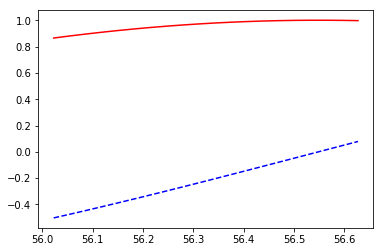

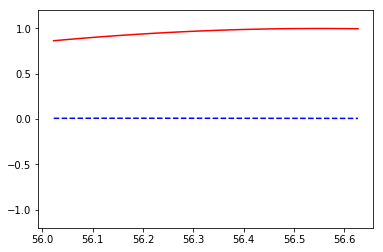

train cost:  0.4793401


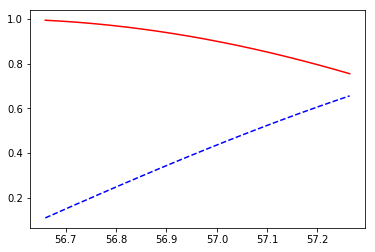

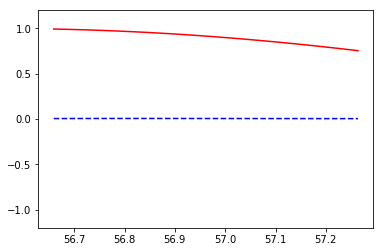

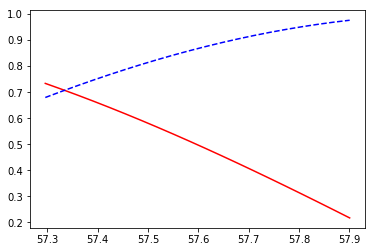

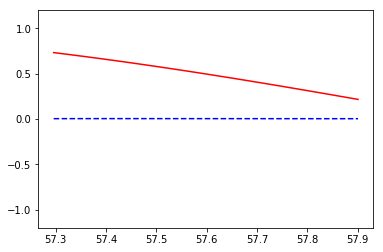

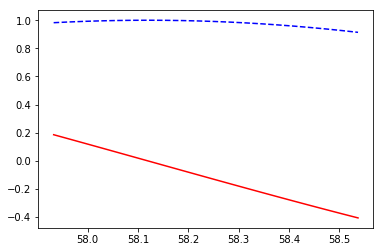

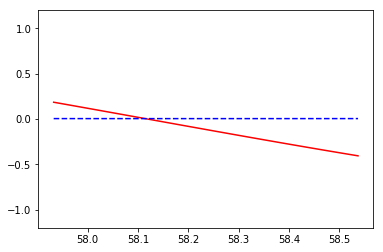

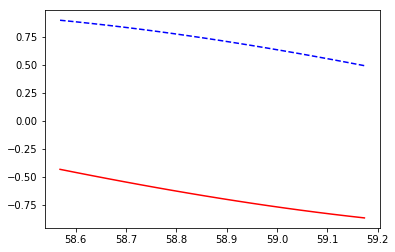

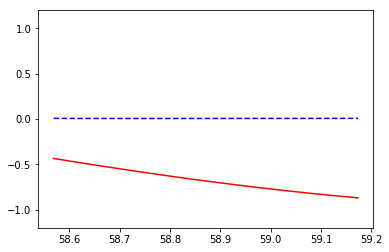

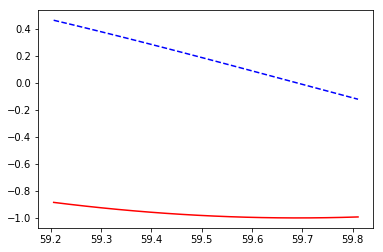

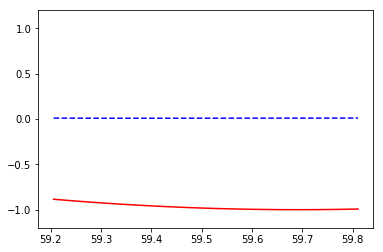

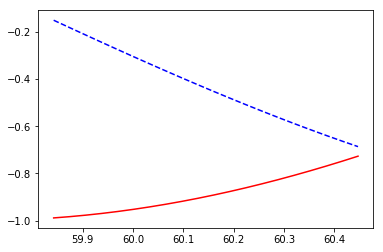

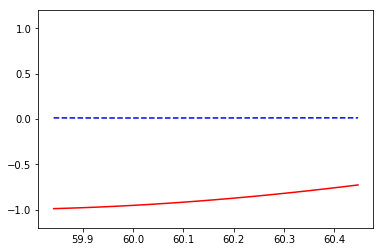

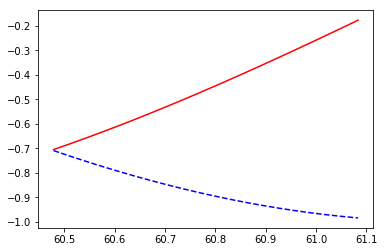

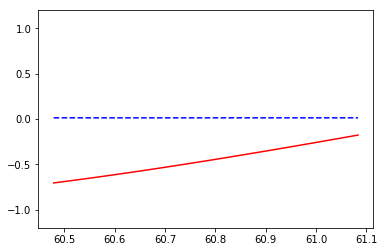

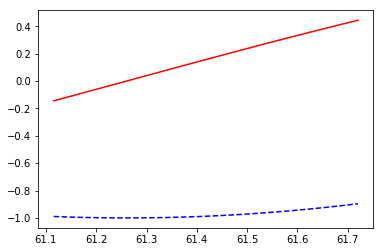

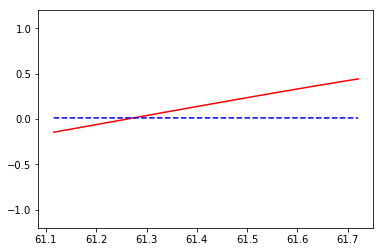

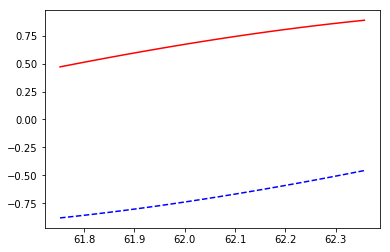

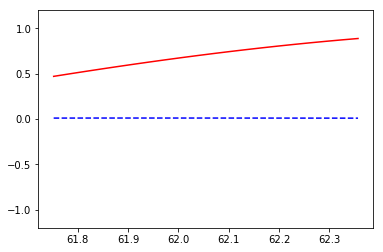

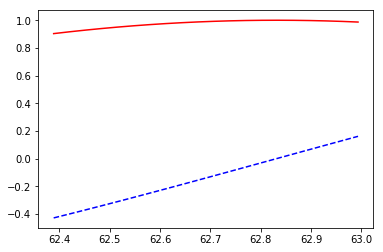

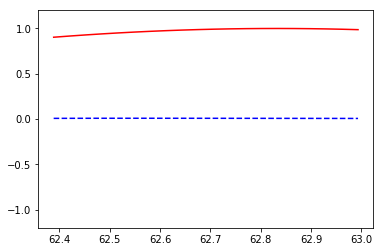

train cost:  0.48222014


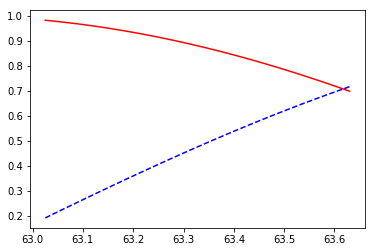

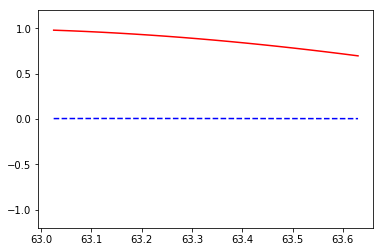

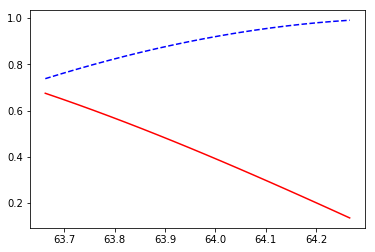

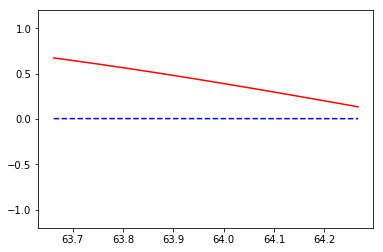

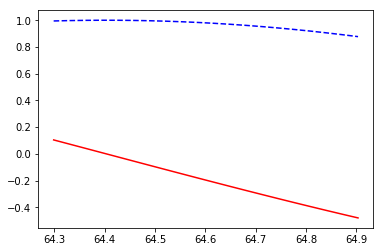

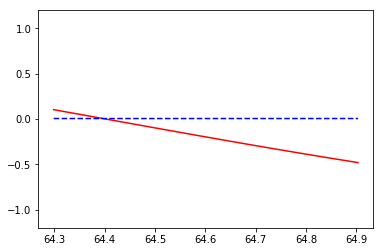

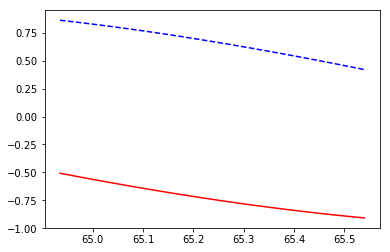

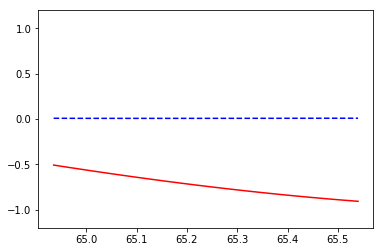

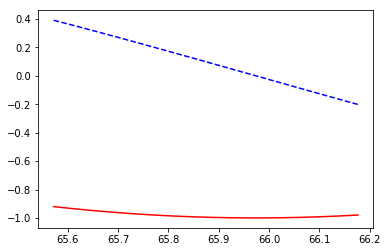

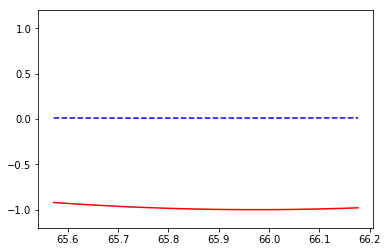

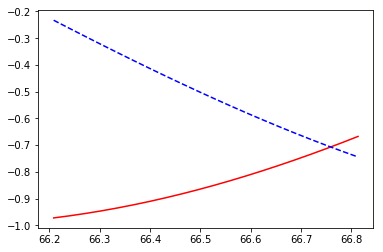

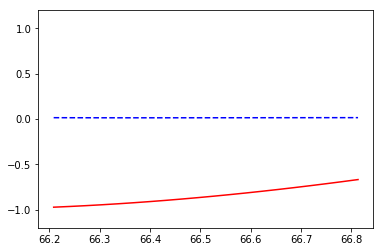

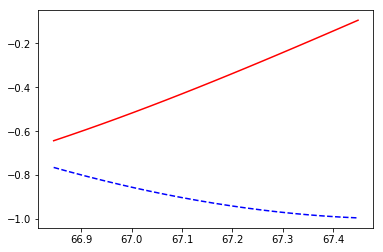

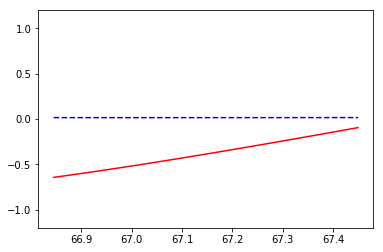

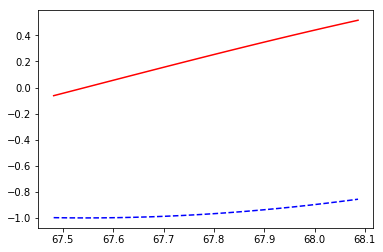

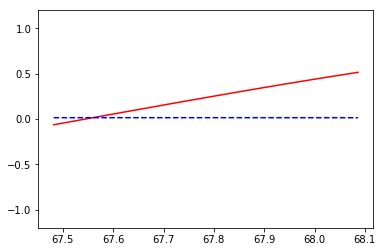

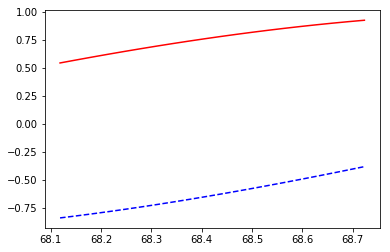

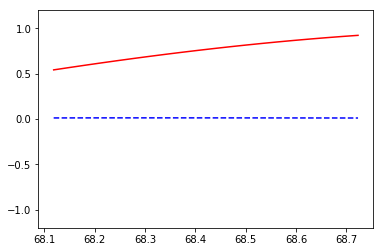

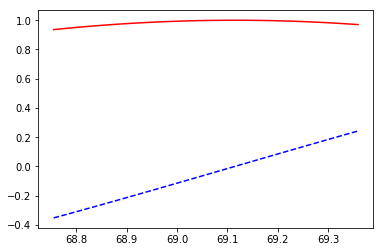

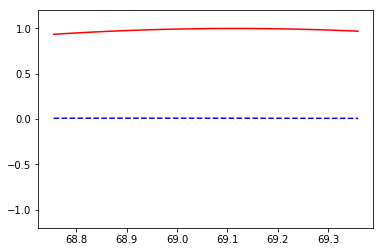

train cost:  0.48442987


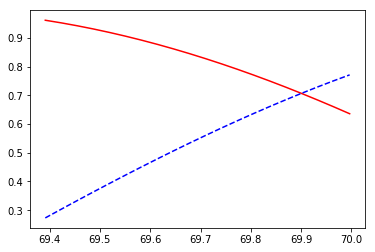

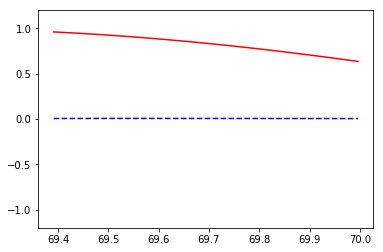

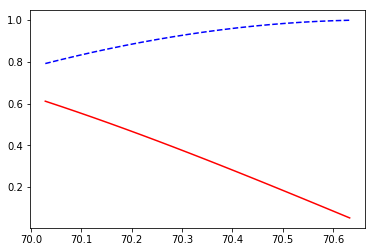

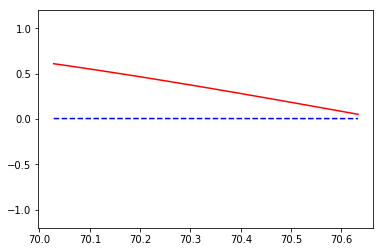

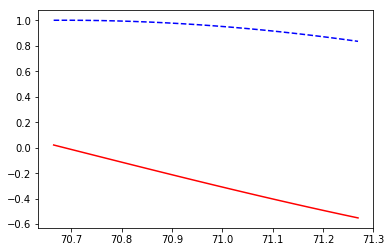

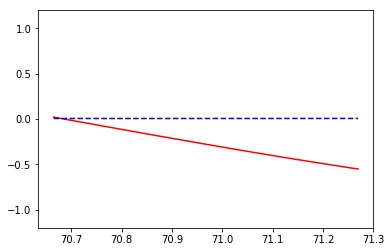

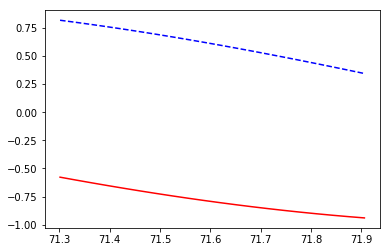

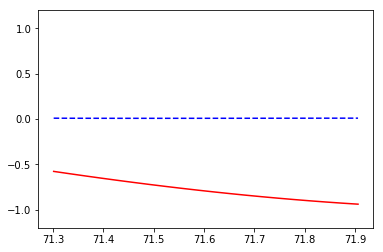

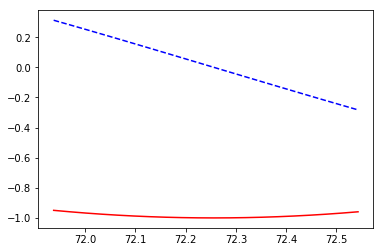

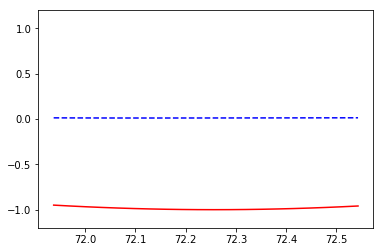

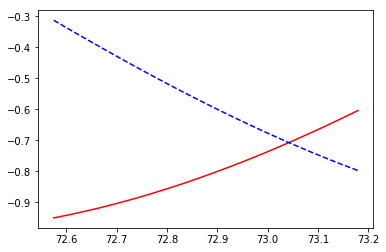

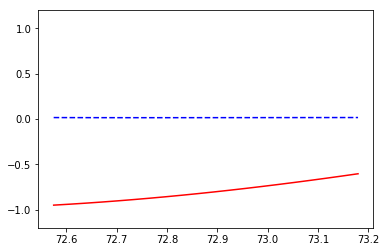

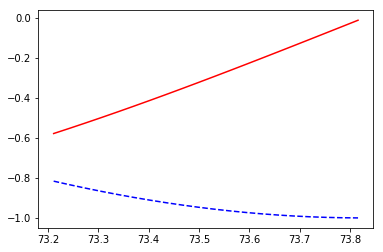

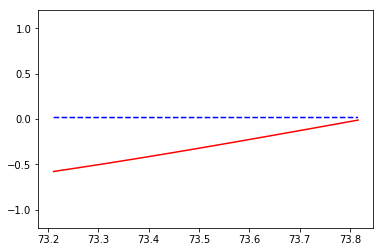

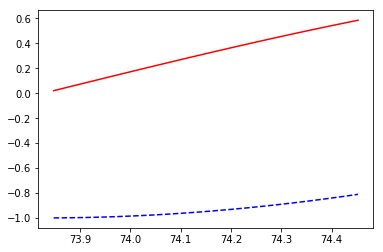

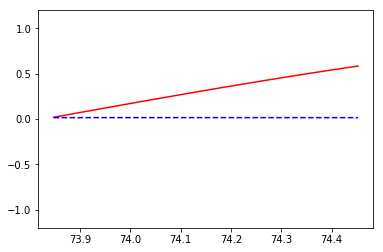

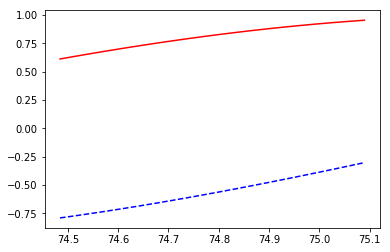

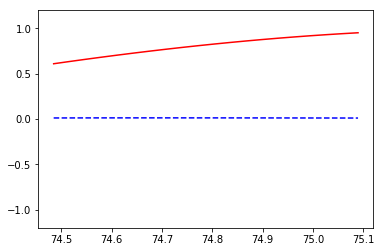

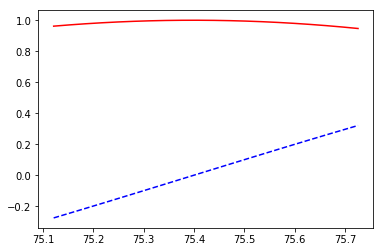

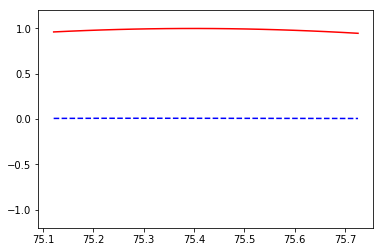

train cost:  0.48635787


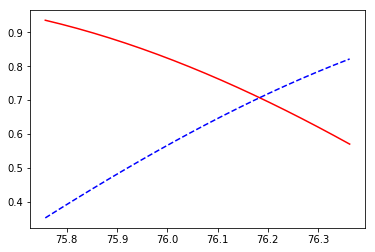

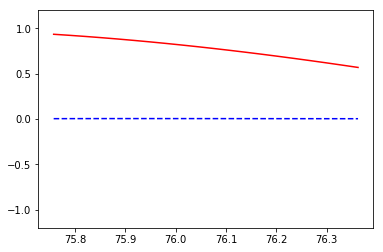

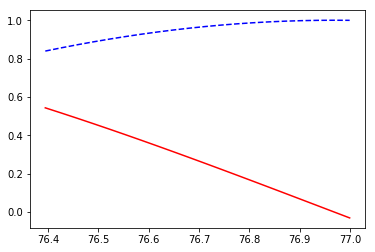

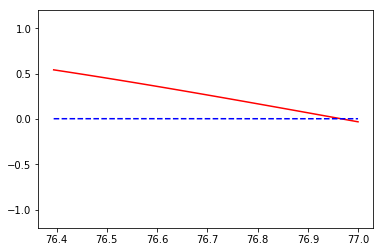

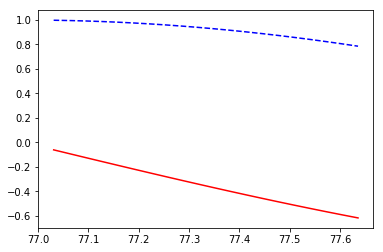

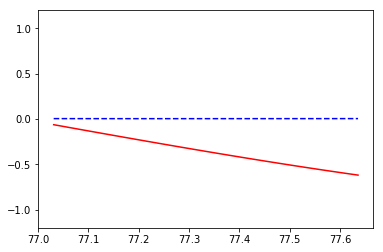

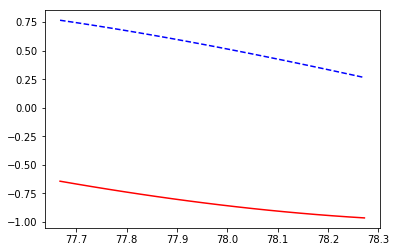

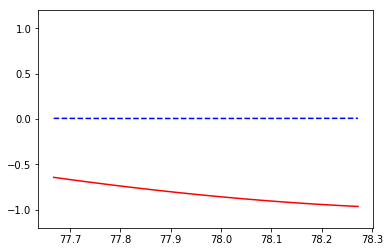

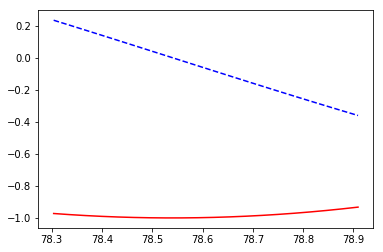

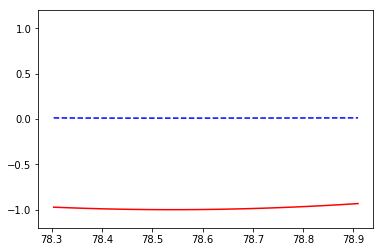

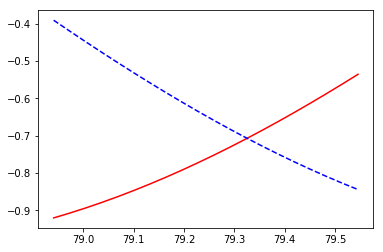

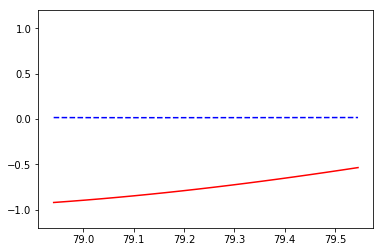

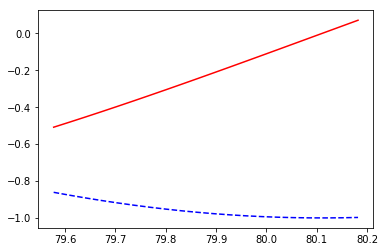

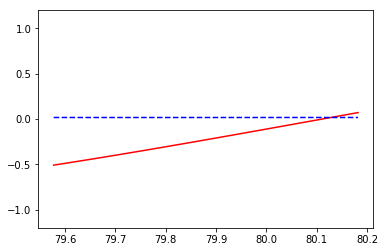

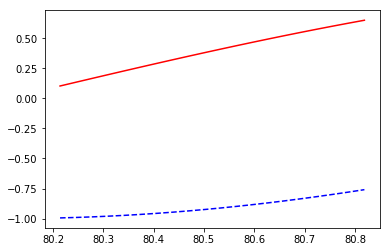

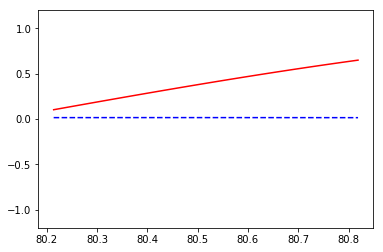

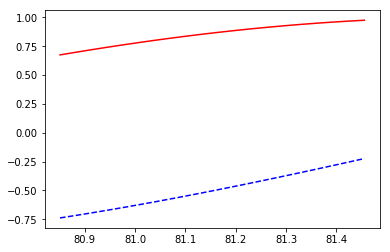

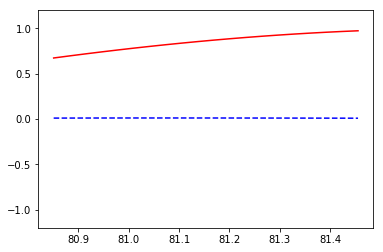

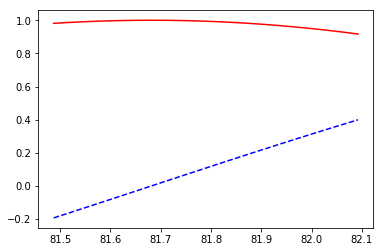

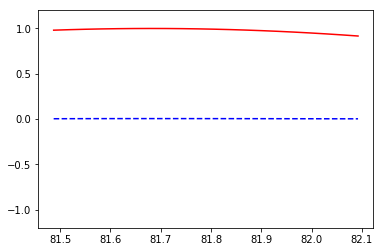

train cost:  0.48790425


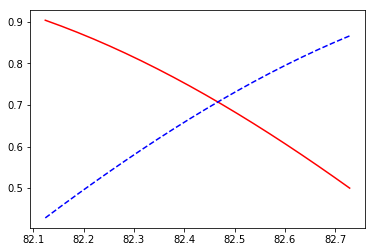

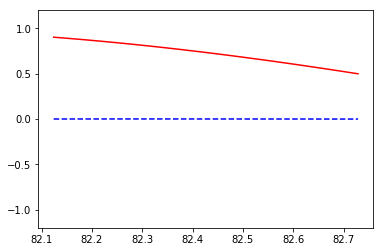

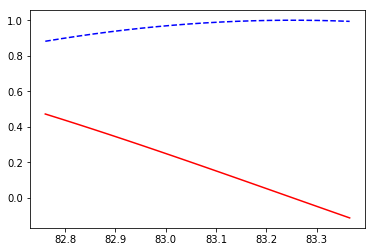

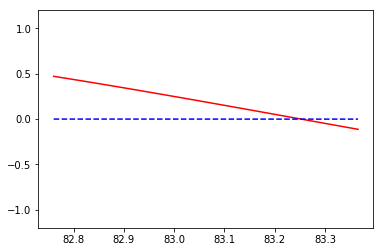

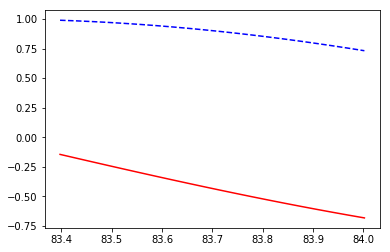

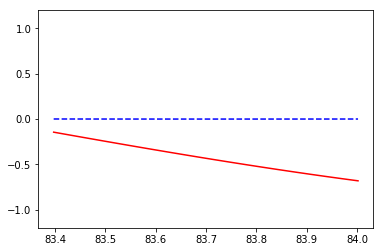

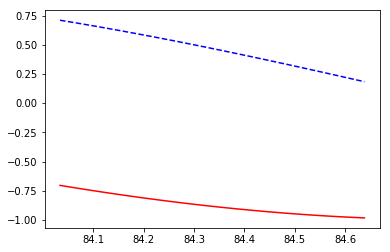

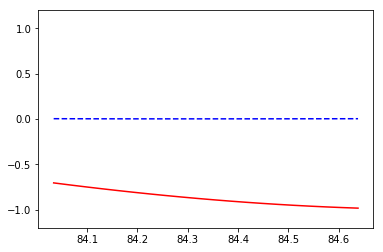

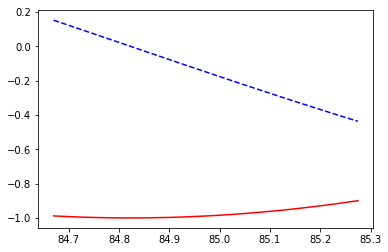

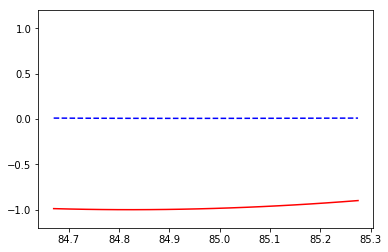

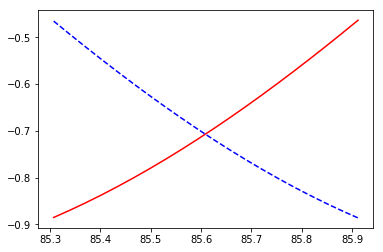

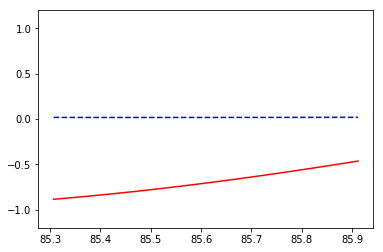

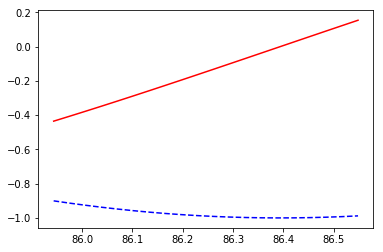

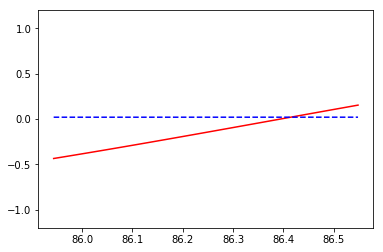

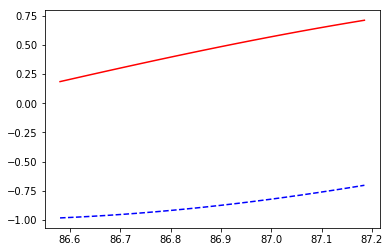

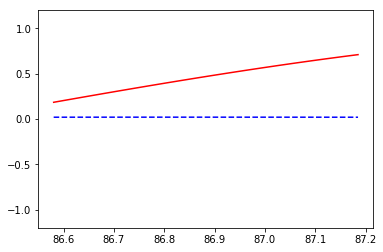

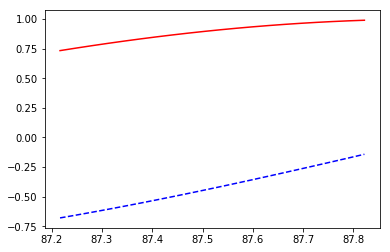

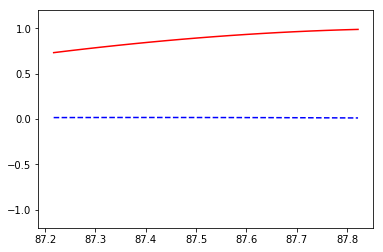

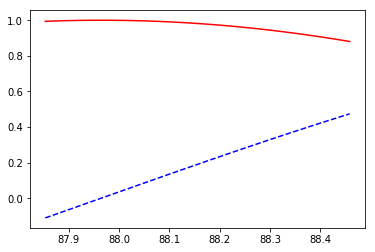

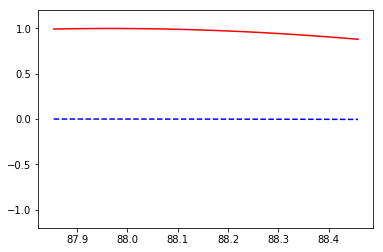

train cost:  0.4783585


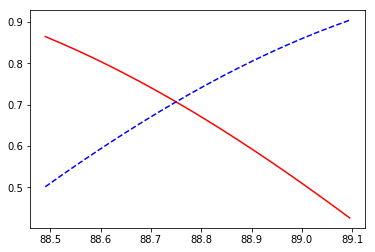

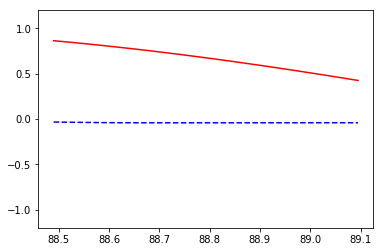

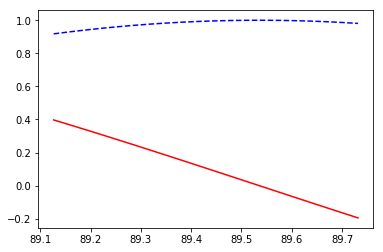

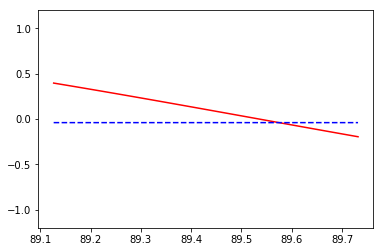

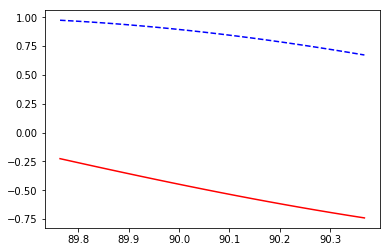

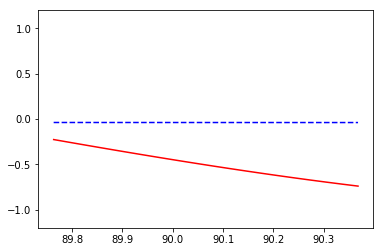

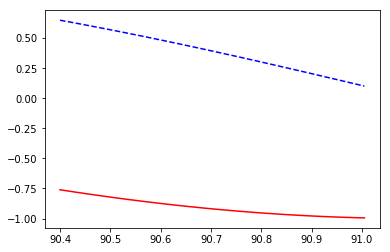

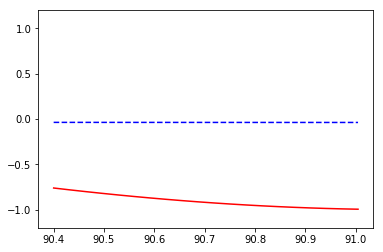

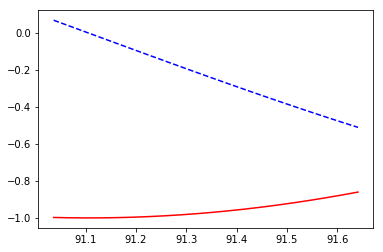

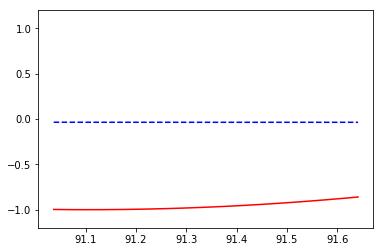

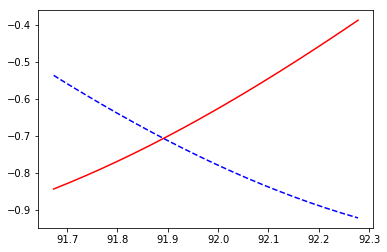

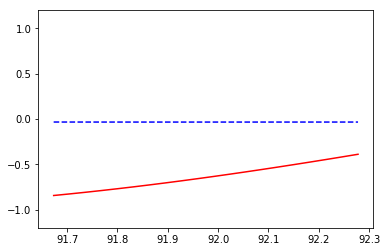

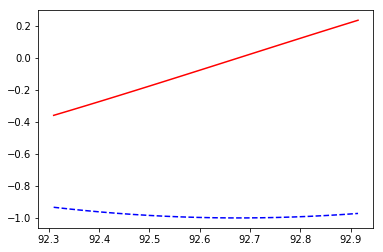

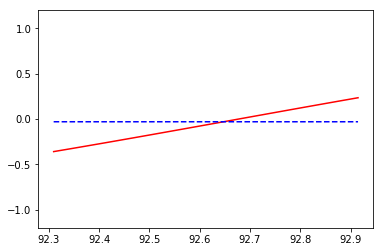

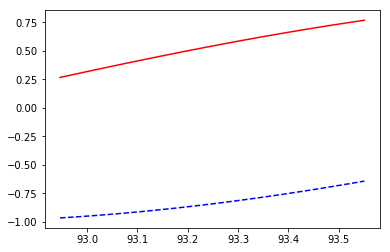

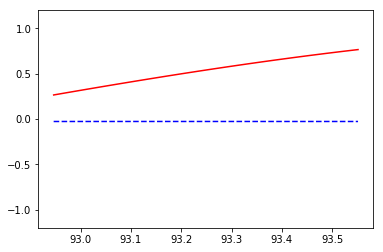

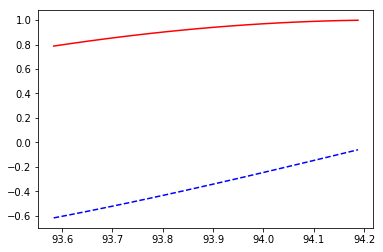

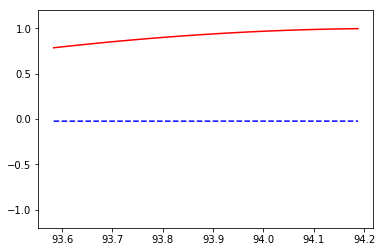

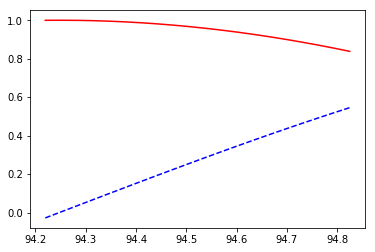

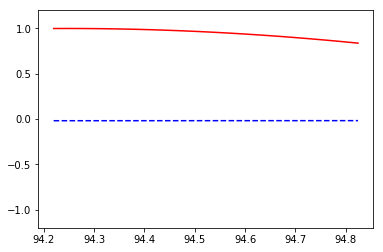

train cost:  0.507003


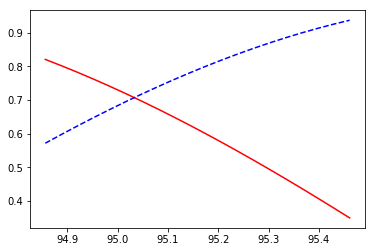

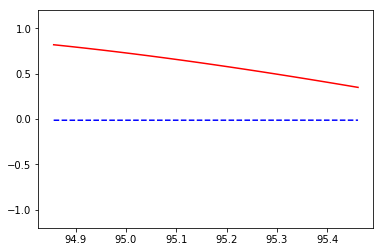

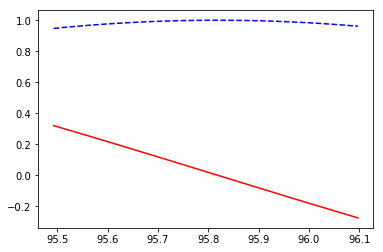

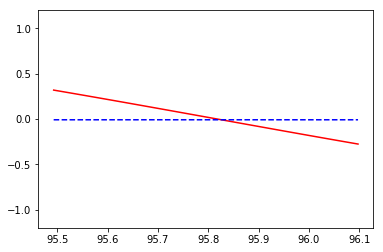

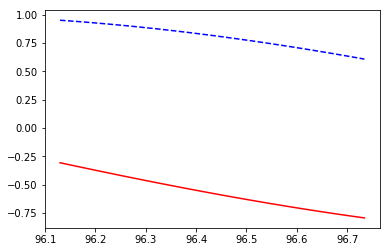

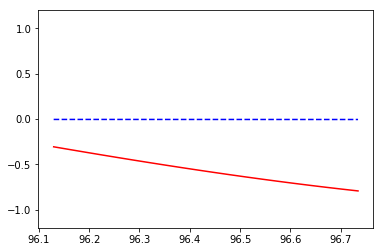

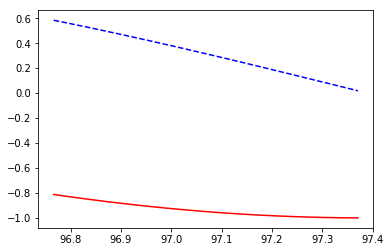

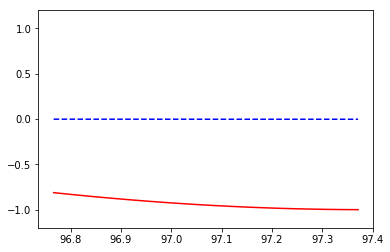

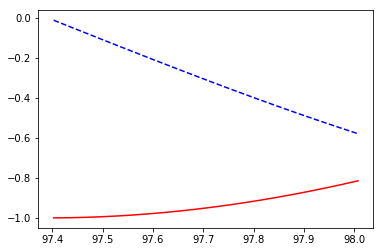

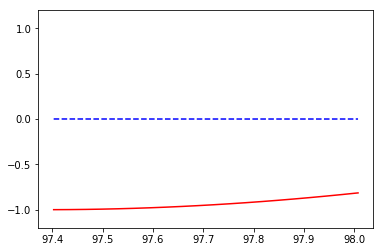

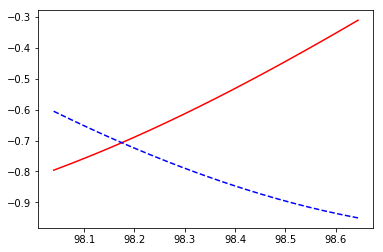

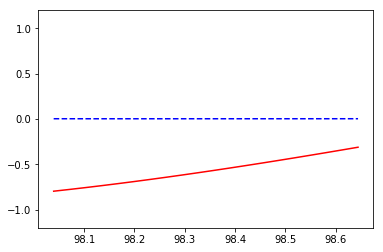

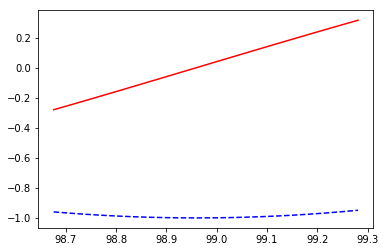

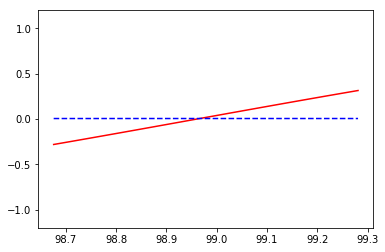

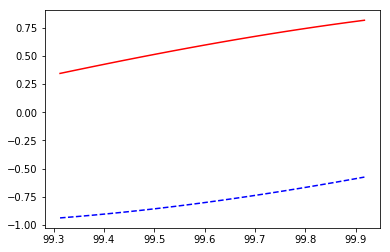

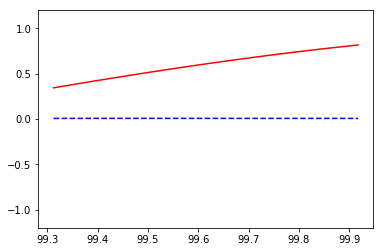

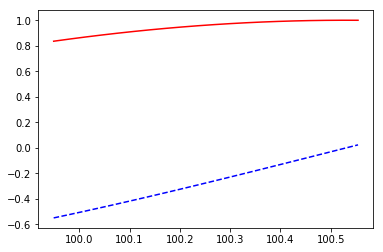

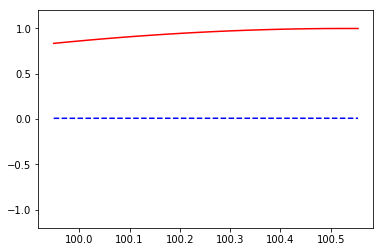

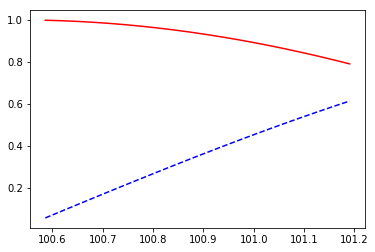

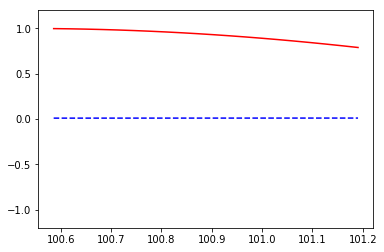

train cost:  0.5053319


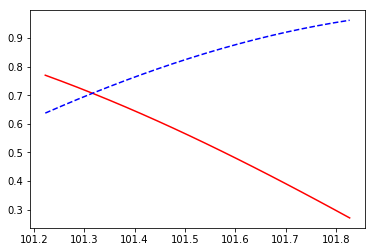

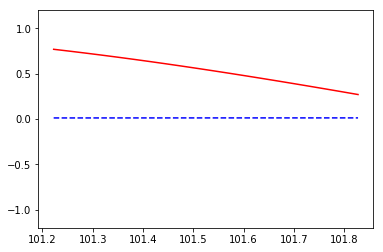

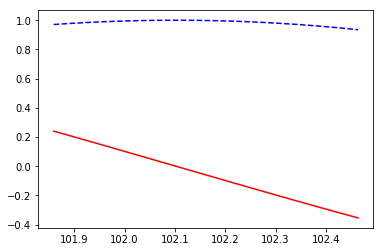

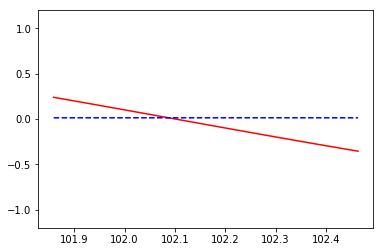

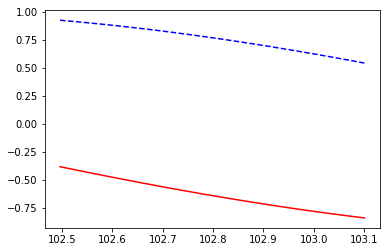

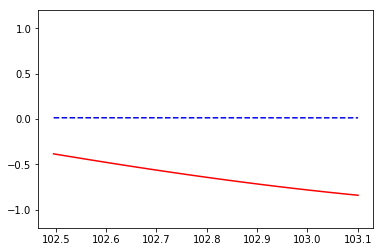

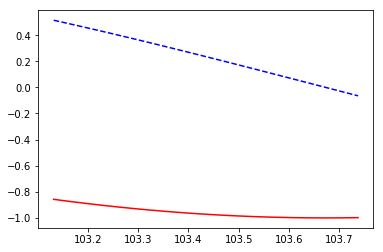

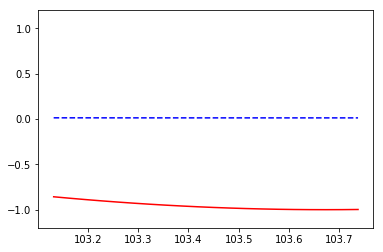

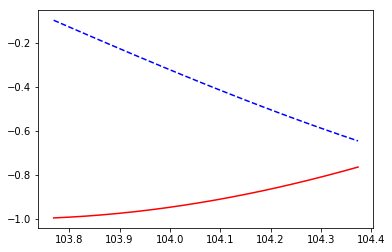

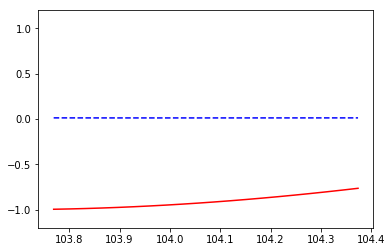

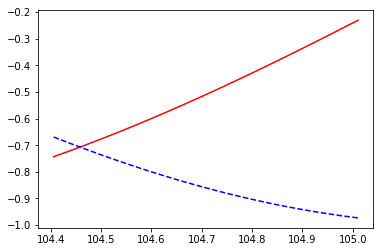

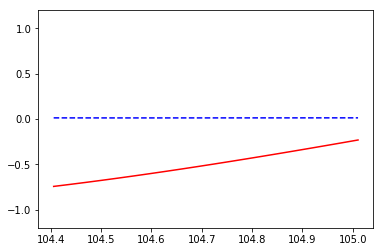

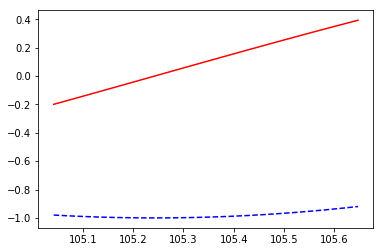

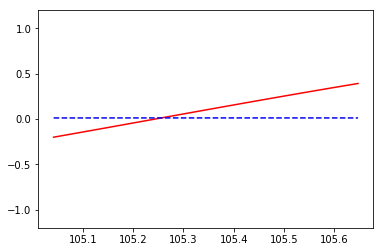

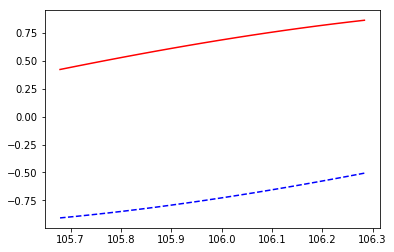

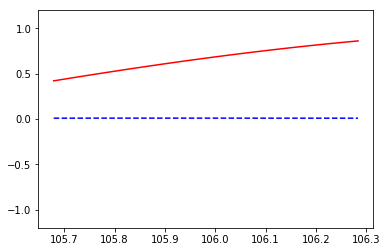

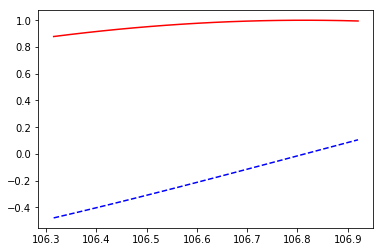

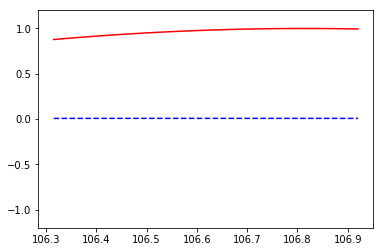

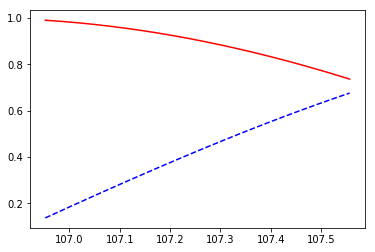

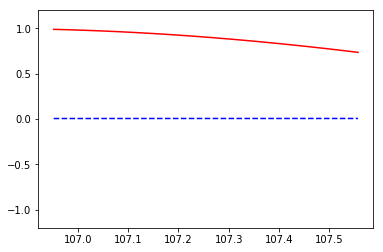

train cost:  0.5046765


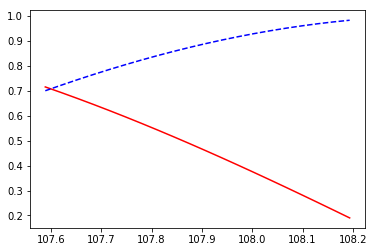

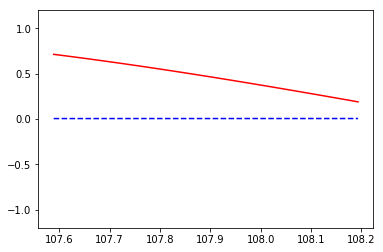

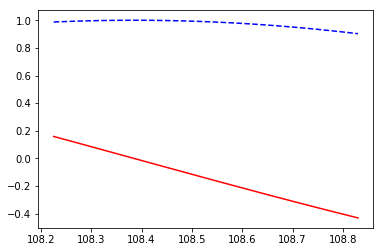

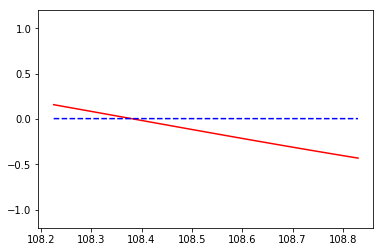

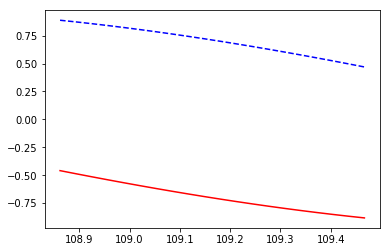

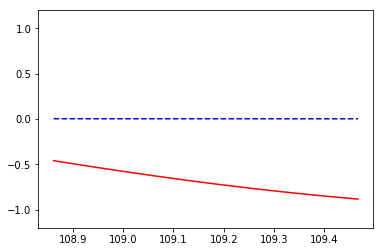

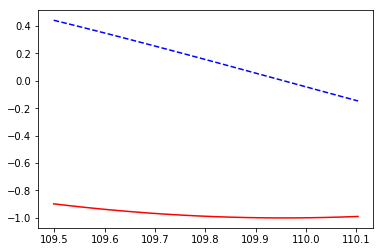

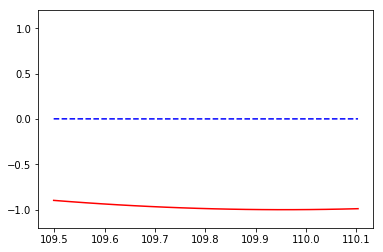

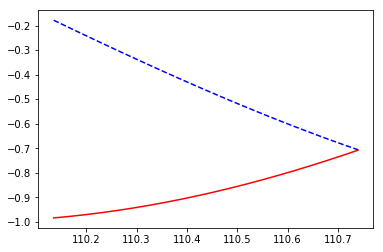

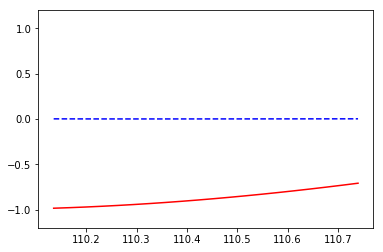

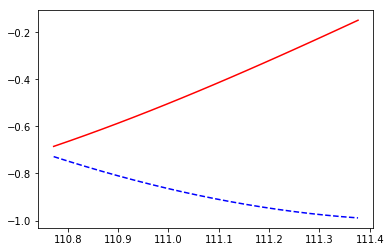

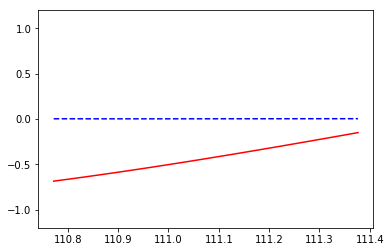

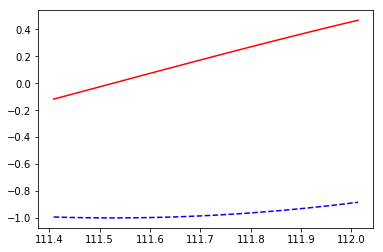

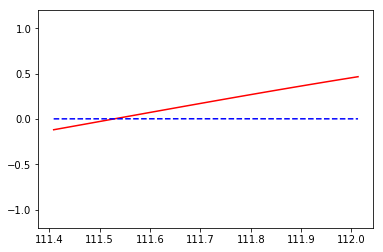

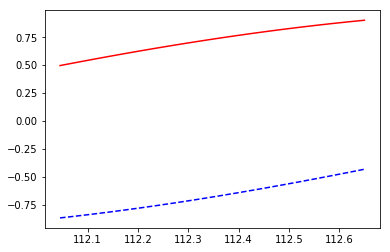

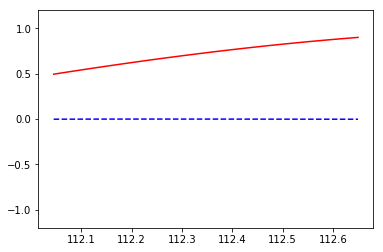

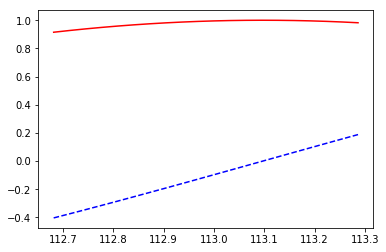

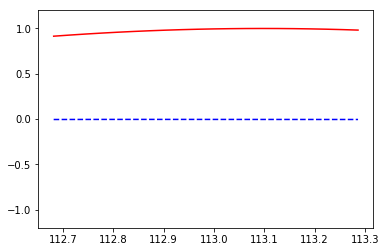

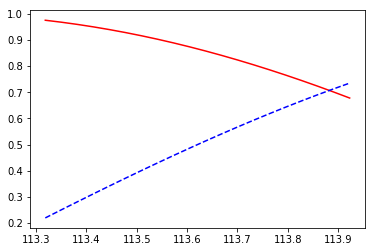

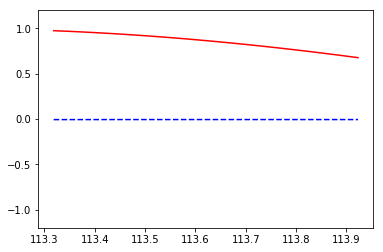

train cost:  0.5039883


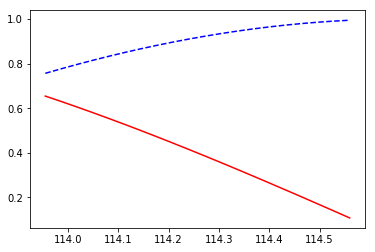

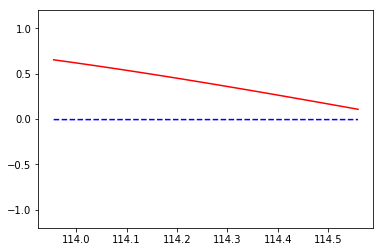

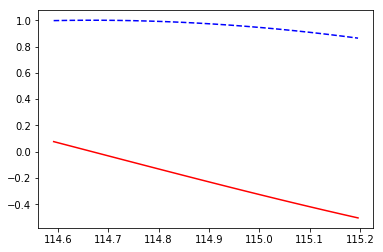

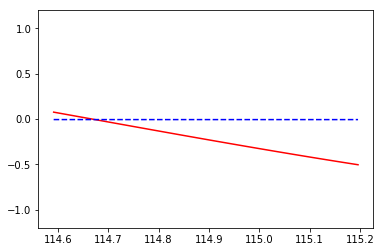

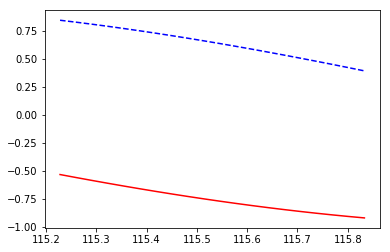

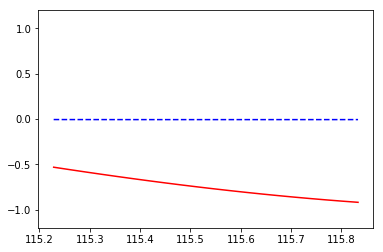

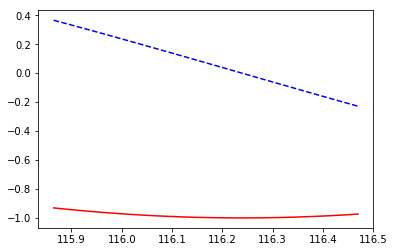

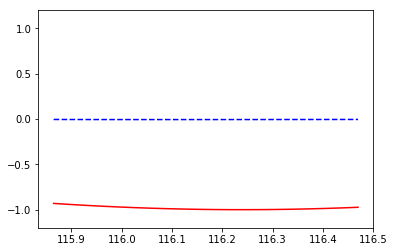

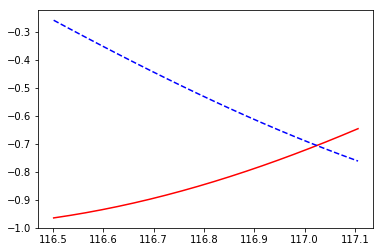

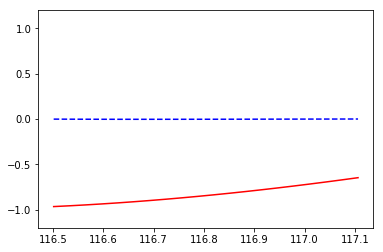

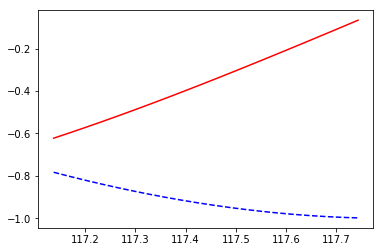

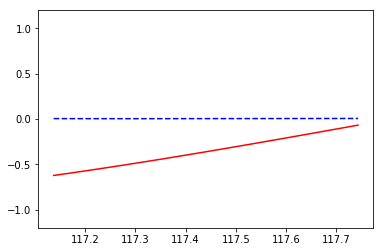

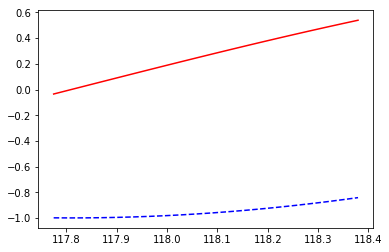

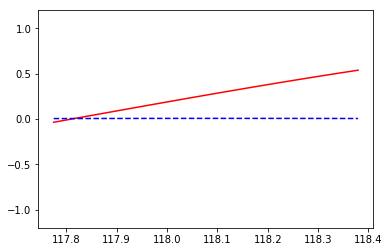

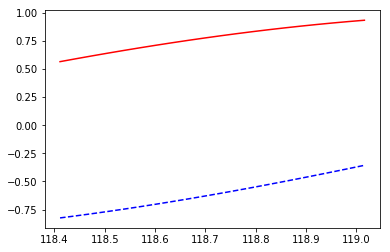

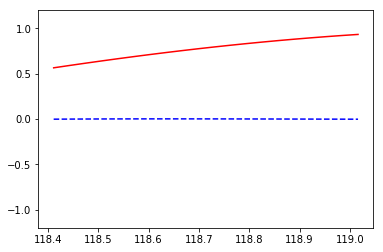

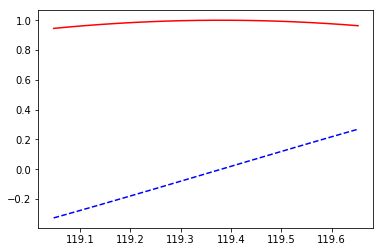

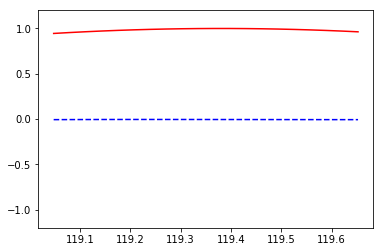

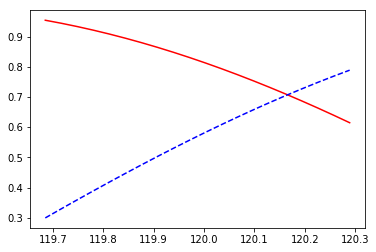

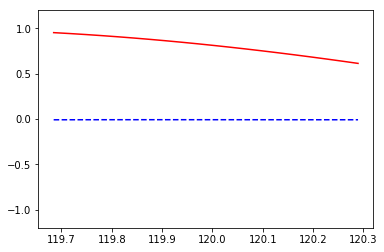

train cost:  0.5020934


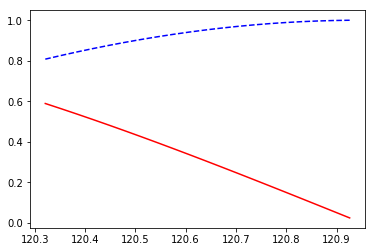

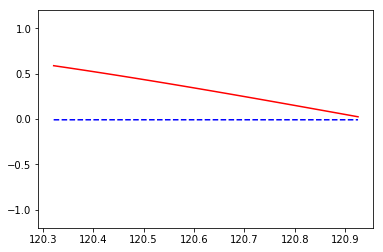

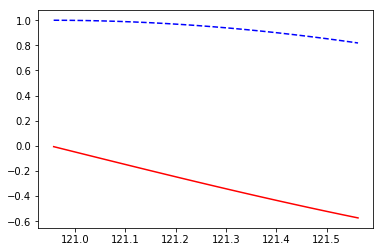

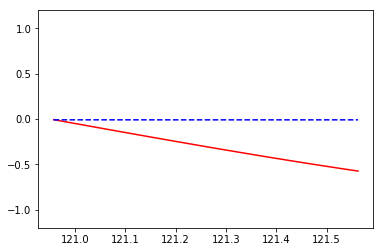

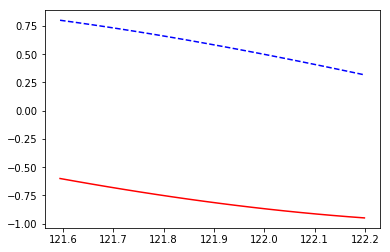

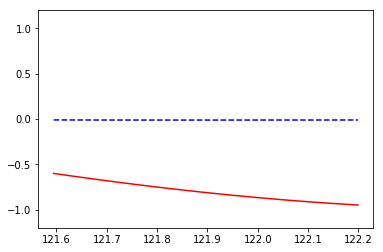

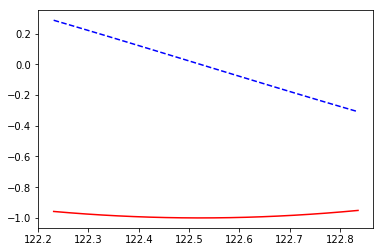

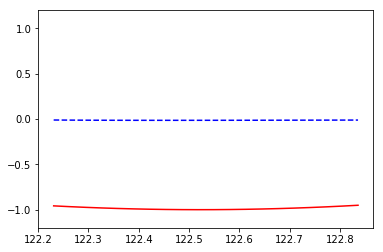

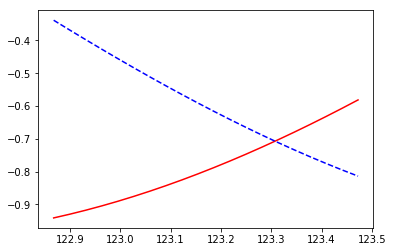

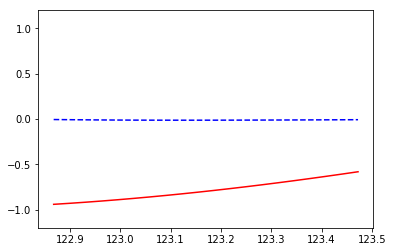

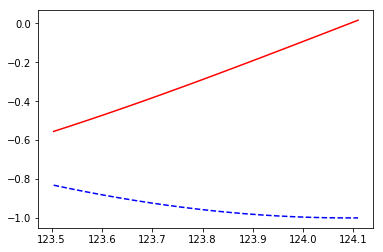

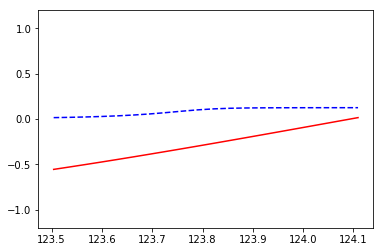

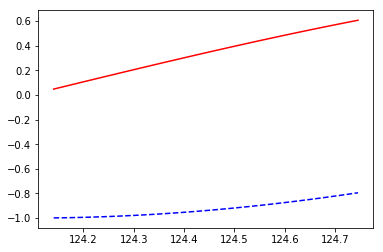

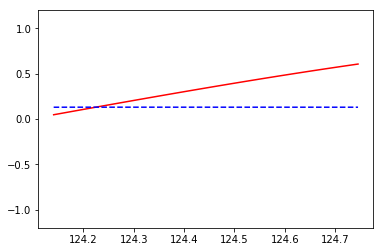

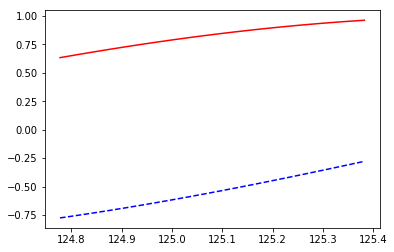

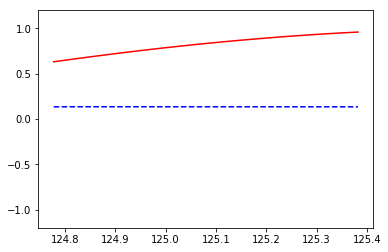

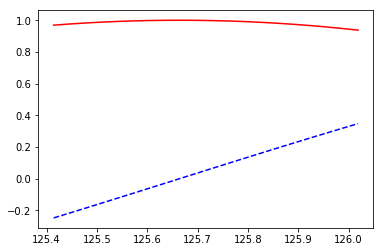

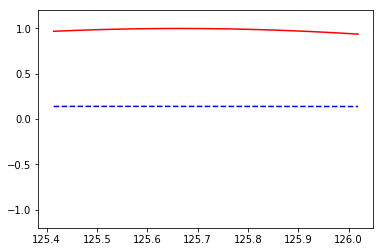

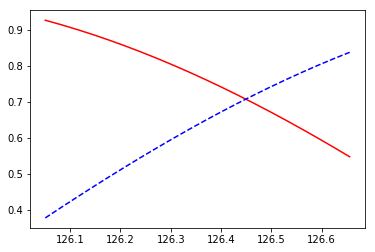

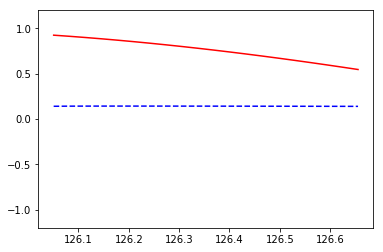

train cost:  0.410523


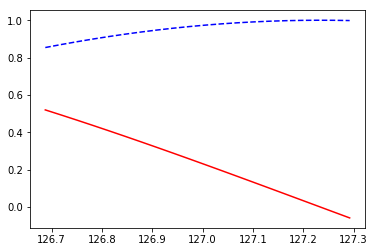

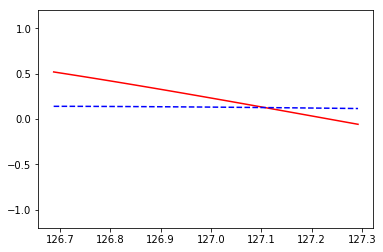

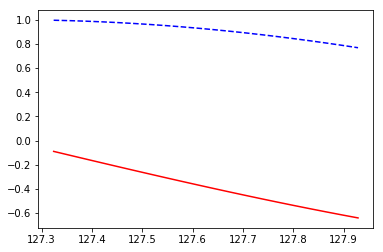

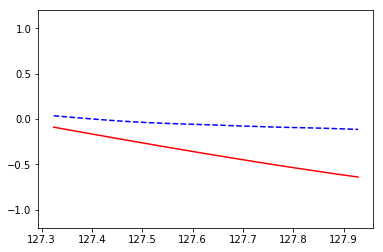

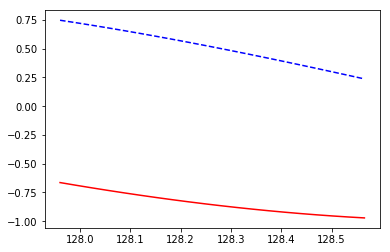

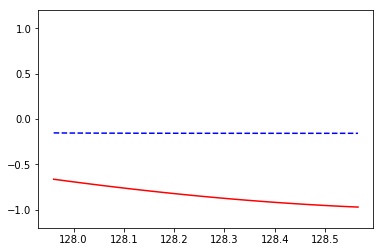

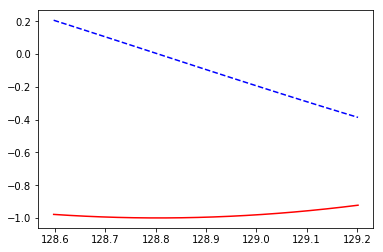

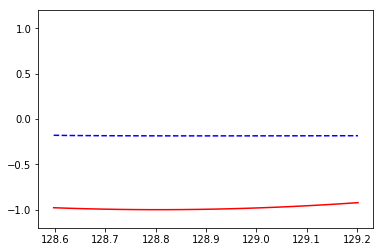

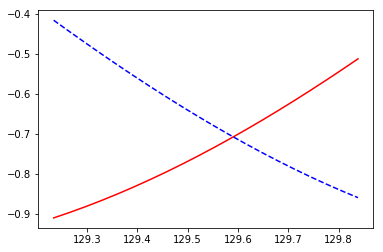

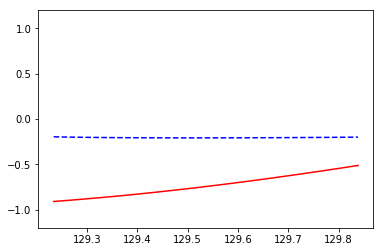

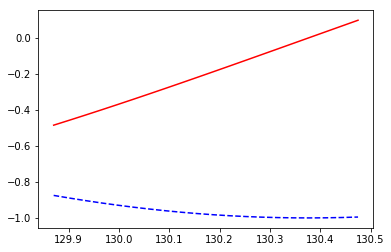

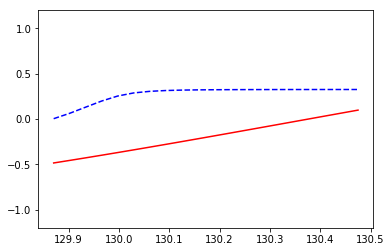

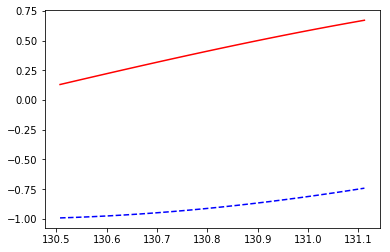

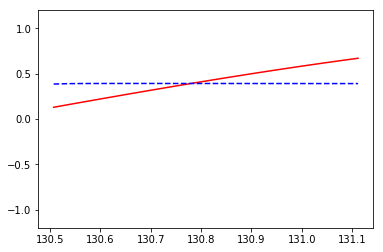

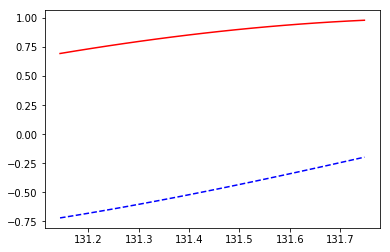

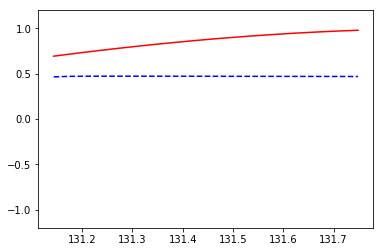

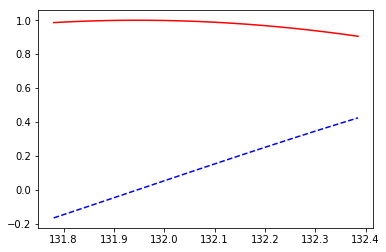

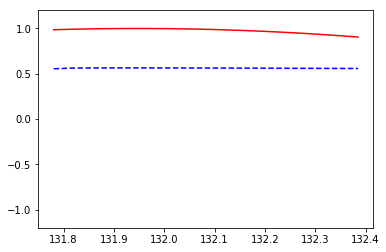

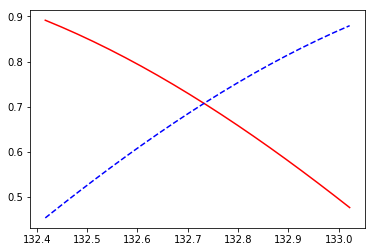

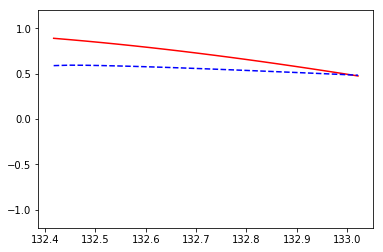

train cost:  0.12161644


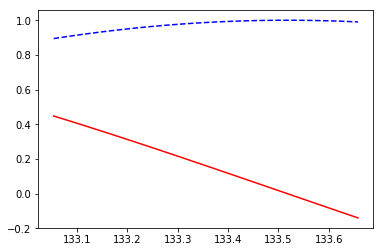

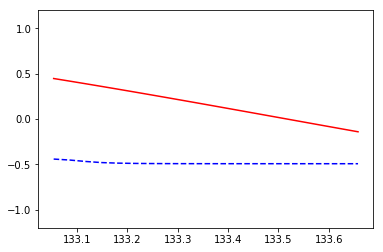

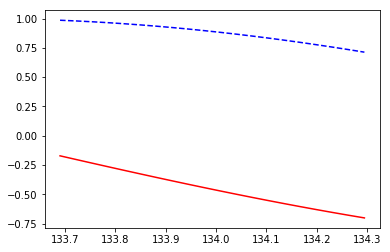

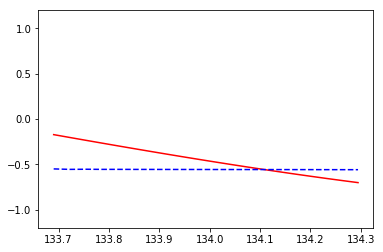

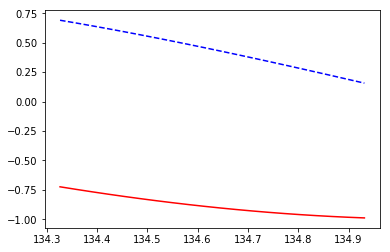

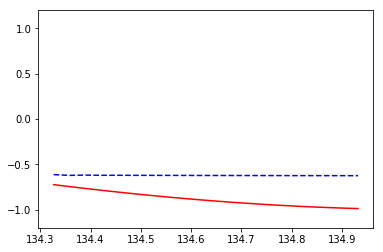

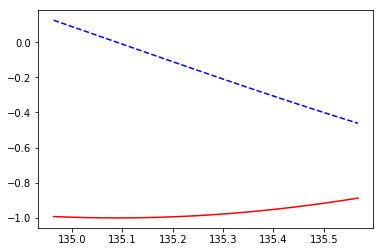

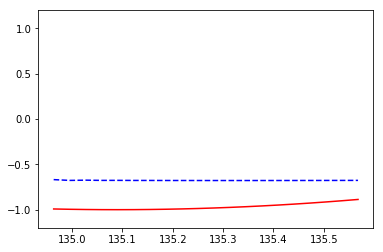

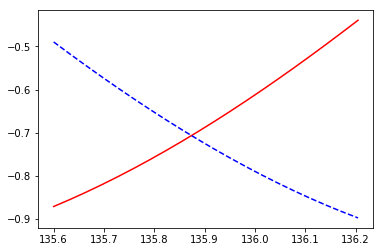

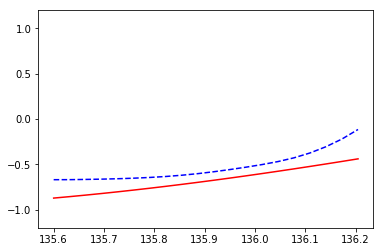

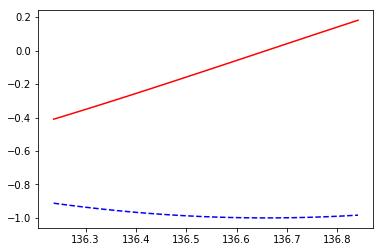

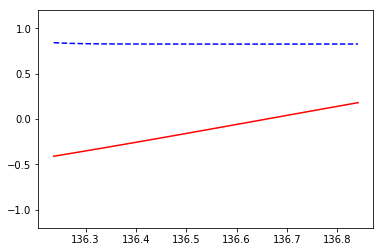

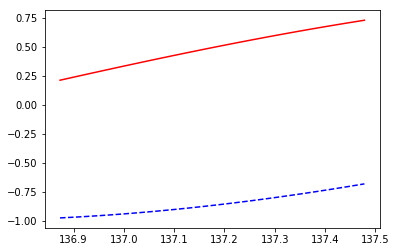

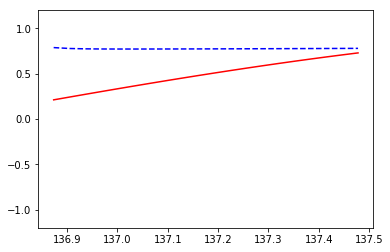

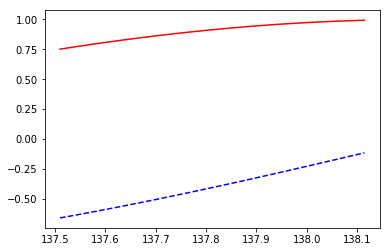

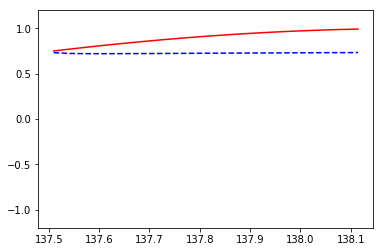

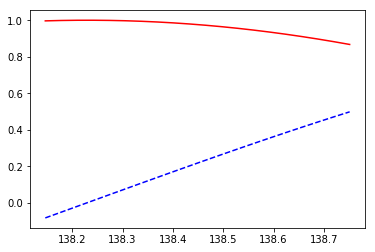

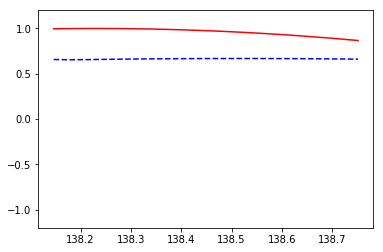

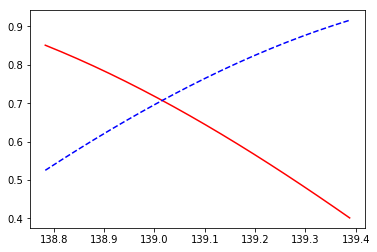

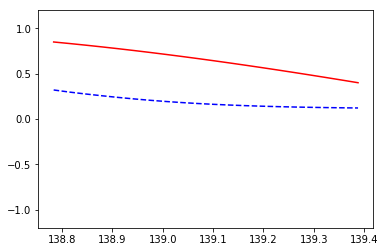

train cost:  0.07511913


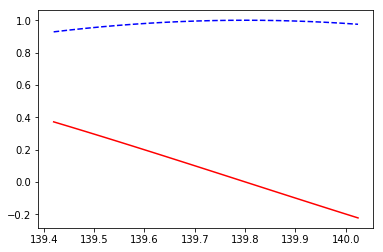

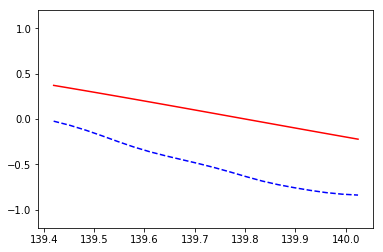

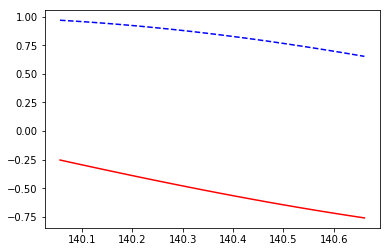

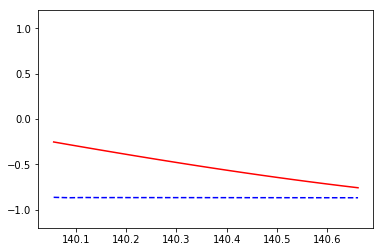

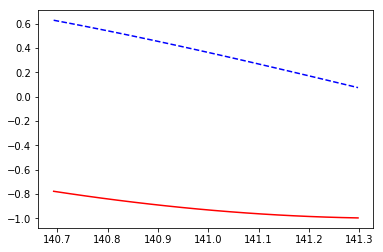

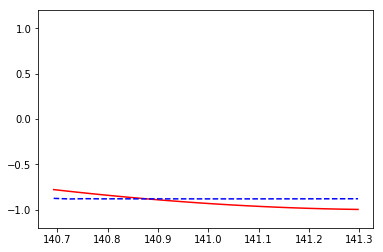

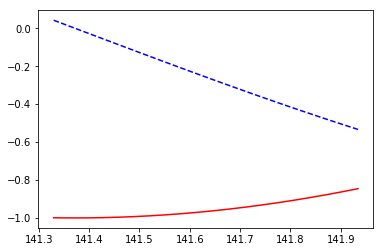

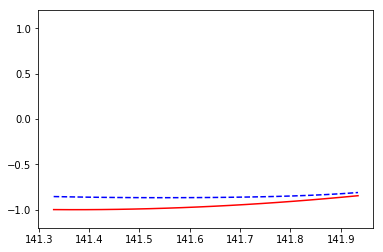

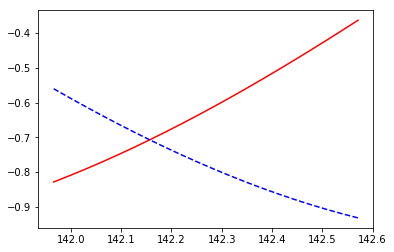

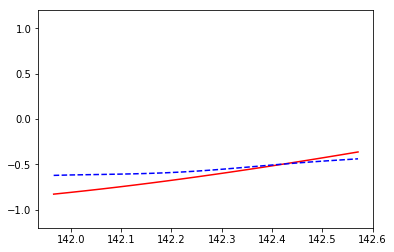

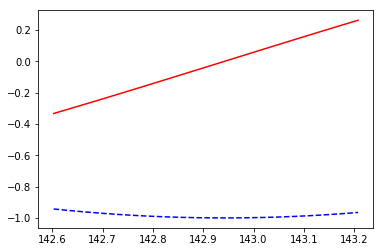

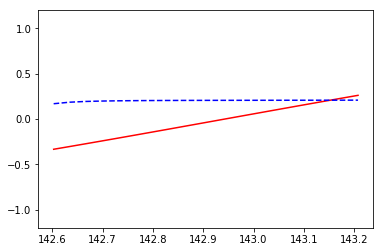

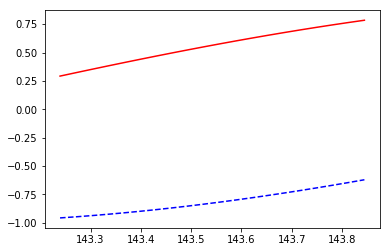

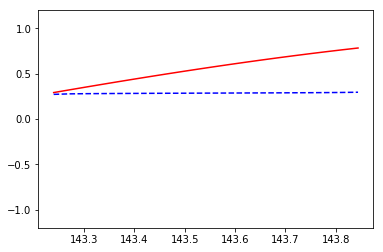

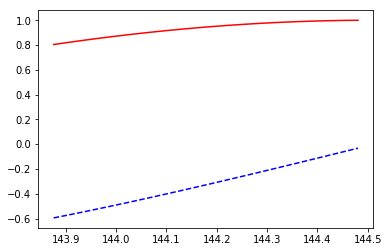

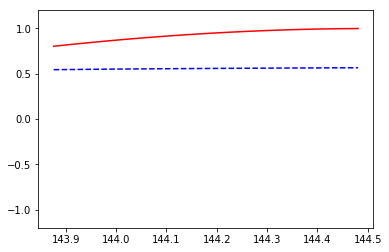

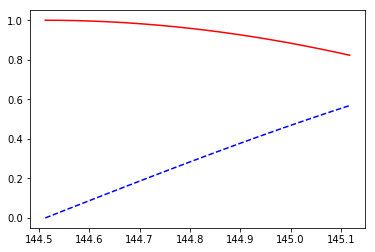

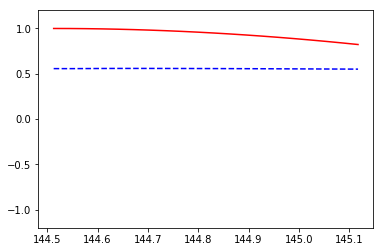

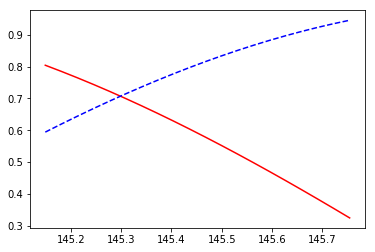

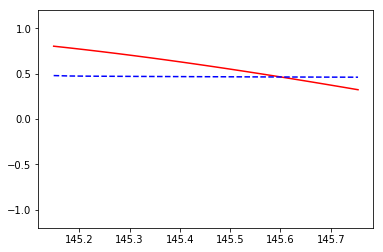

train cost:  0.5614682


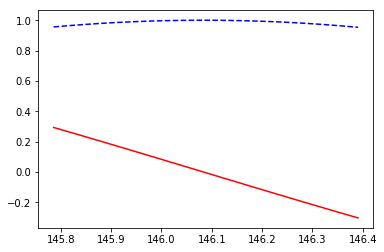

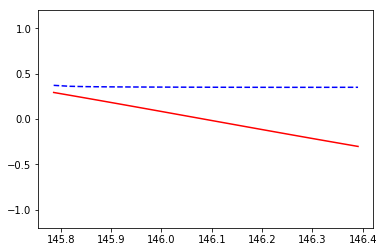

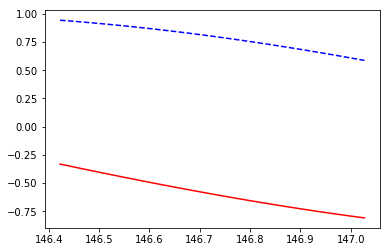

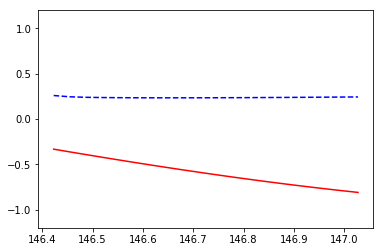

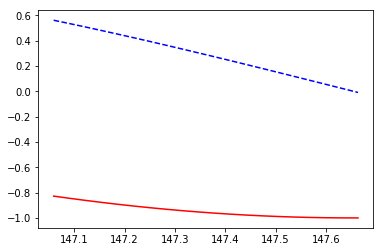

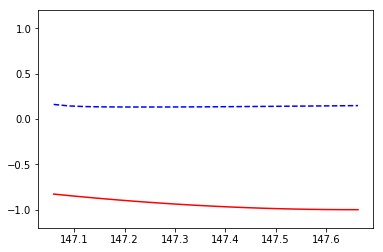

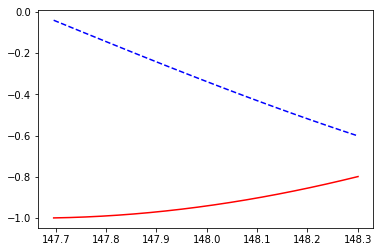

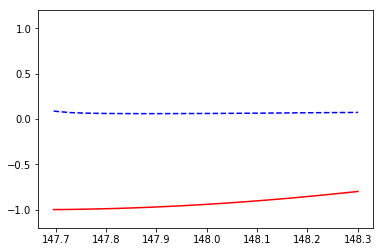

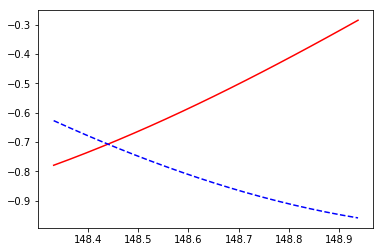

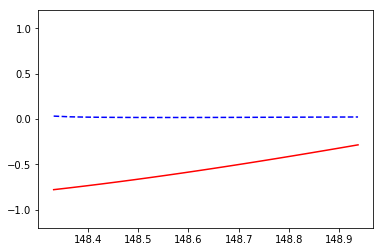

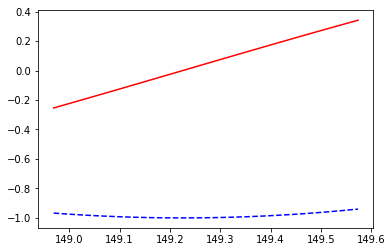

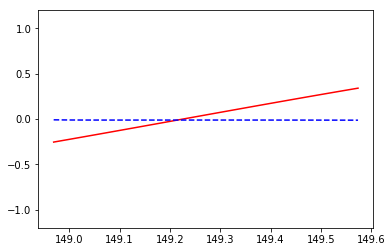

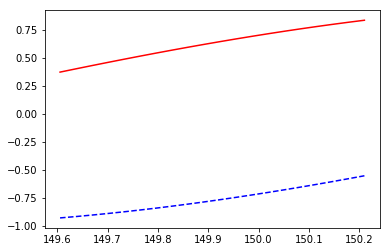

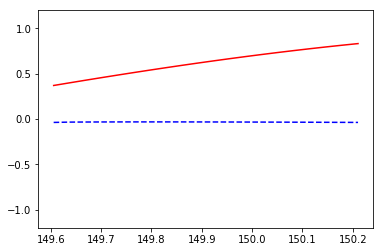

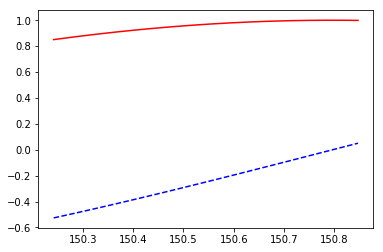

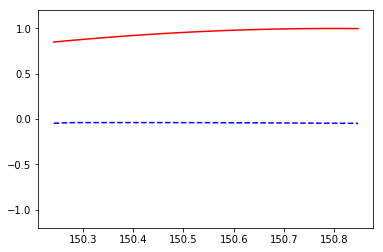

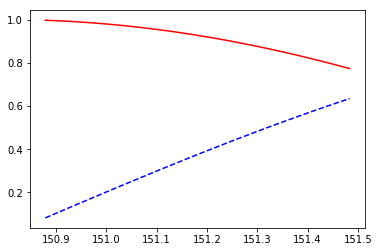

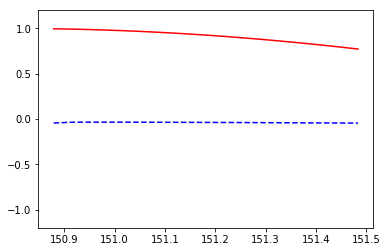

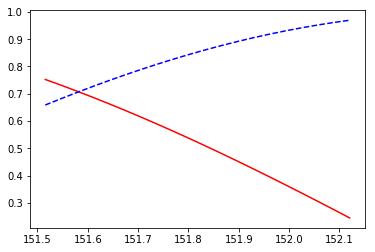

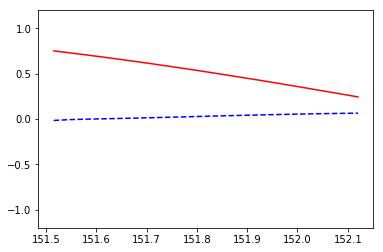

train cost:  0.3121626


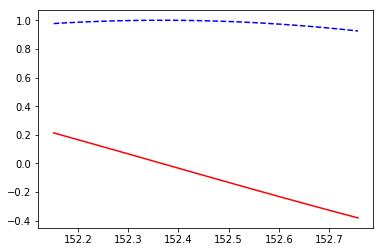

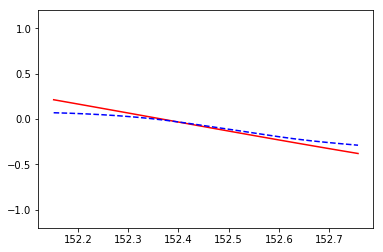

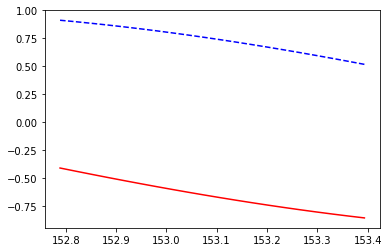

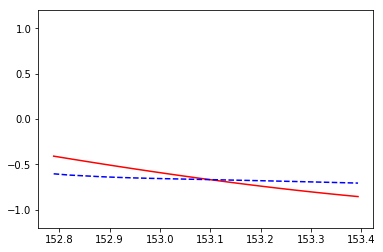

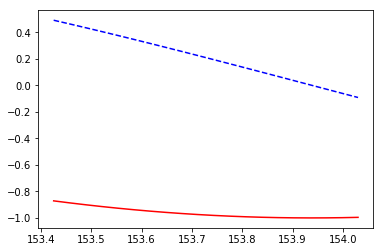

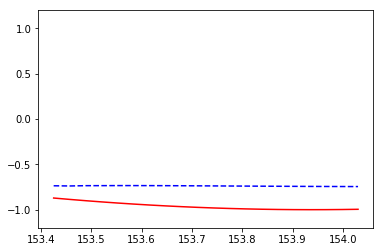

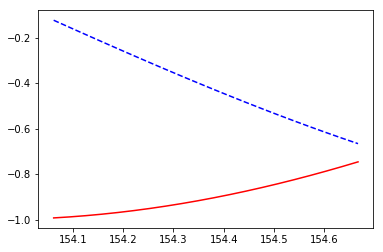

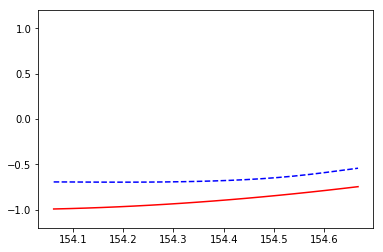

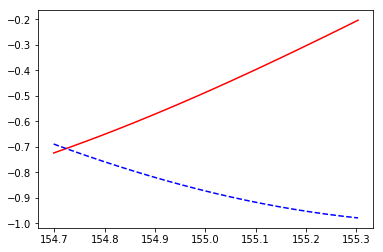

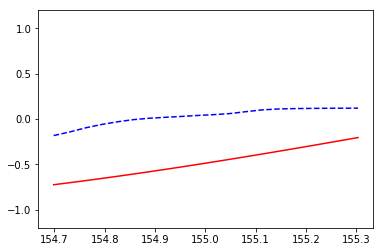

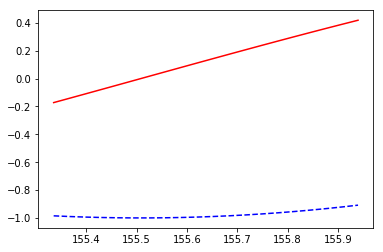

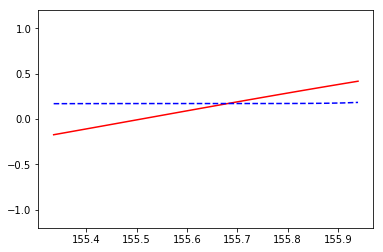

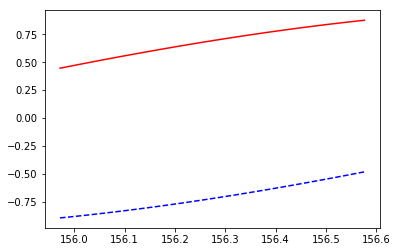

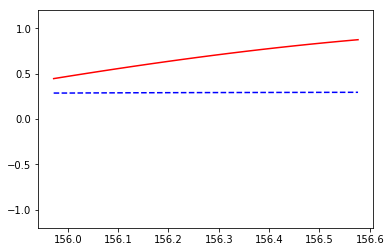

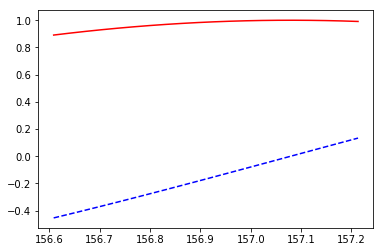

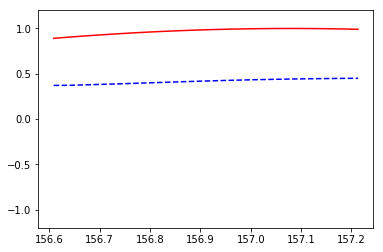

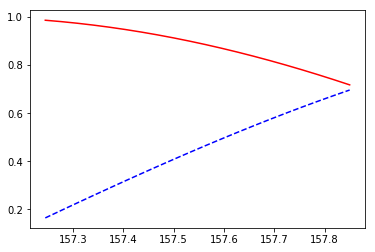

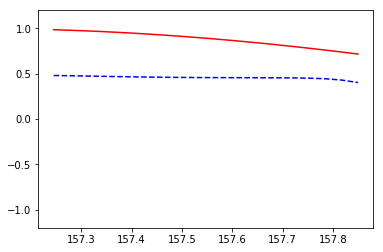

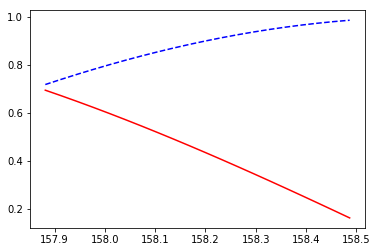

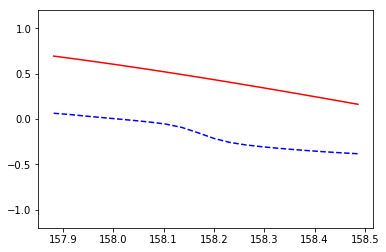

train cost:  0.09444911


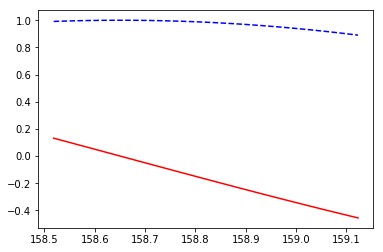

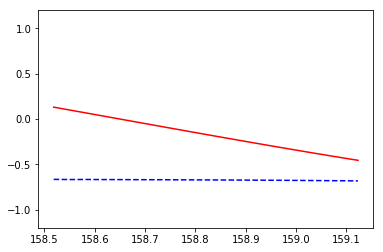

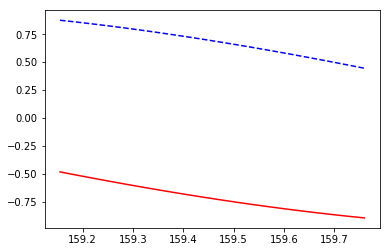

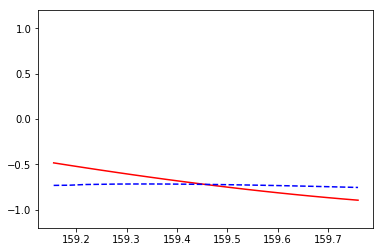

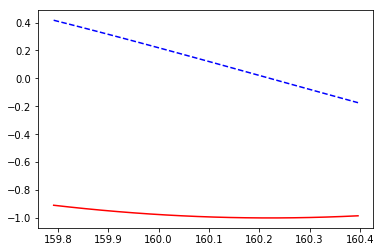

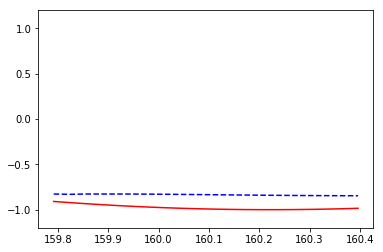

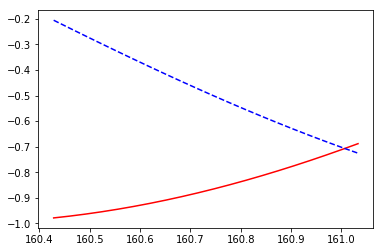

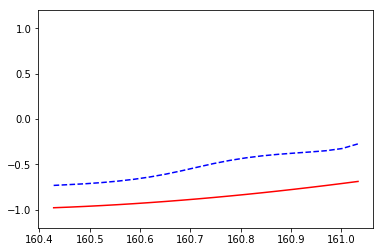

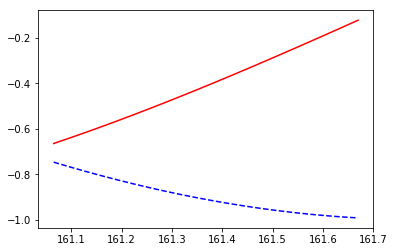

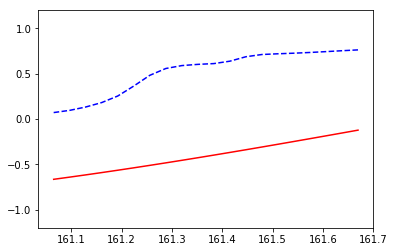

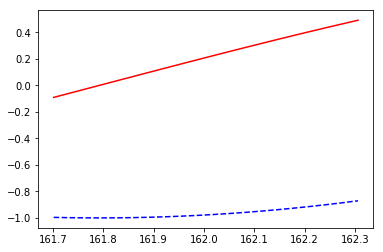

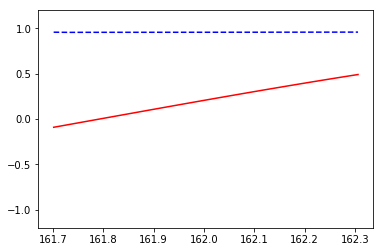

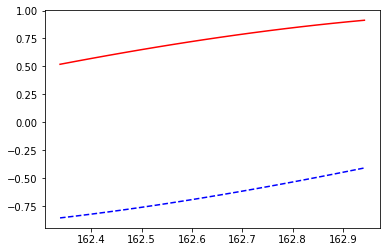

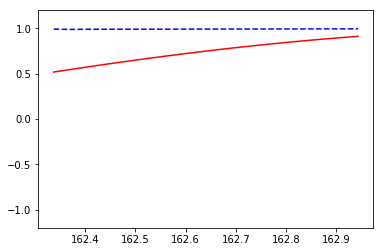

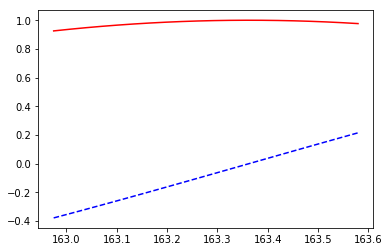

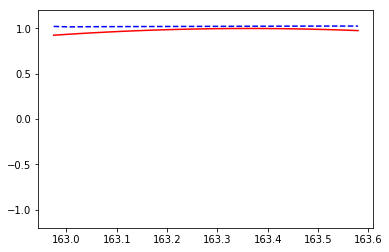

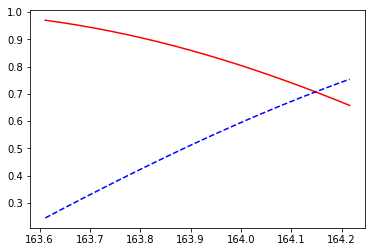

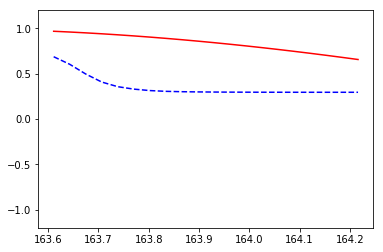

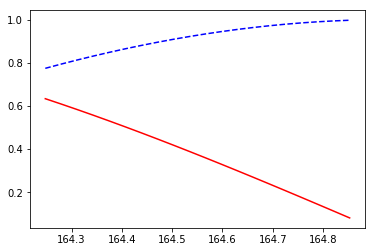

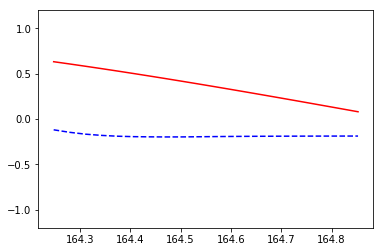

train cost:  0.100093514


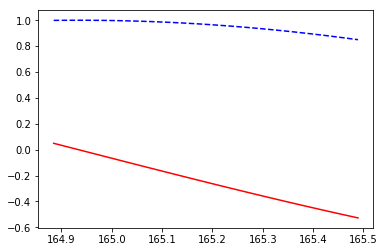

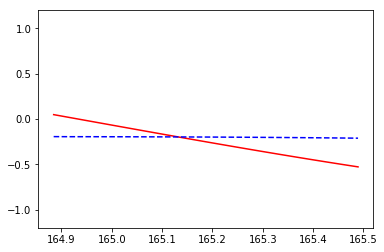

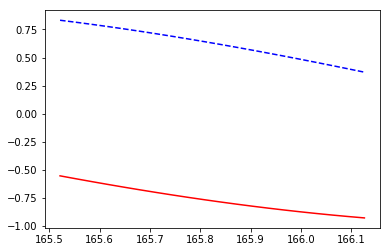

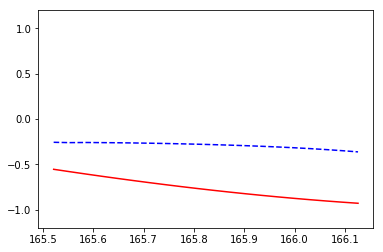

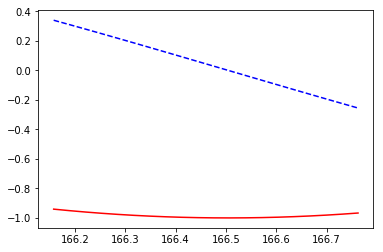

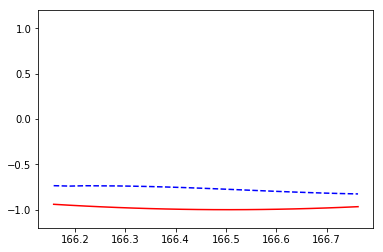

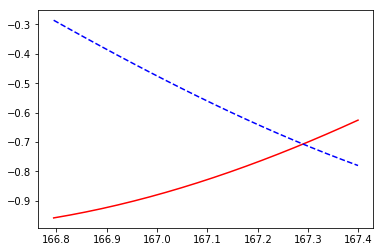

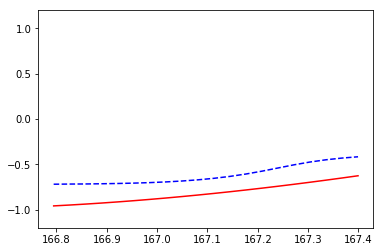

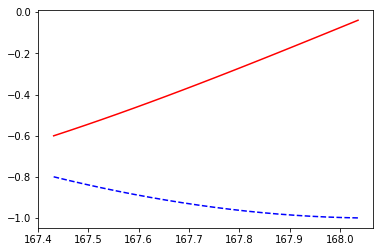

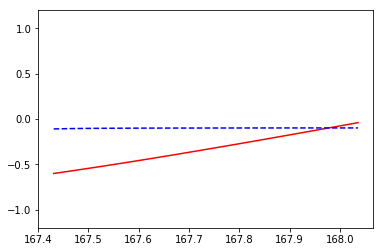

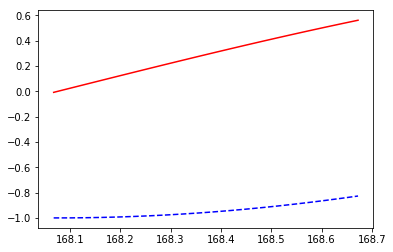

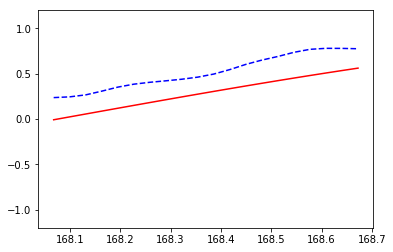

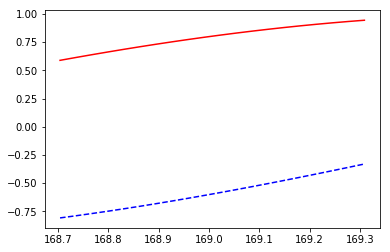

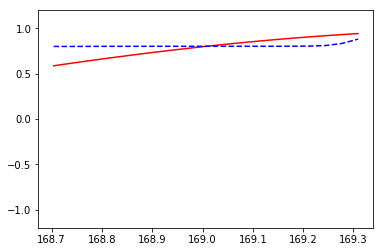

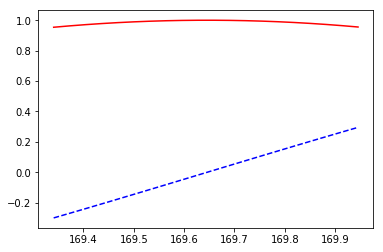

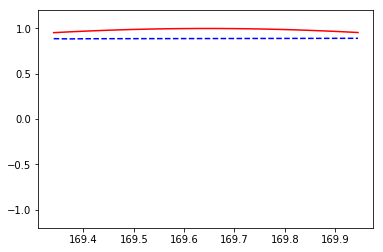

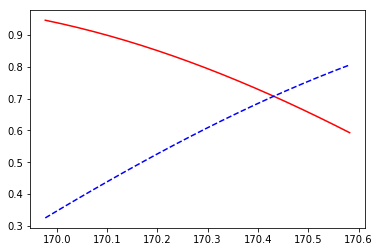

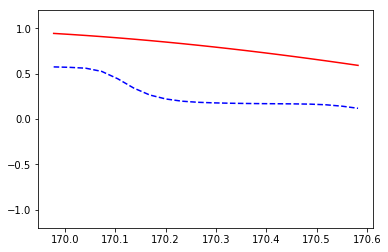

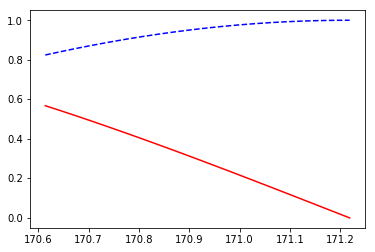

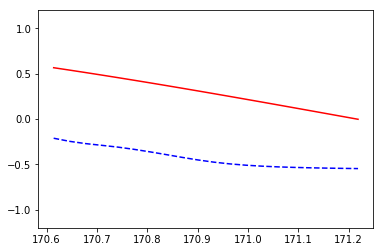

train cost:  0.038779423


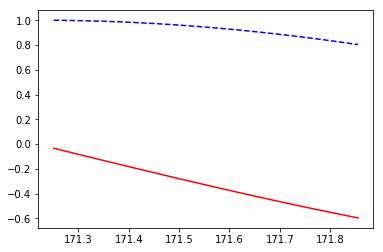

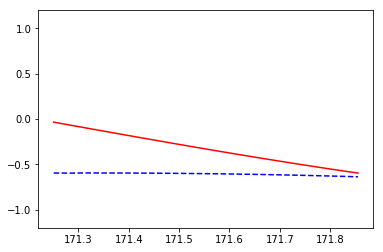

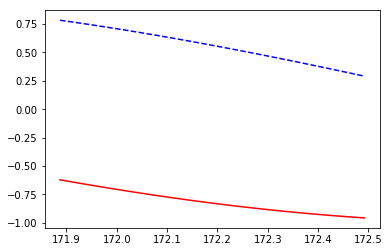

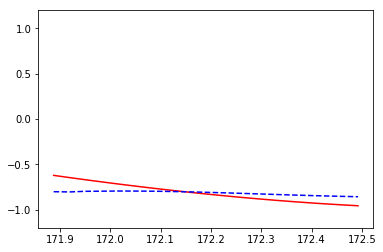

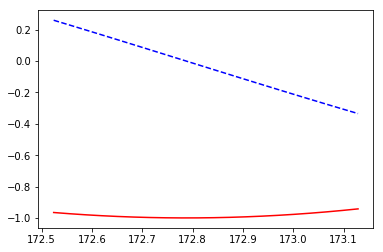

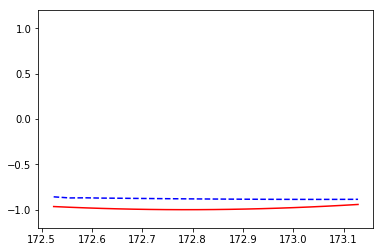

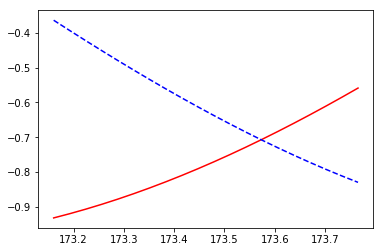

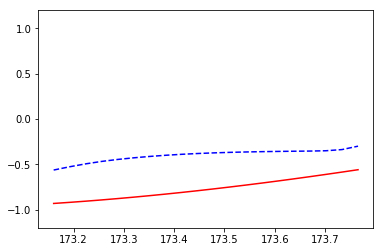

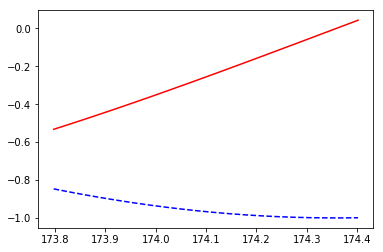

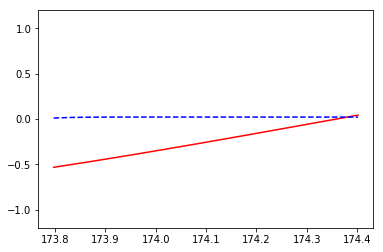

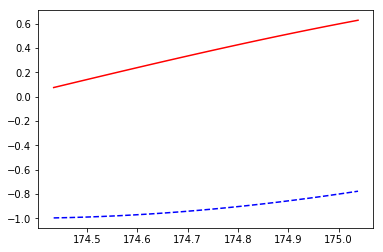

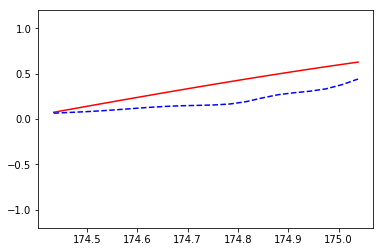

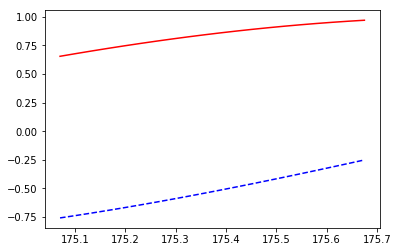

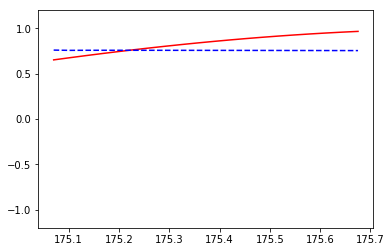

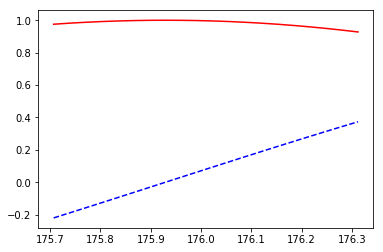

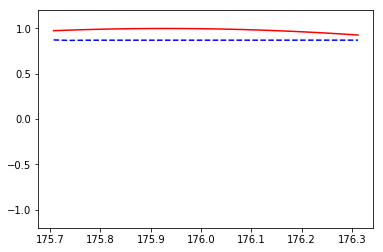

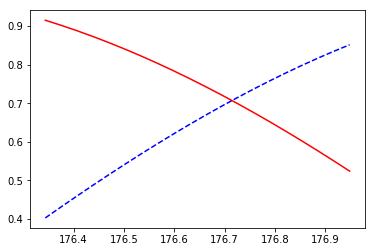

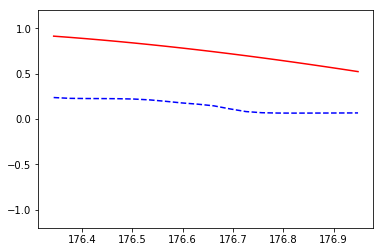

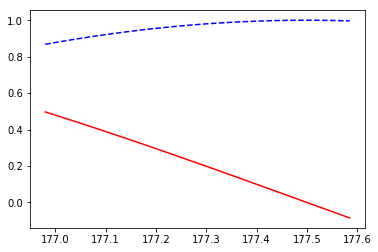

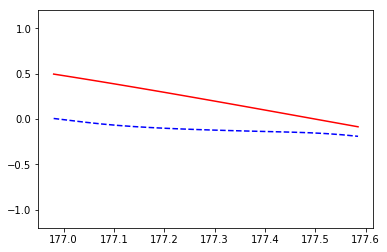

train cost:  0.034728337


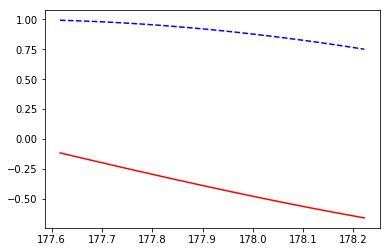

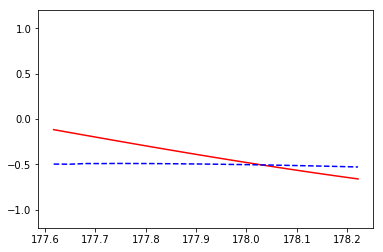

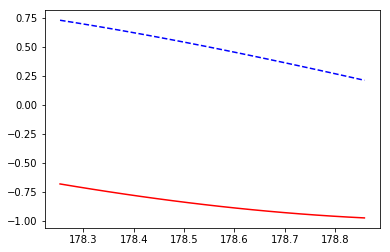

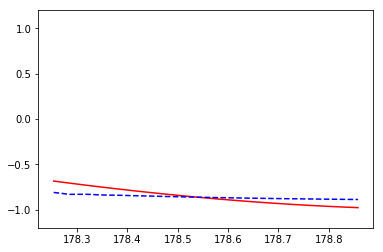

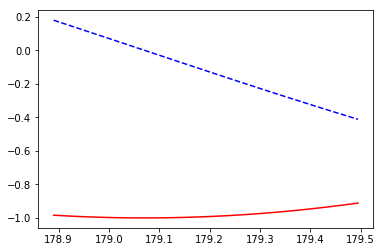

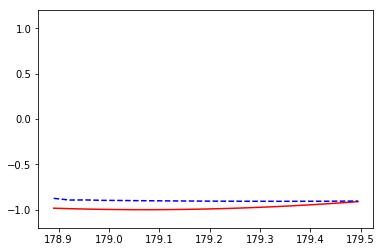

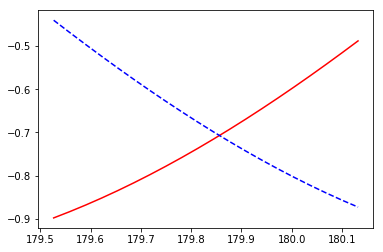

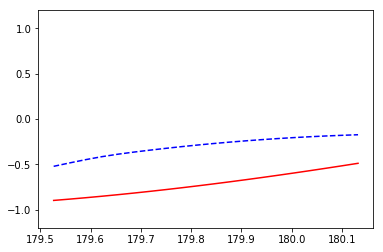

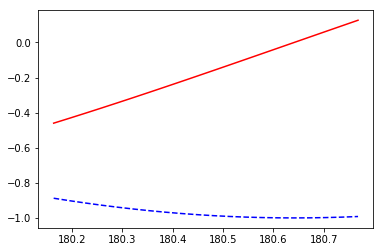

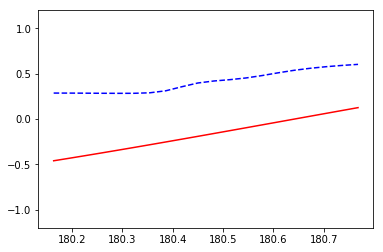

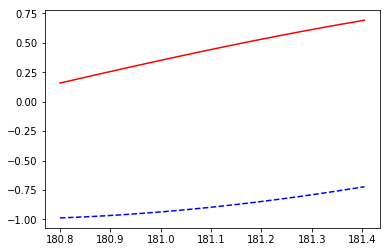

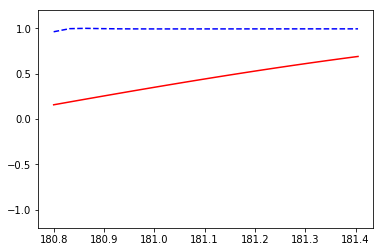

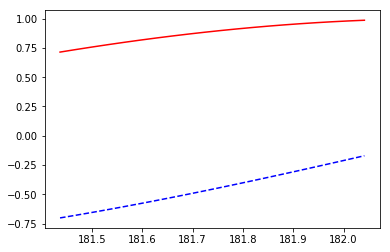

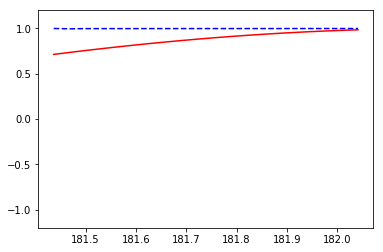

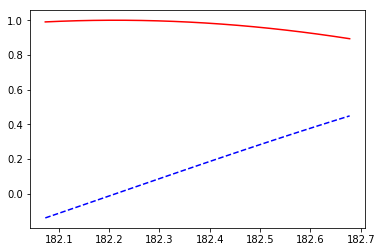

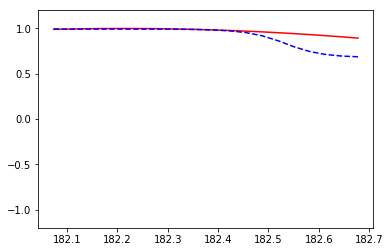

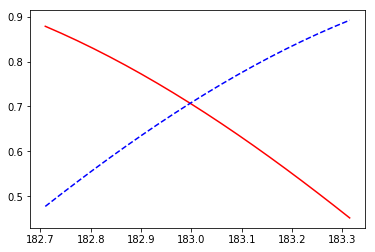

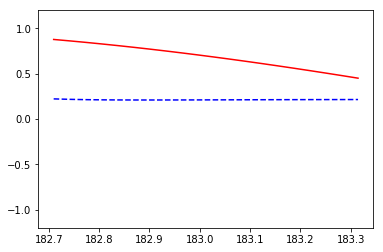

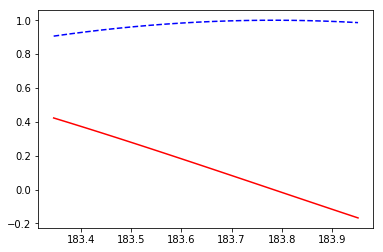

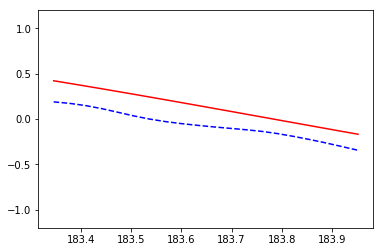

train cost:  0.0557651


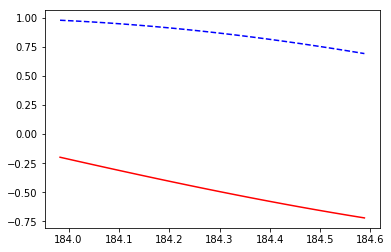

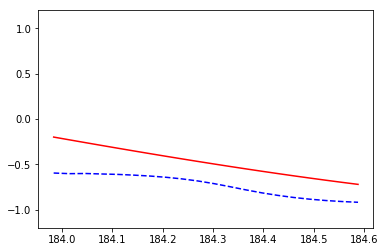

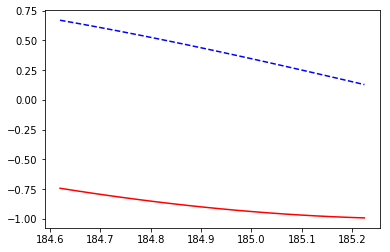

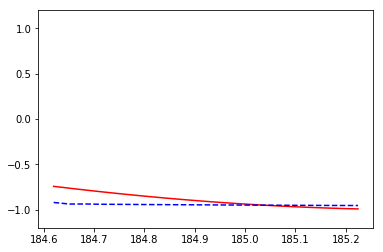

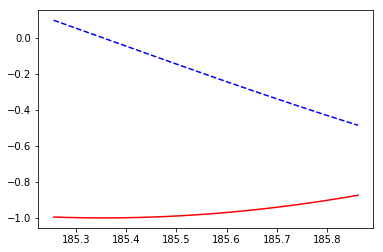

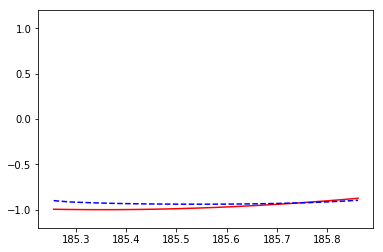

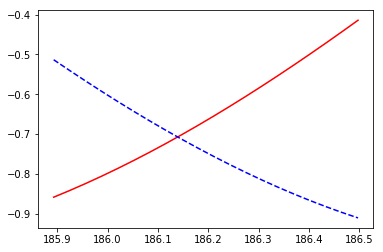

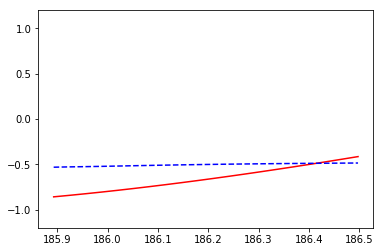

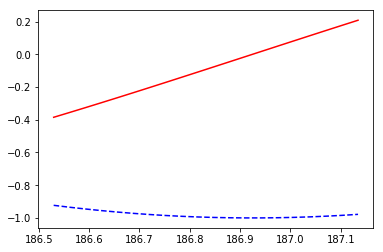

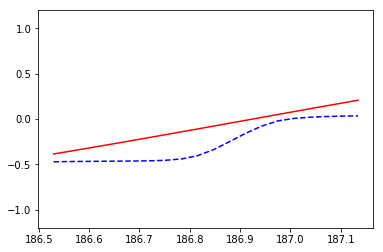

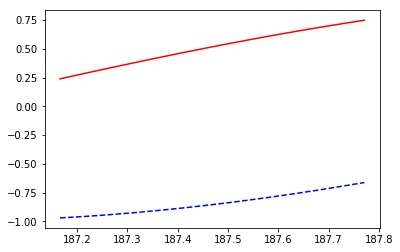

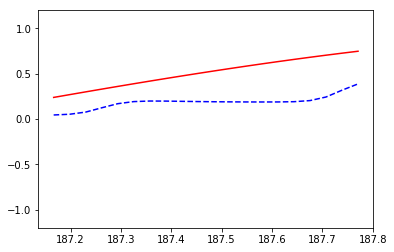

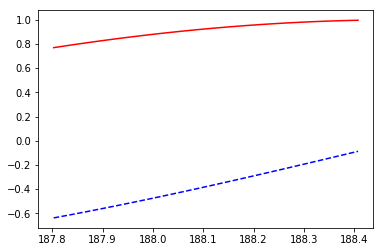

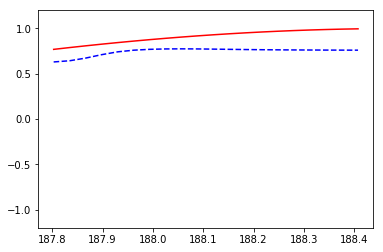

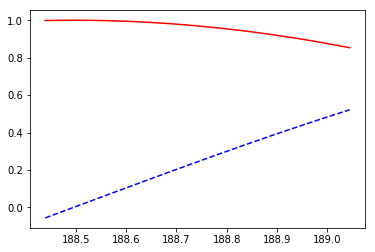

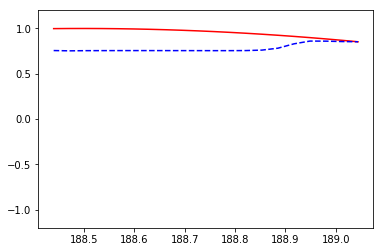

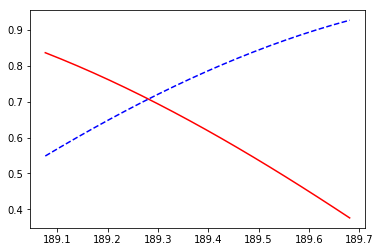

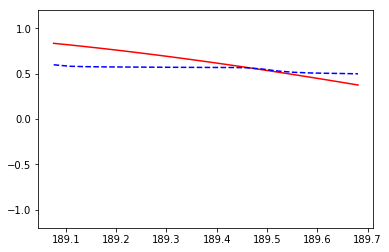

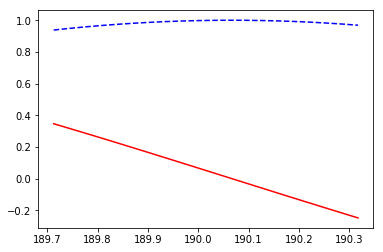

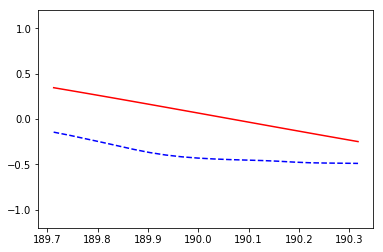

train cost:  0.053238336


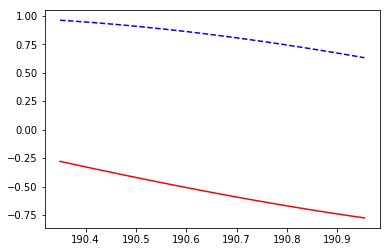

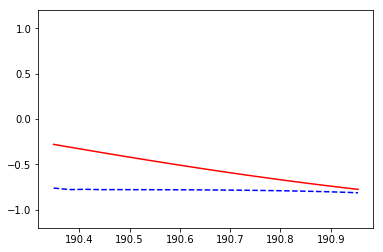

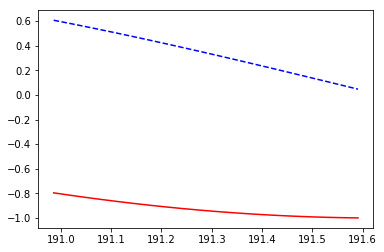

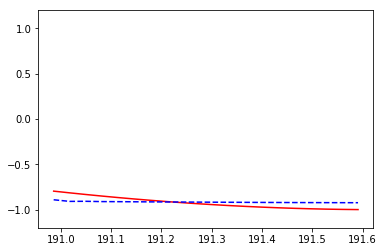

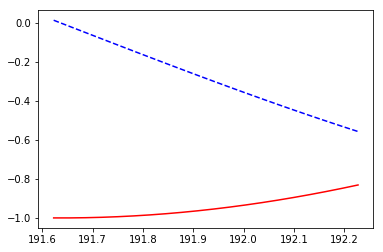

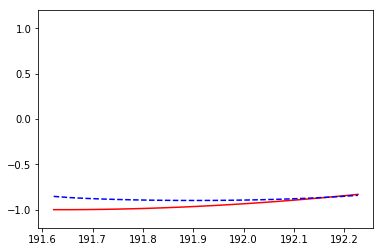

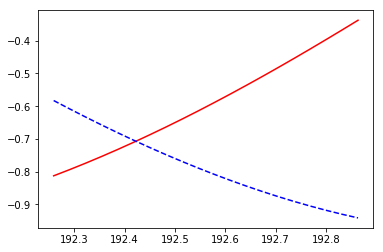

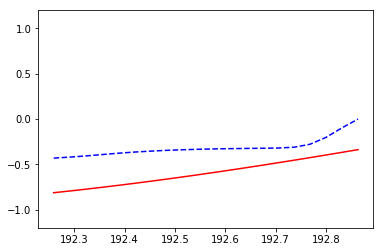

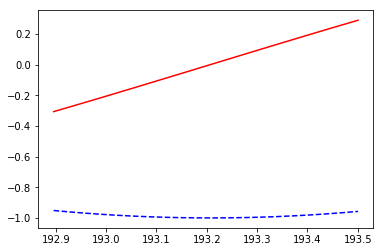

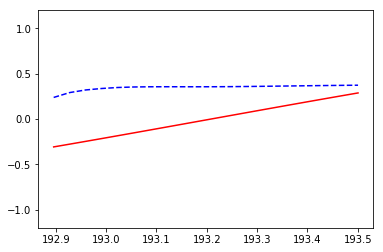

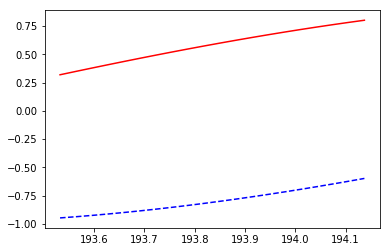

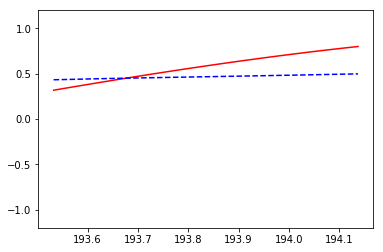

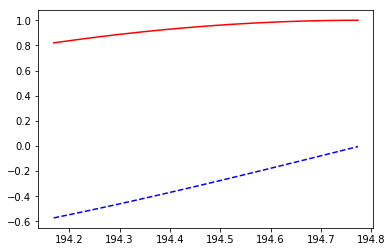

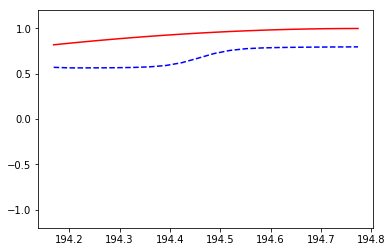

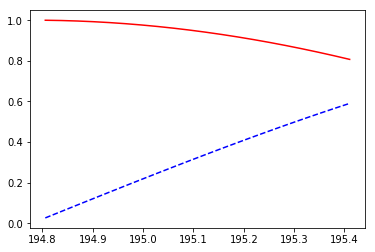

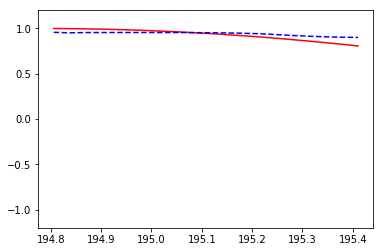

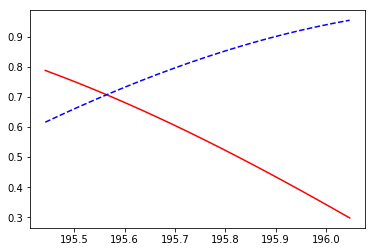

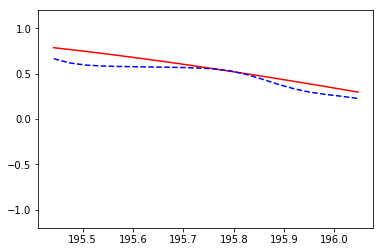

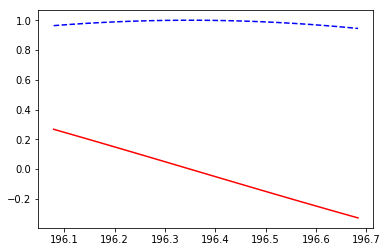

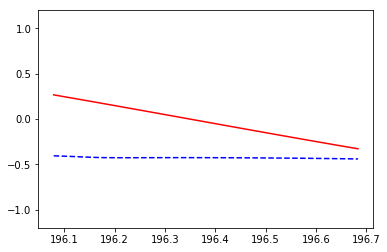

train cost:  0.014791872


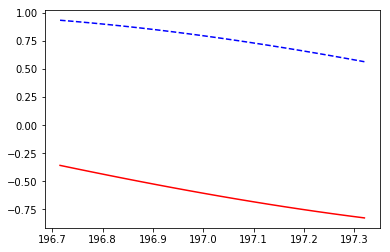

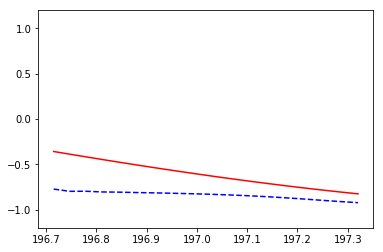

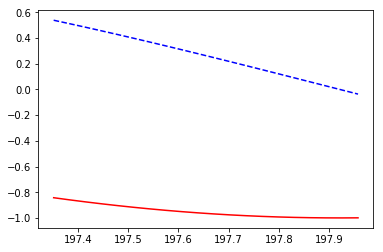

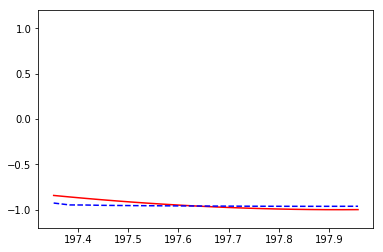

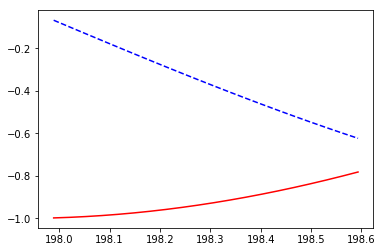

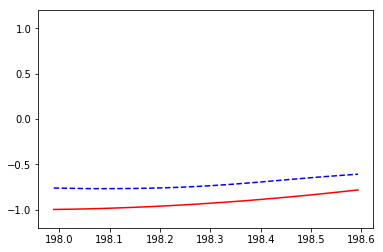

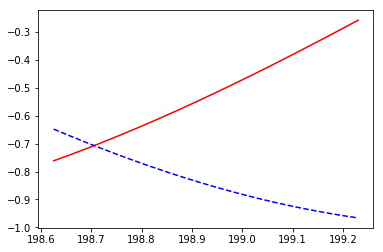

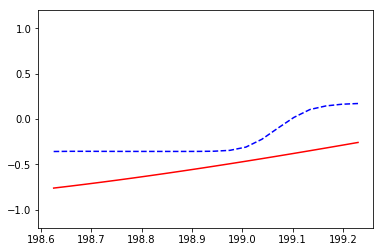

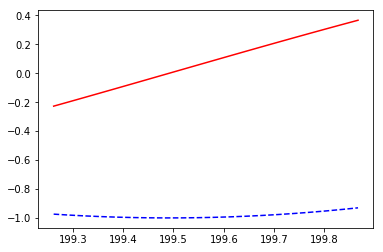

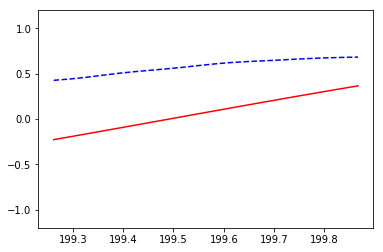

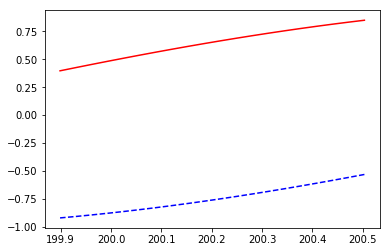

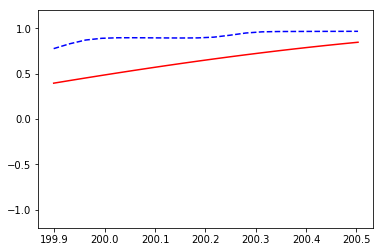

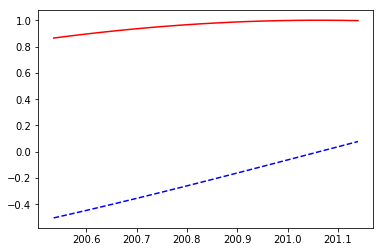

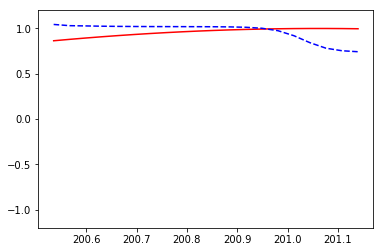

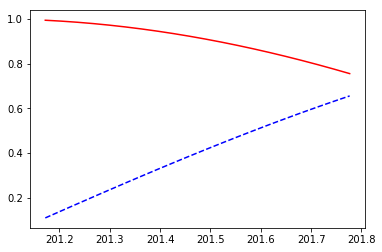

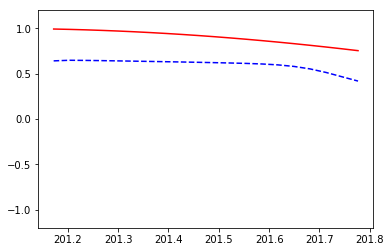

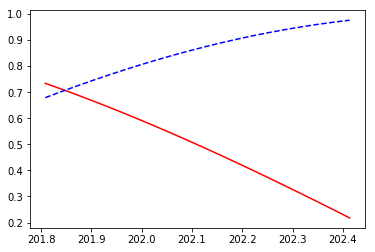

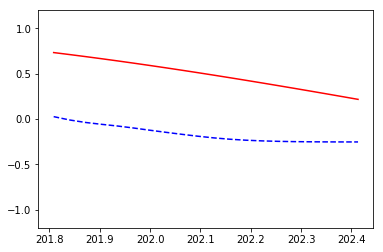

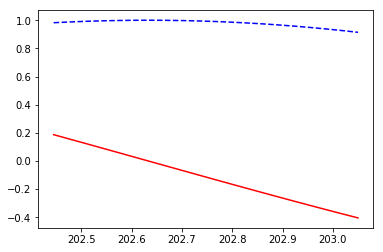

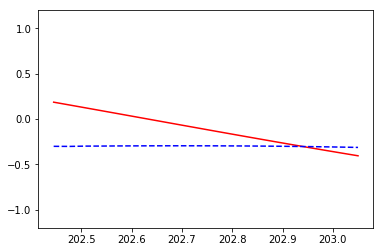

train cost:  0.021277267


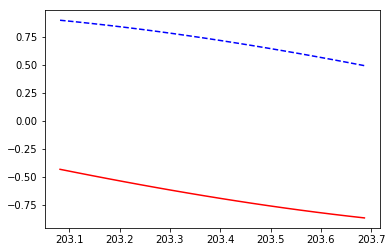

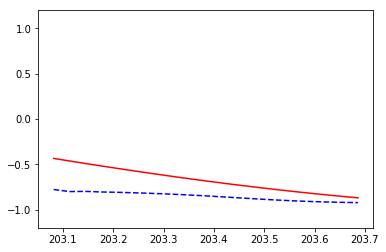

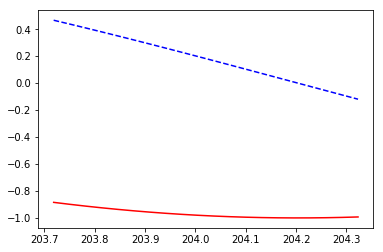

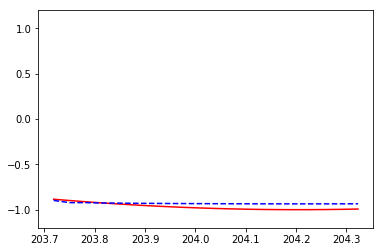

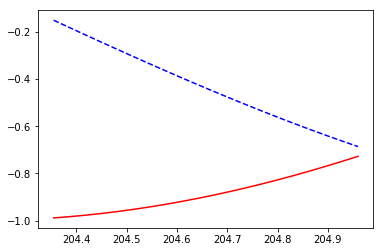

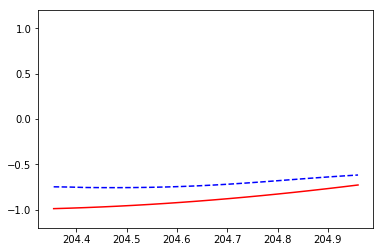

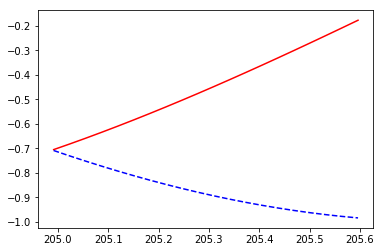

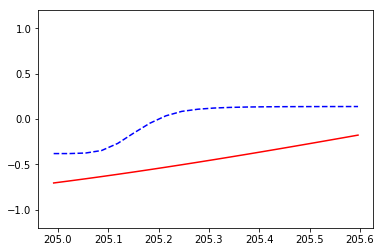

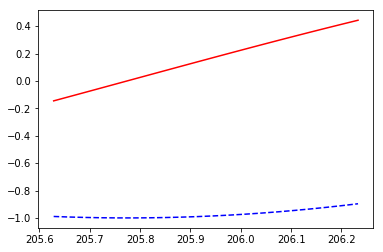

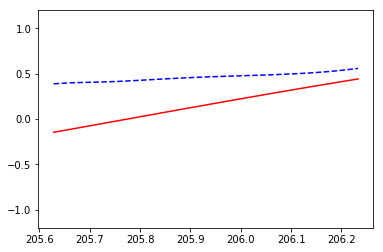

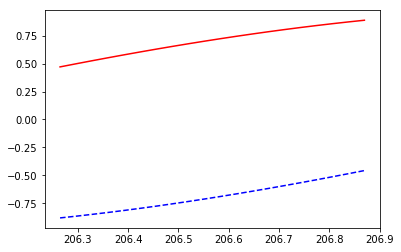

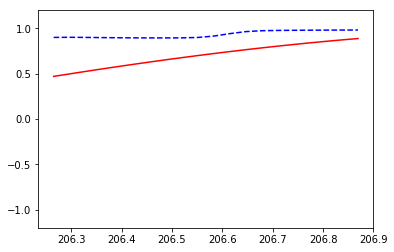

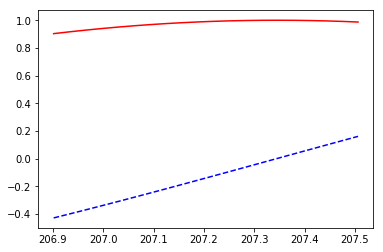

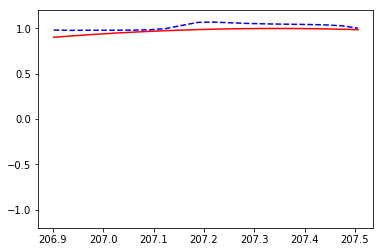

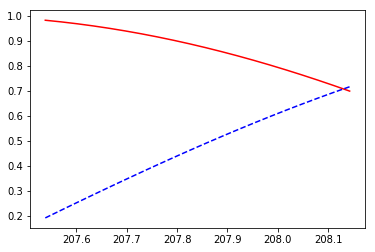

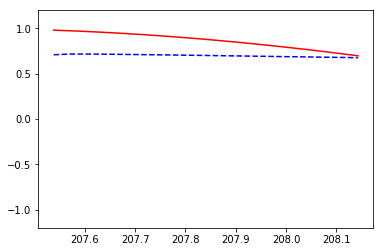

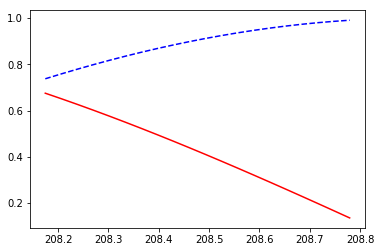

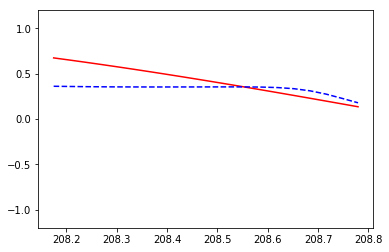

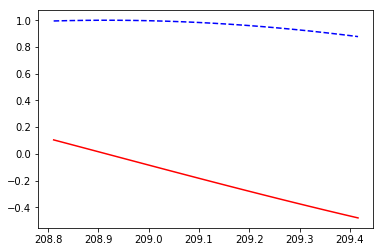

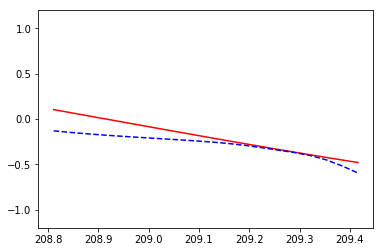

train cost:  0.019421801


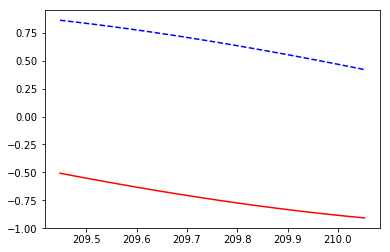

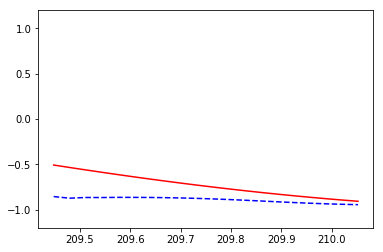

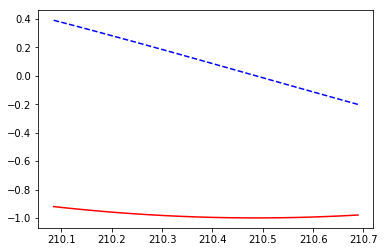

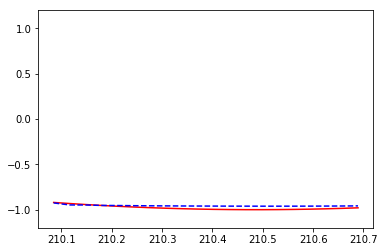

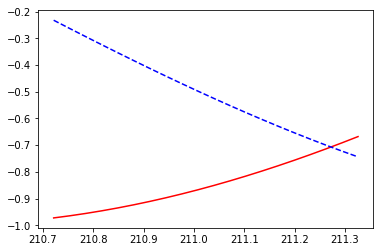

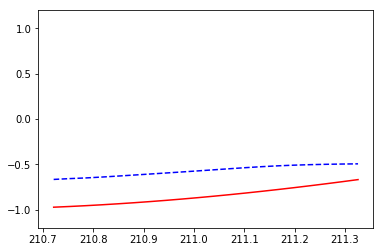

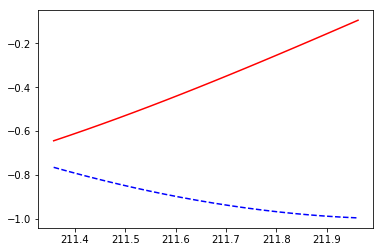

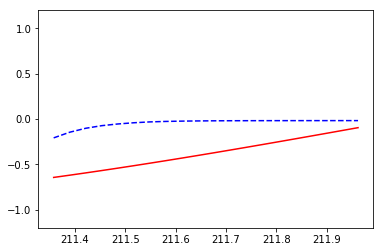

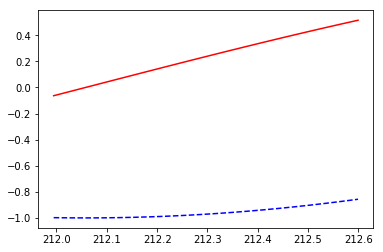

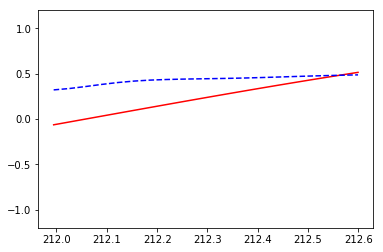

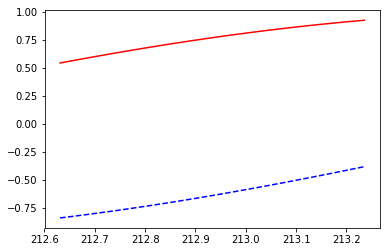

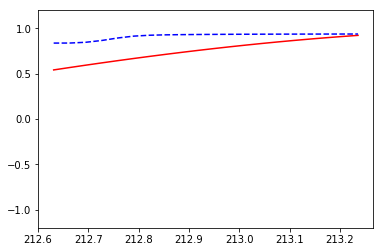

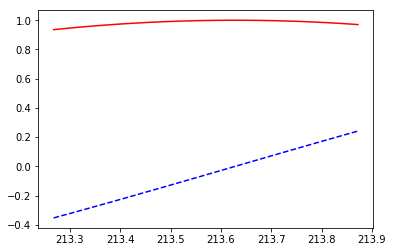

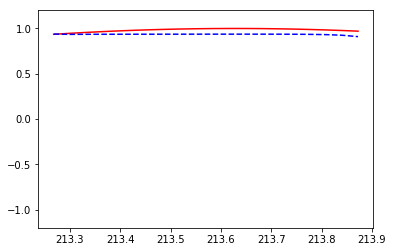

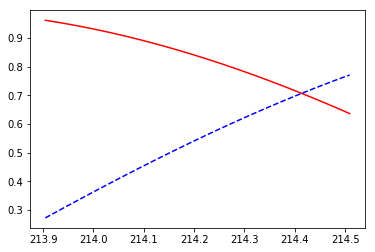

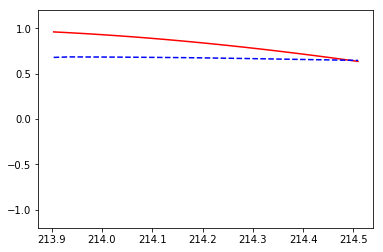

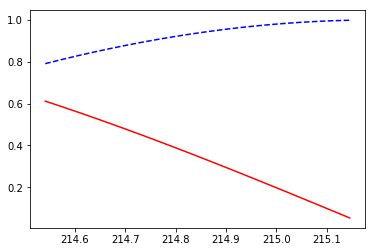

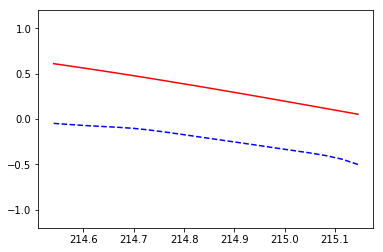

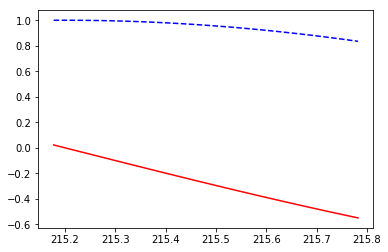

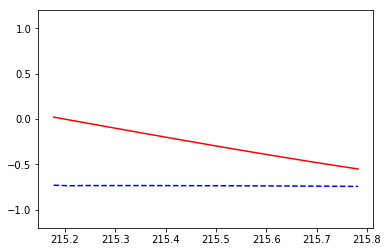

train cost:  0.029972017


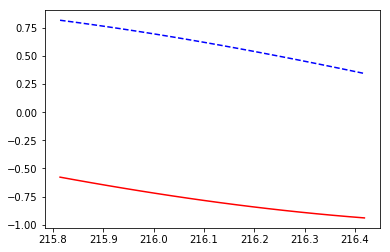

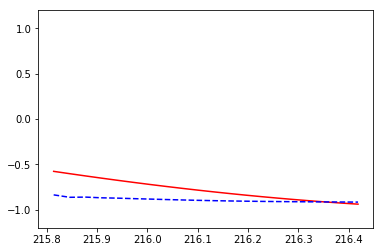

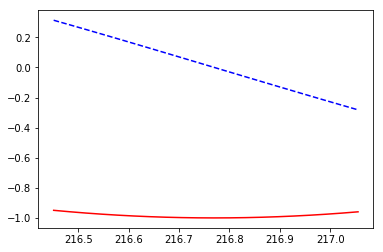

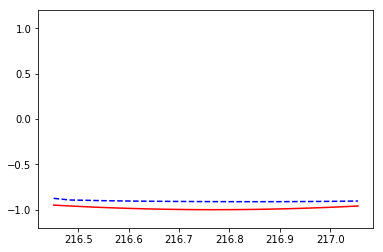

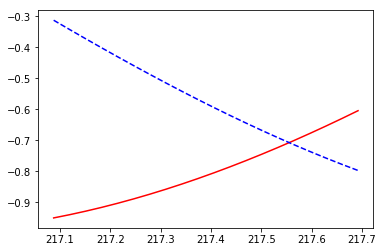

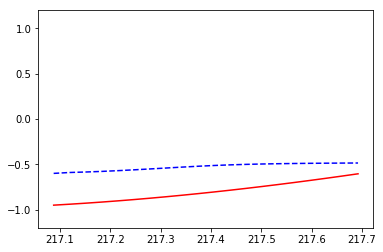

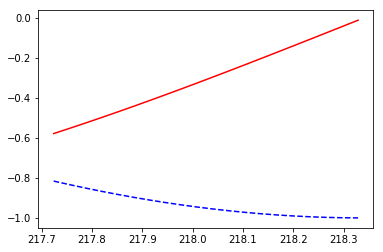

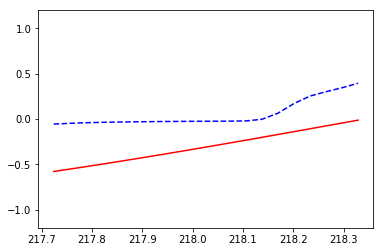

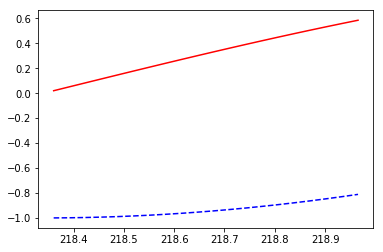

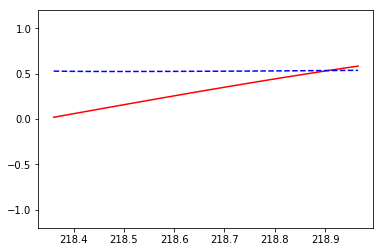

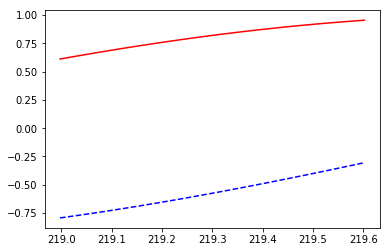

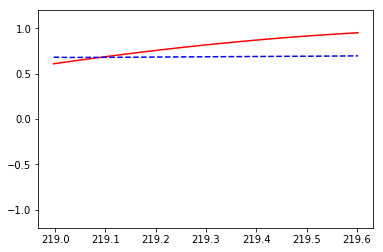

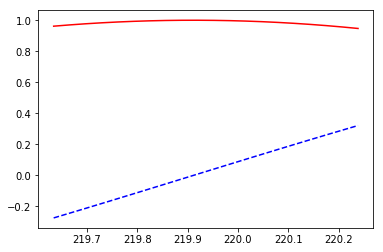

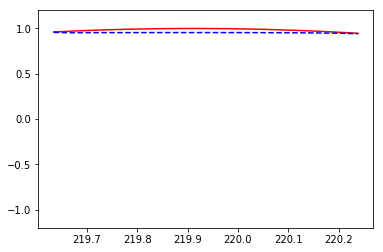

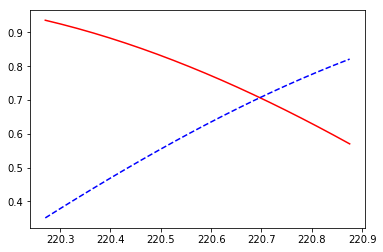

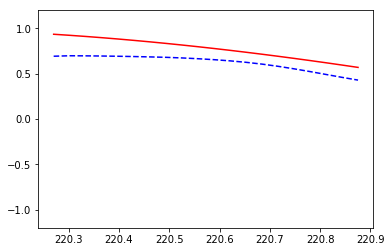

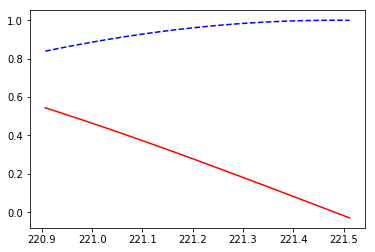

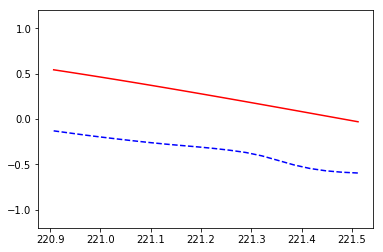

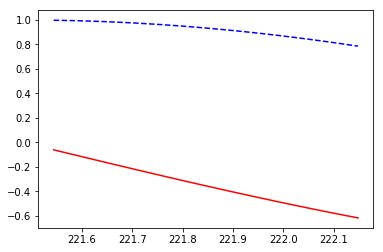

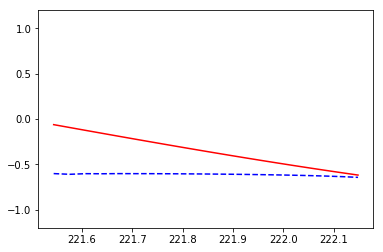

train cost:  0.032306403


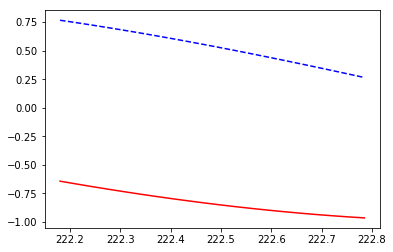

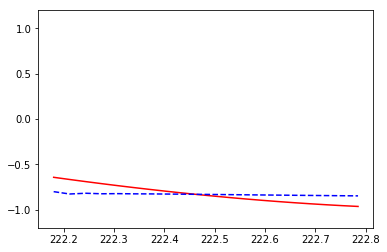

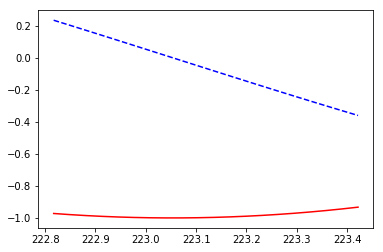

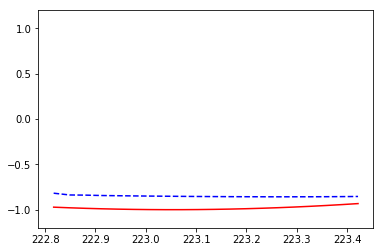

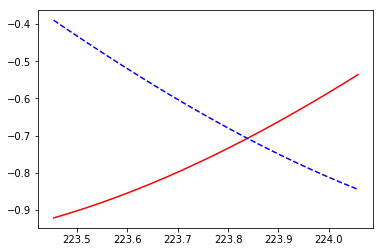

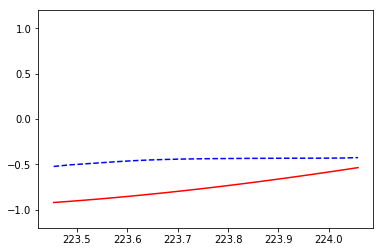

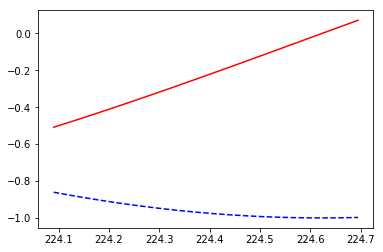

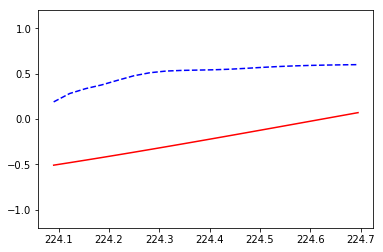

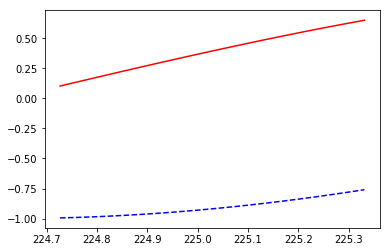

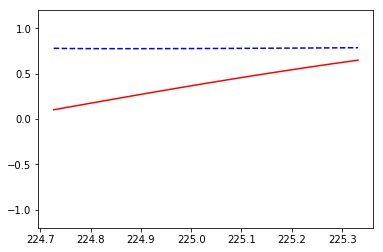

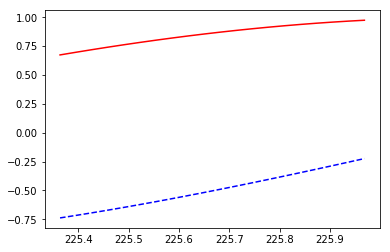

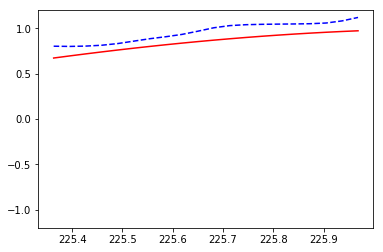

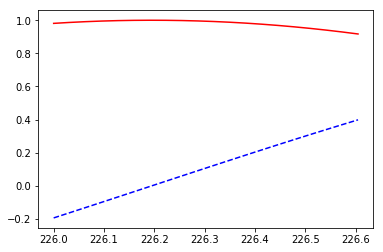

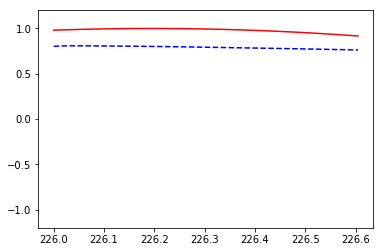

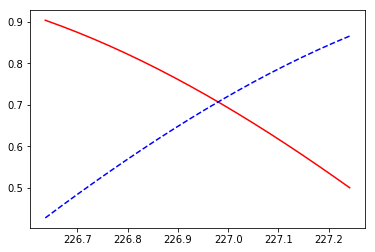

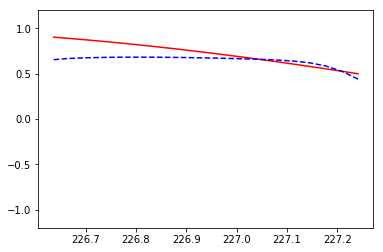

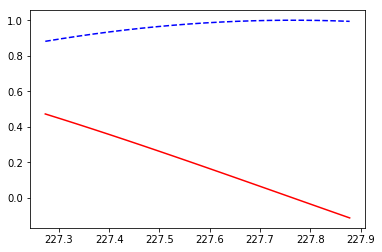

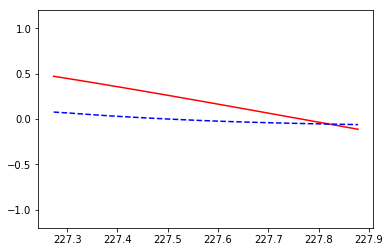

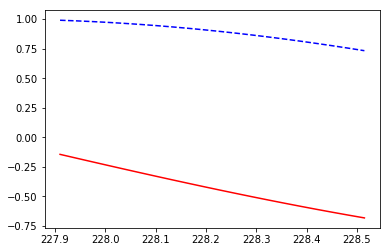

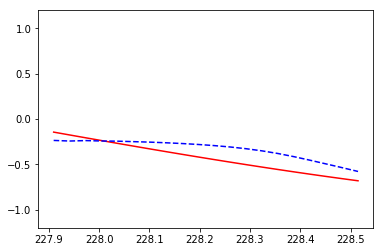

train cost:  0.020072782


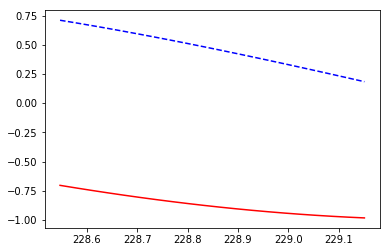

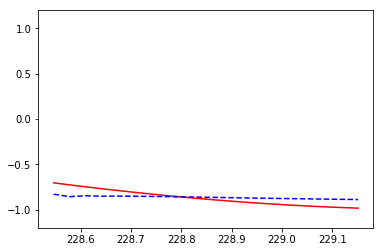

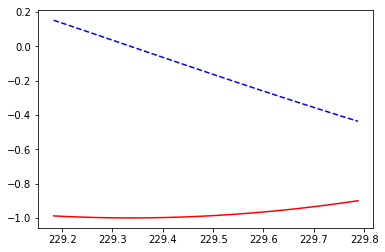

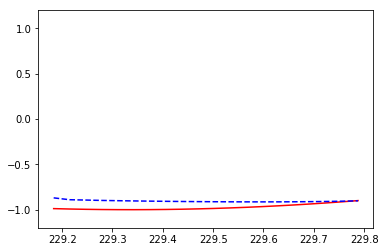

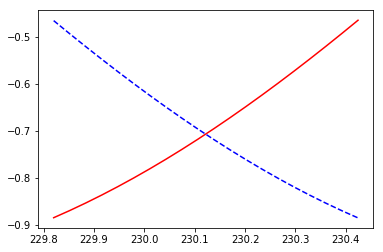

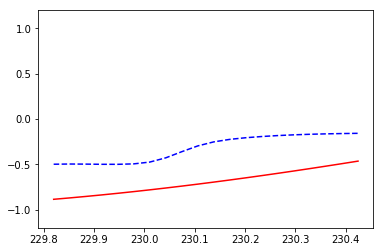

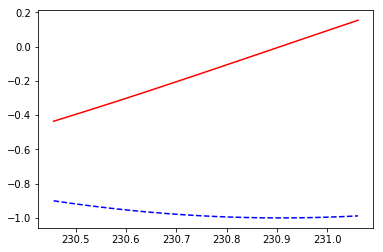

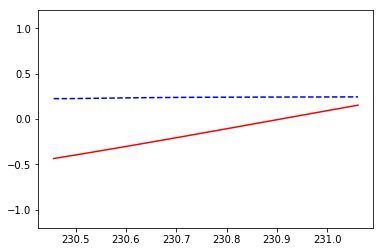

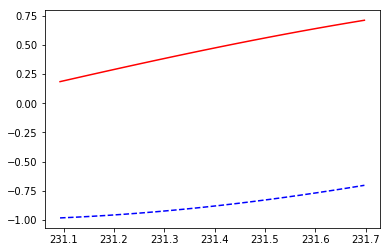

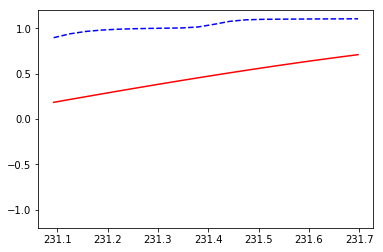

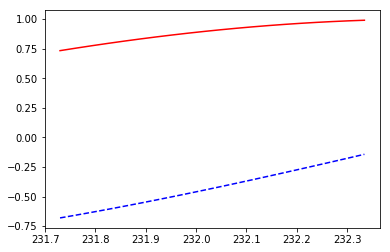

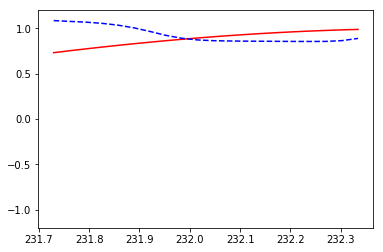

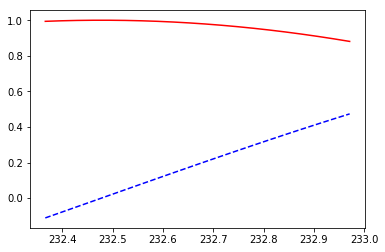

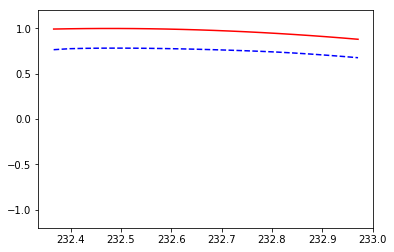

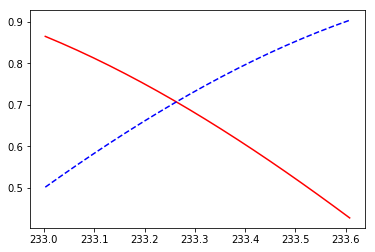

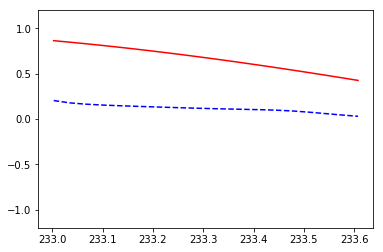

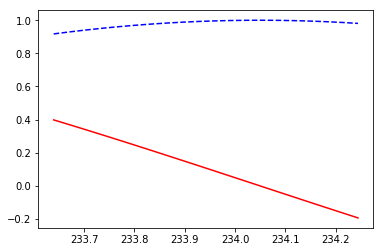

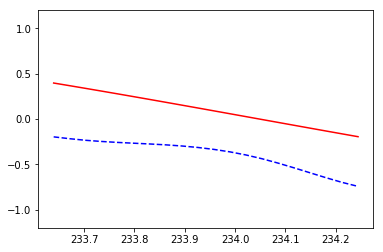

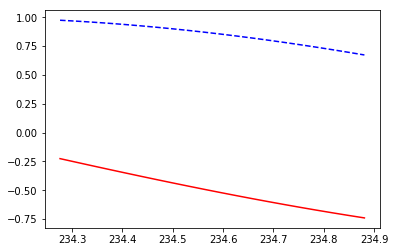

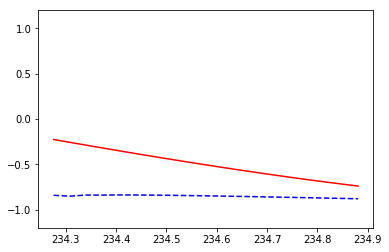

train cost:  0.034109052


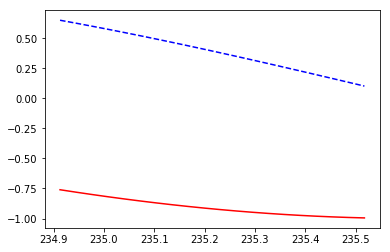

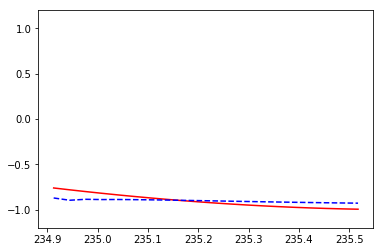

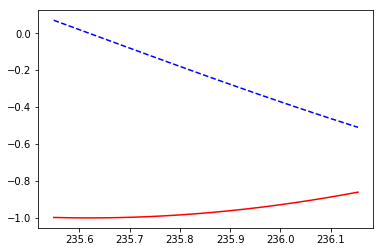

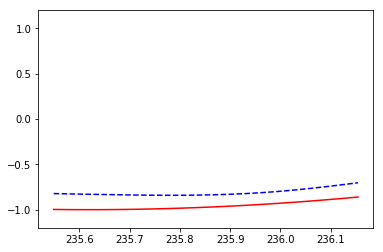

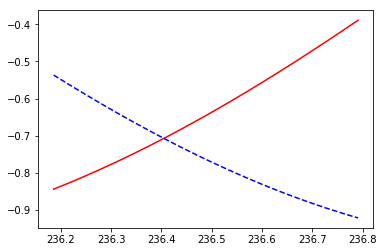

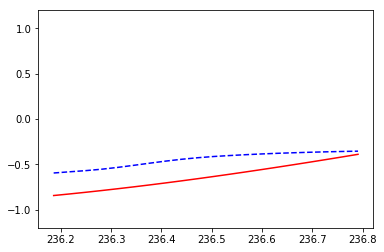

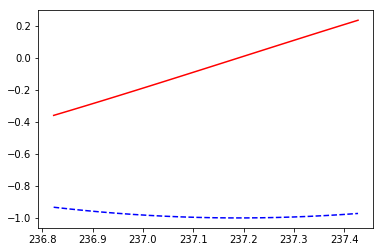

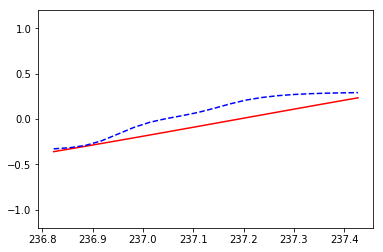

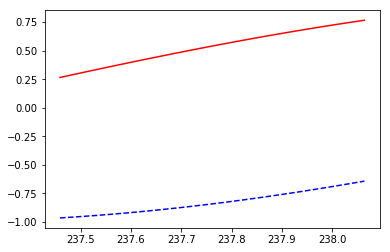

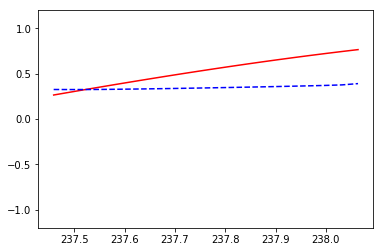

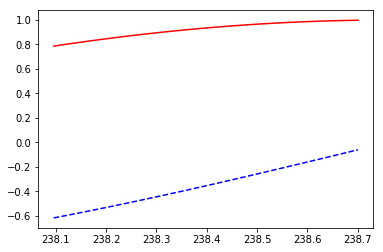

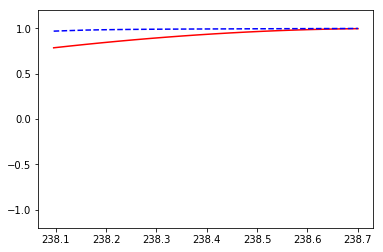

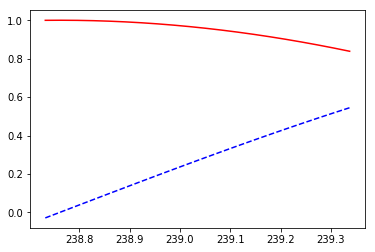

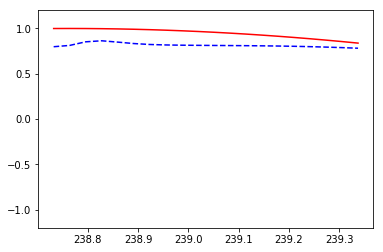

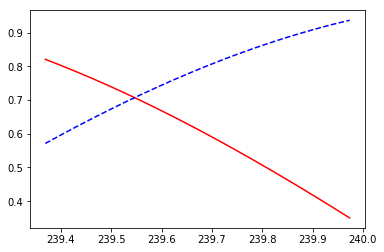

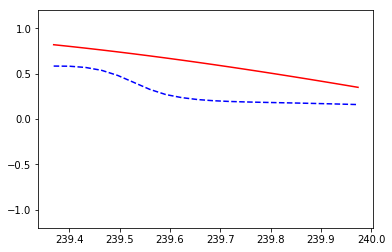

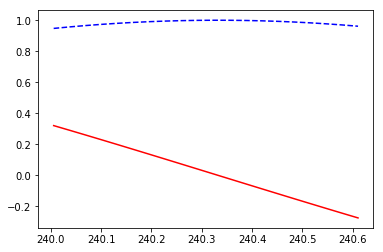

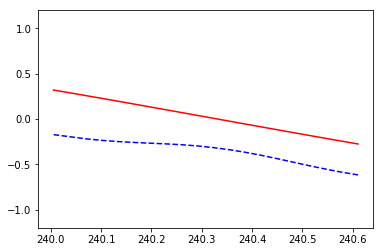

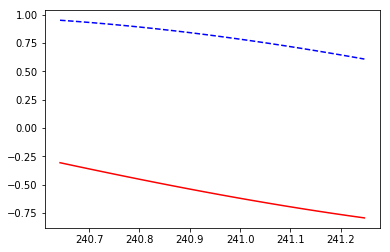

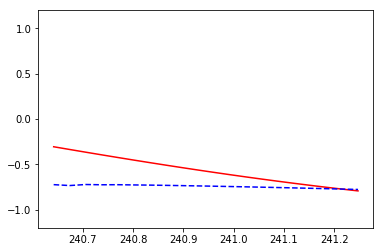

train cost:  0.01621825


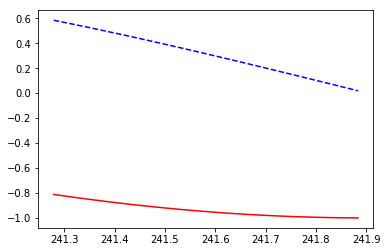

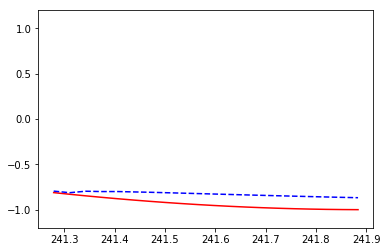

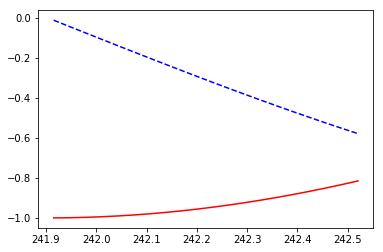

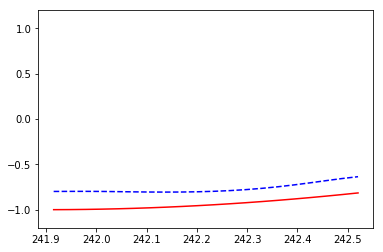

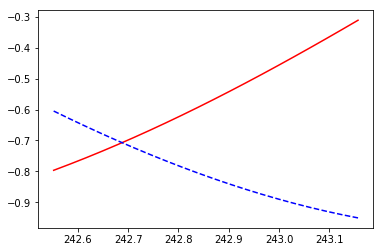

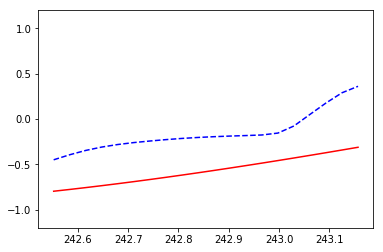

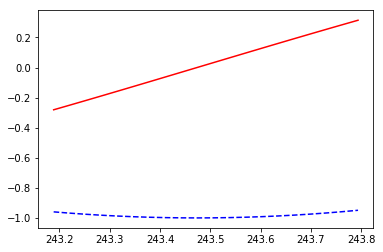

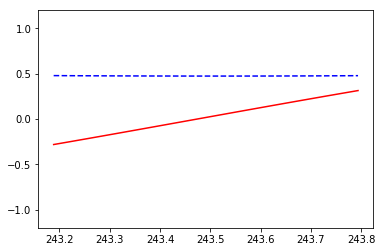

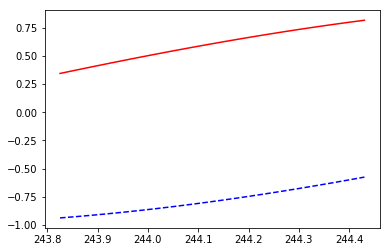

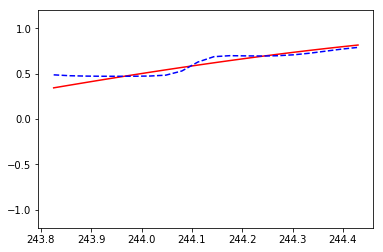

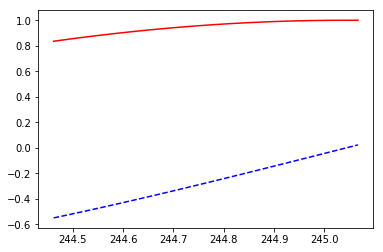

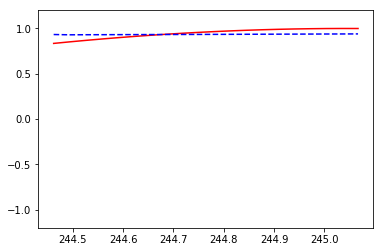

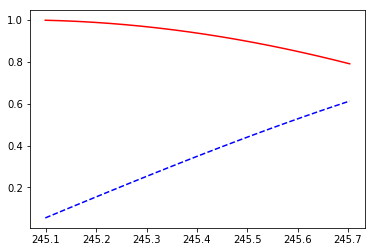

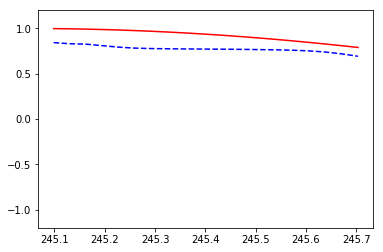

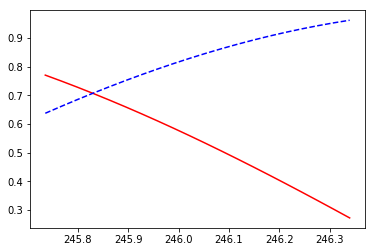

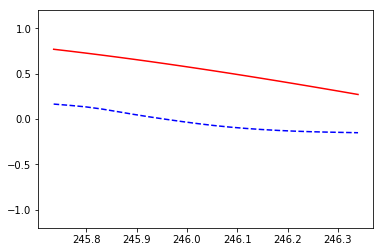

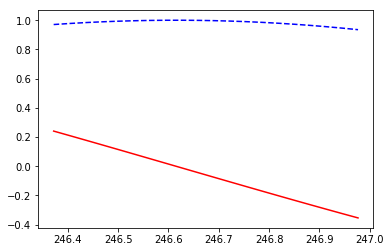

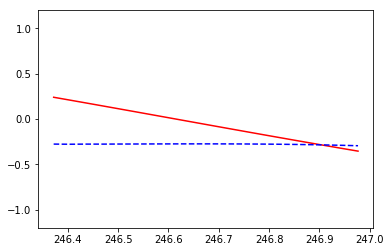

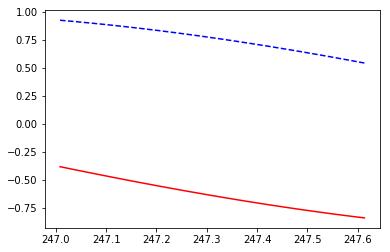

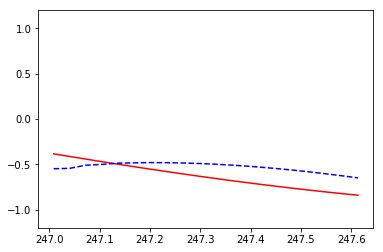

train cost:  0.025001213


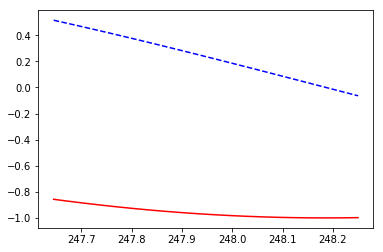

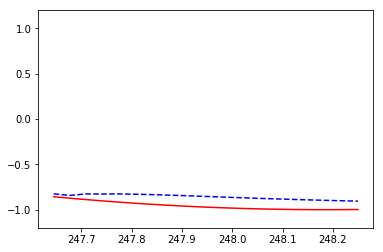

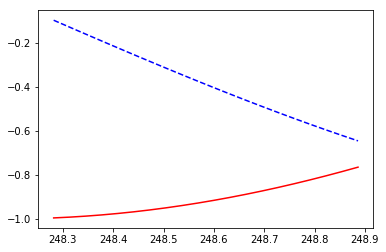

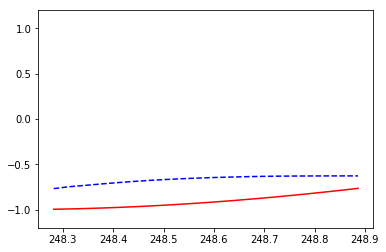

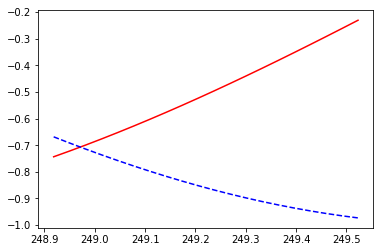

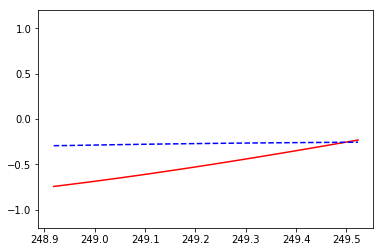

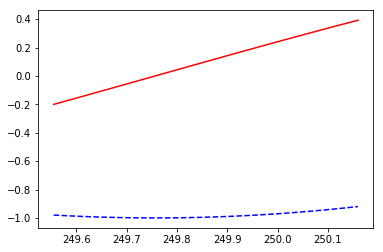

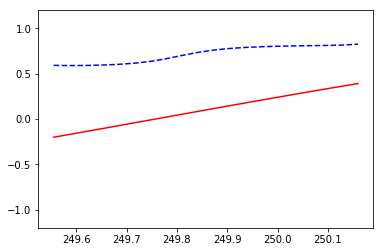

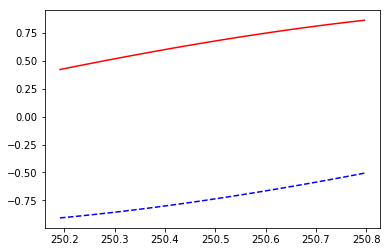

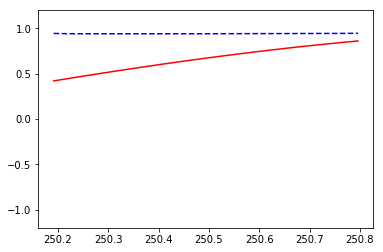

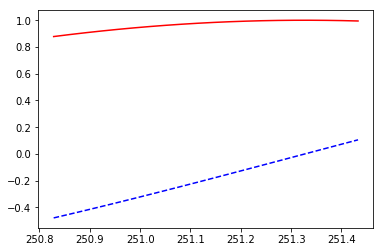

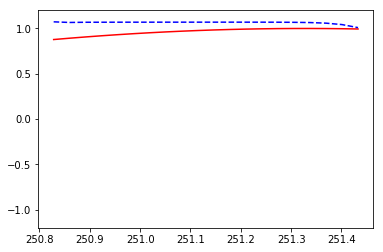

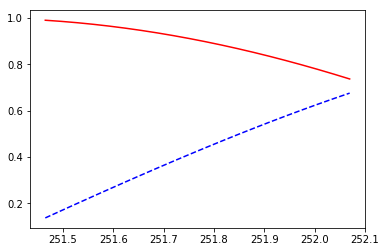

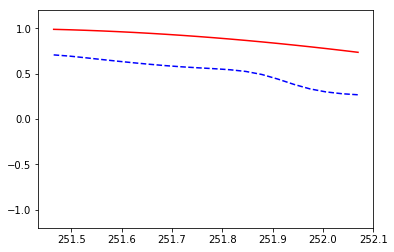

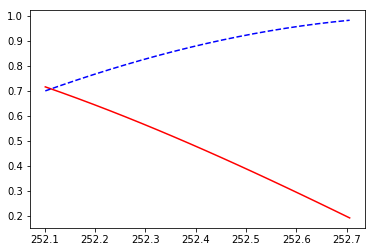

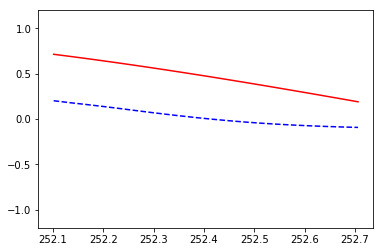

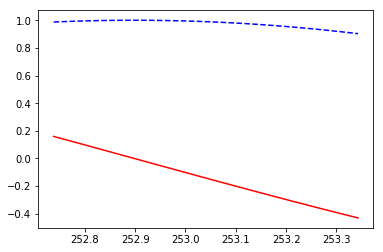

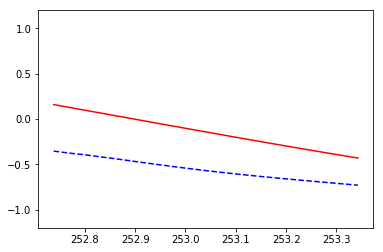

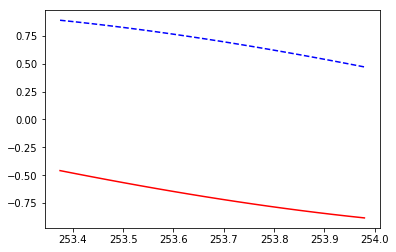

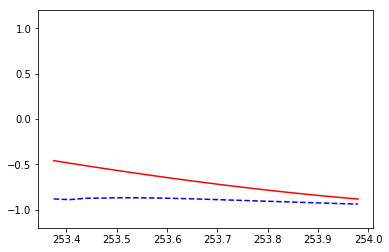

train cost:  0.014282571


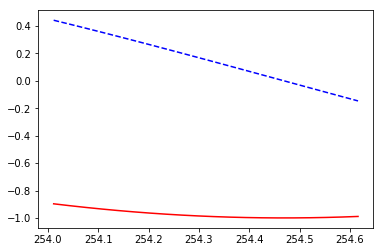

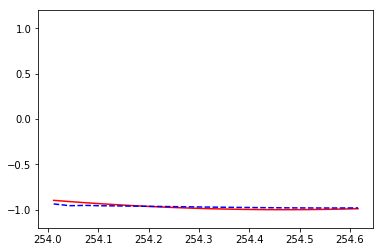

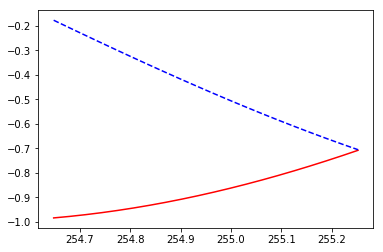

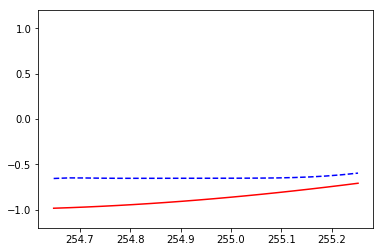

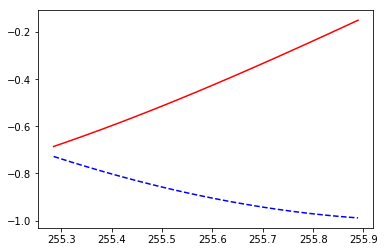

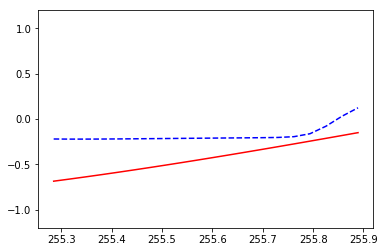

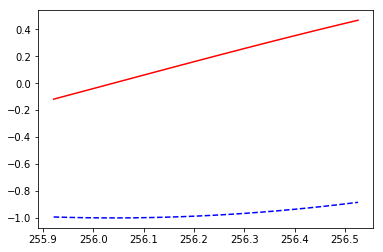

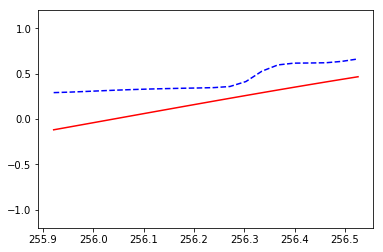

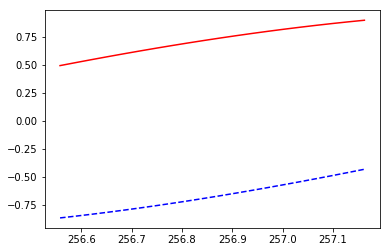

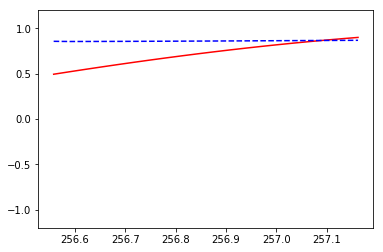

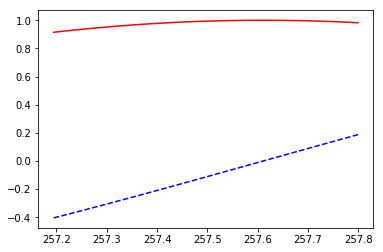

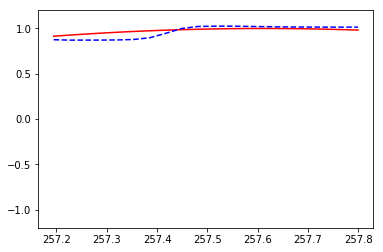

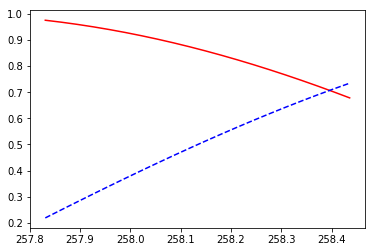

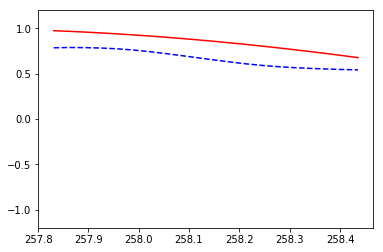

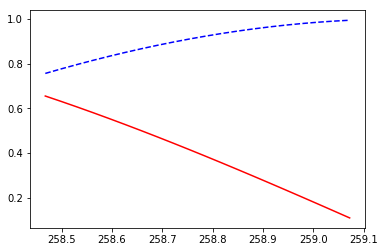

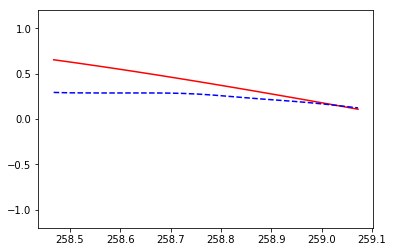

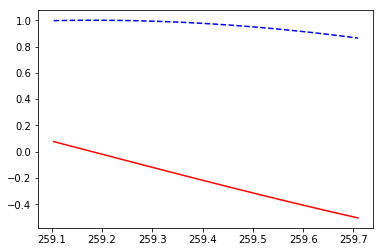

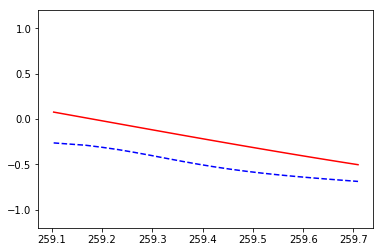

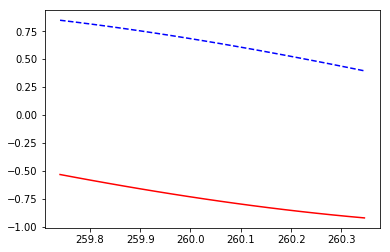

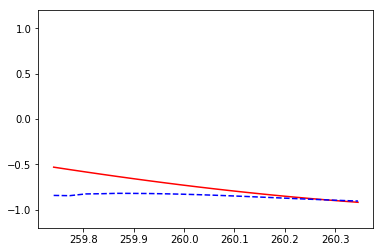

train cost:  0.008404946


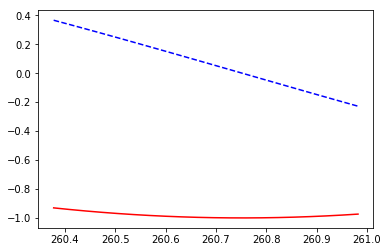

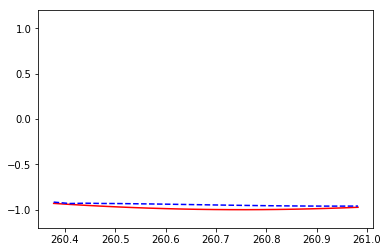

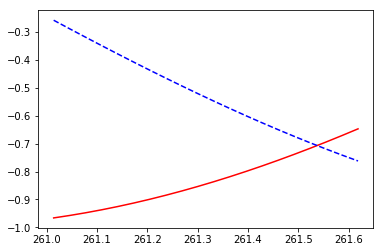

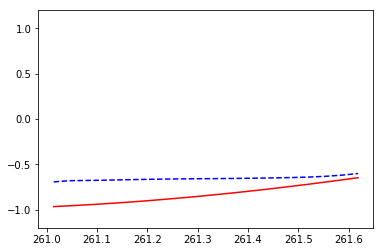

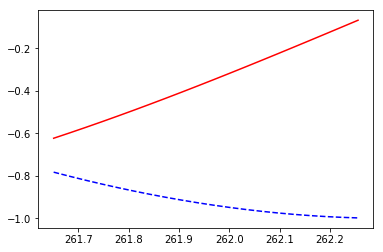

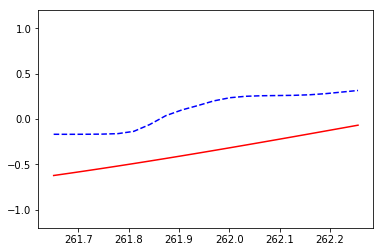

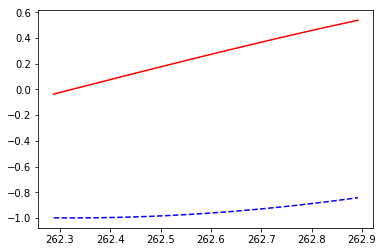

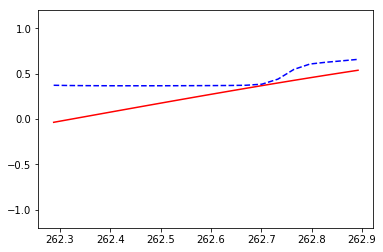

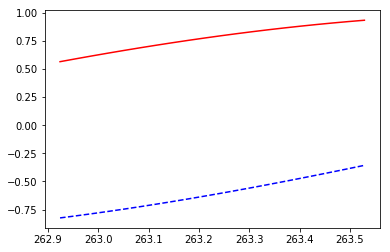

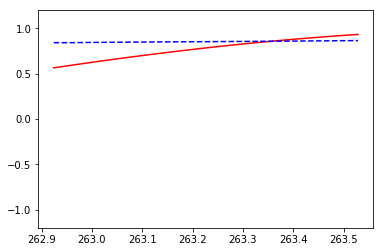

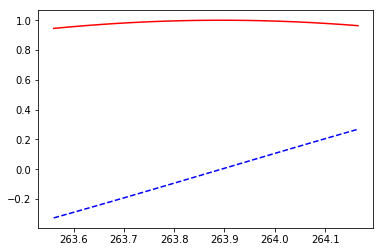

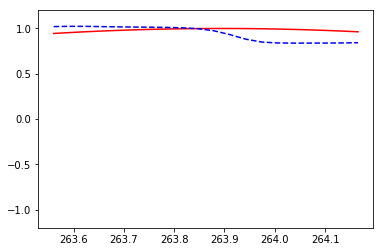

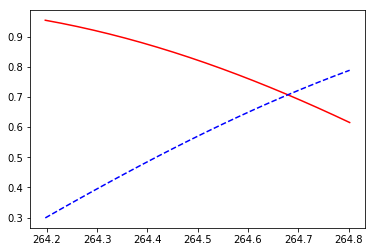

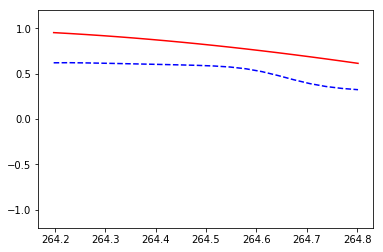

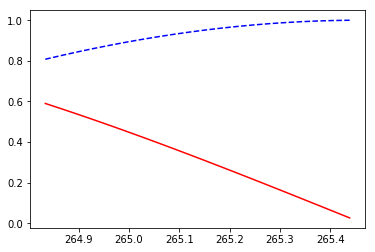

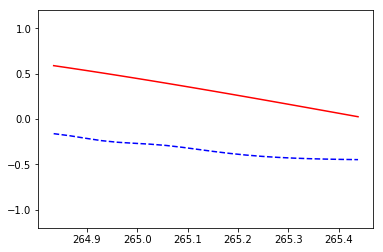

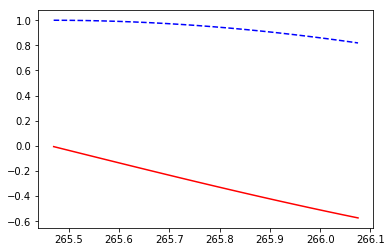

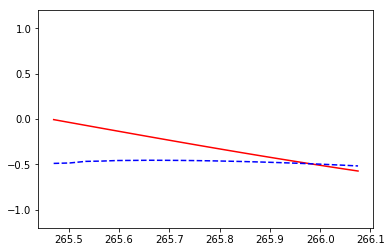

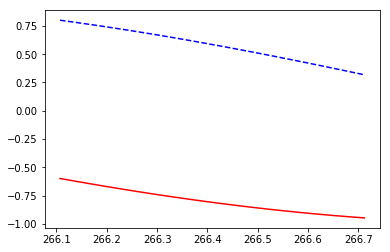

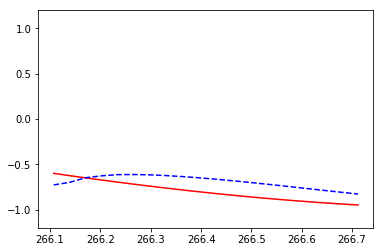

train cost:  0.024029331


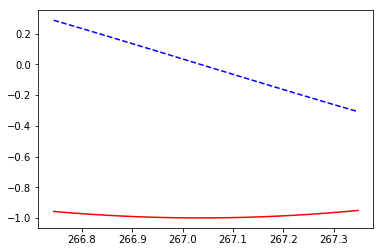

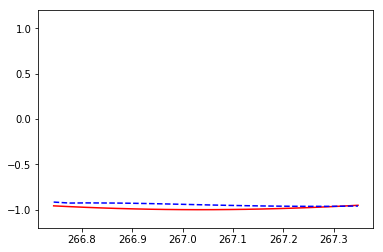

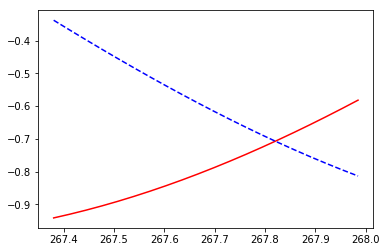

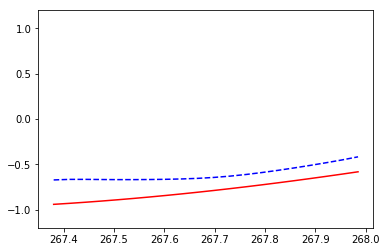

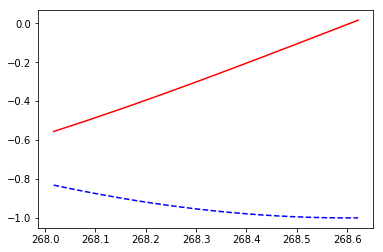

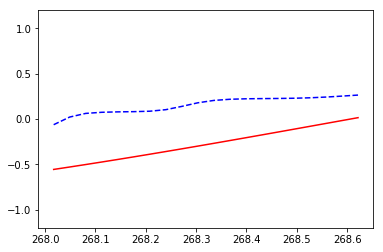

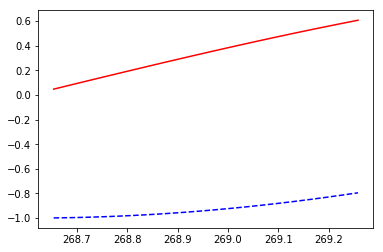

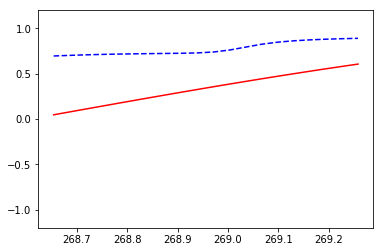

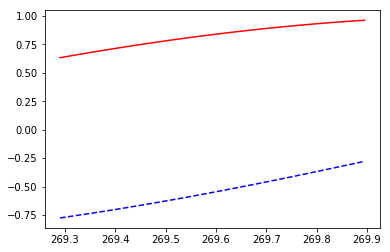

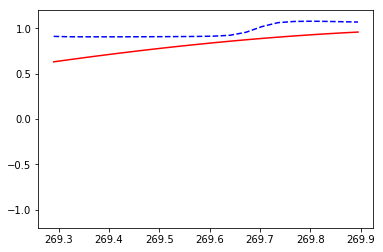

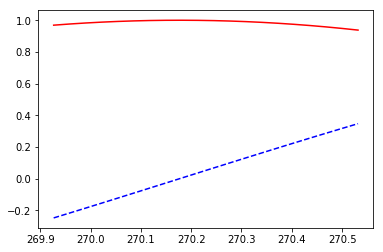

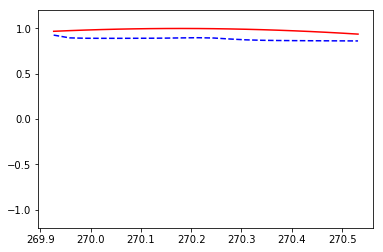

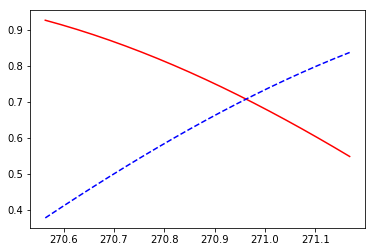

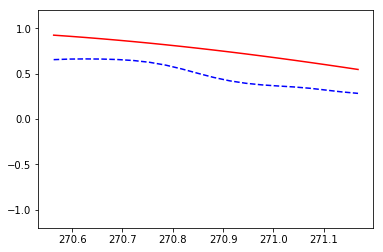

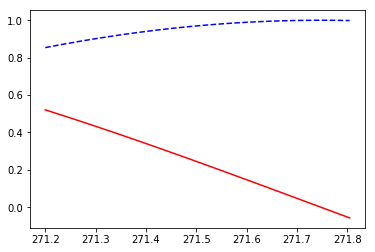

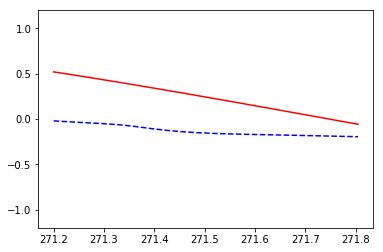

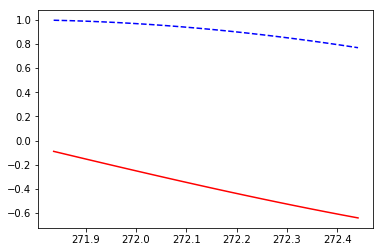

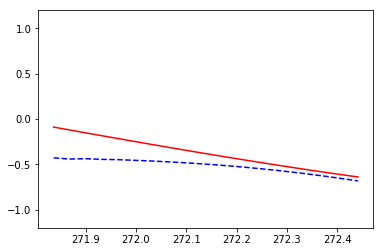

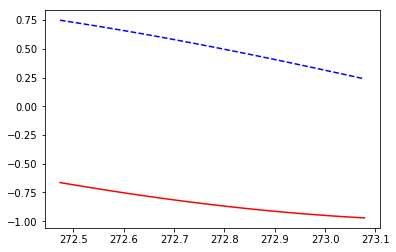

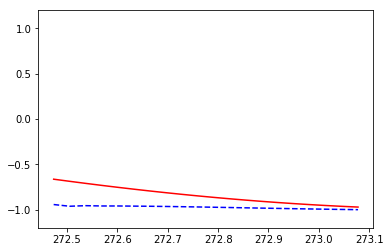

train cost:  0.011632299


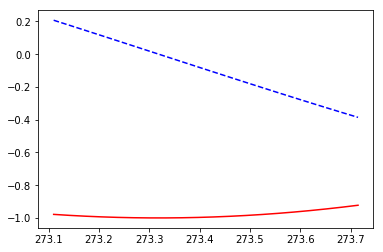

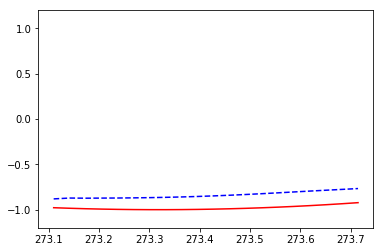

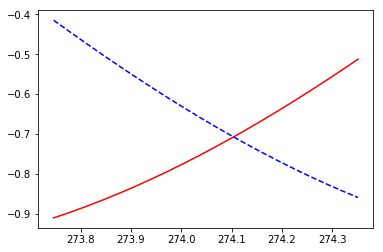

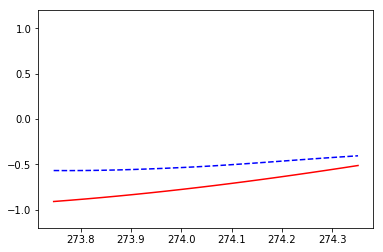

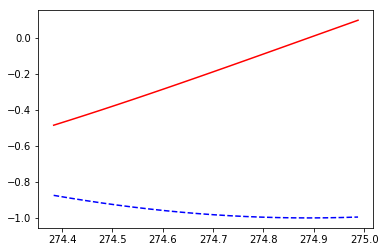

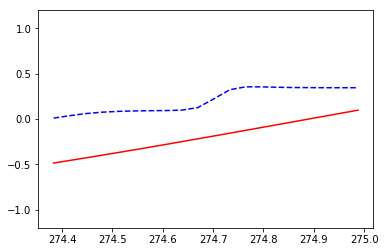

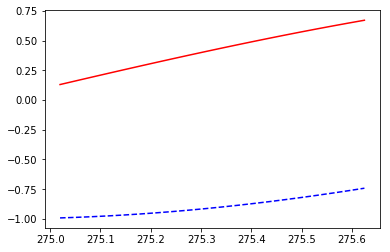

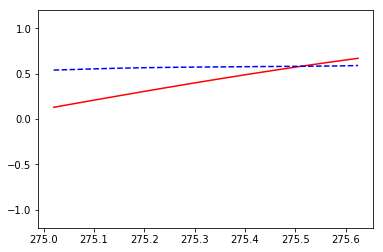

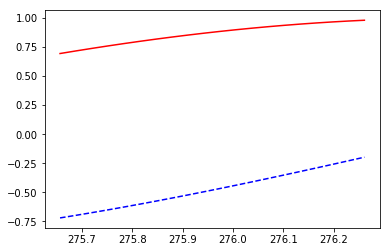

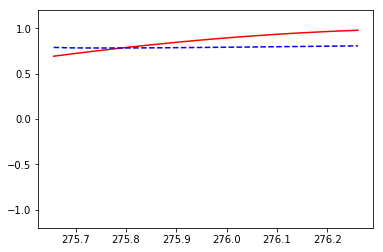

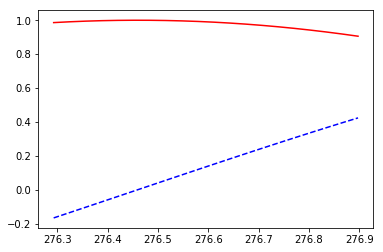

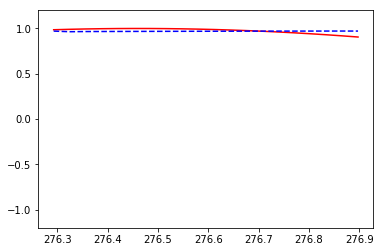

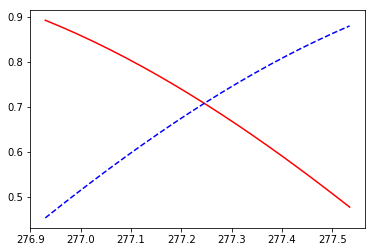

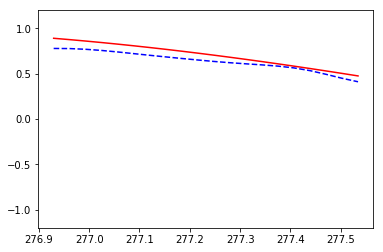

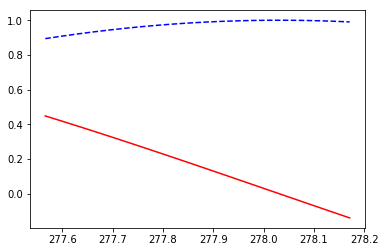

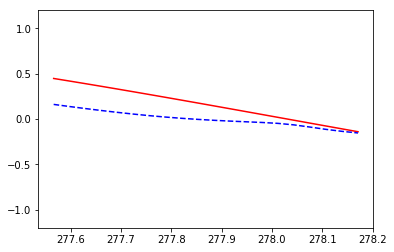

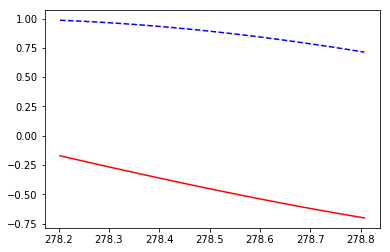

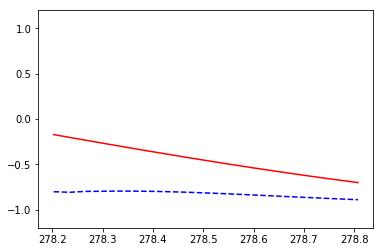

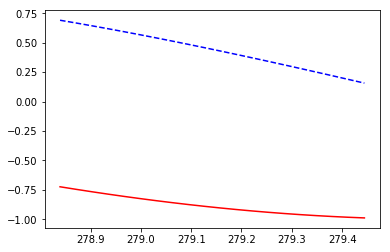

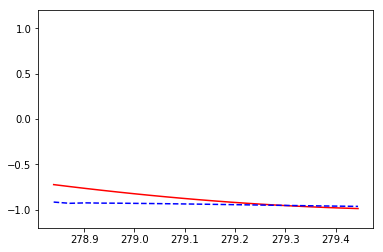

train cost:  0.021729538


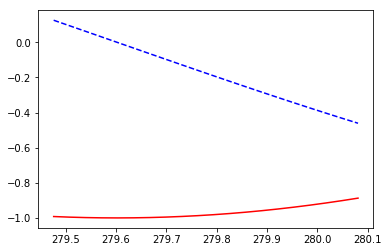

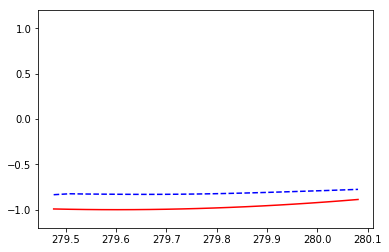

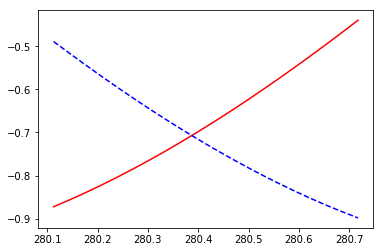

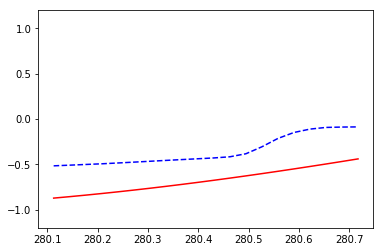

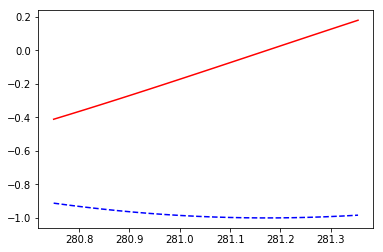

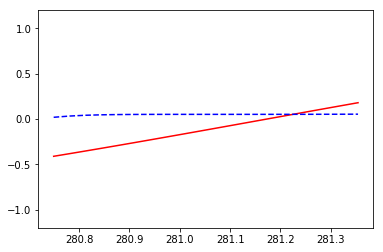

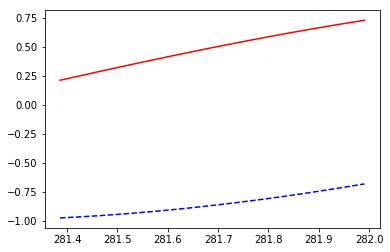

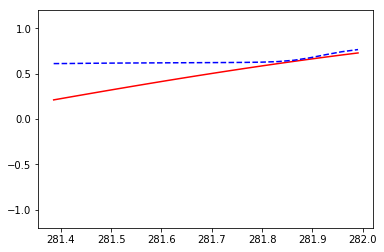

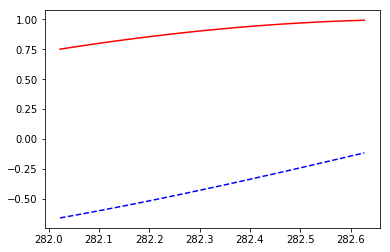

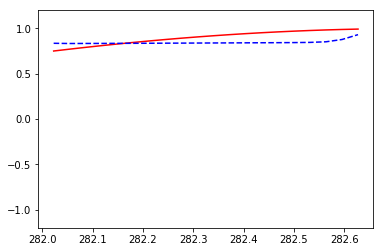

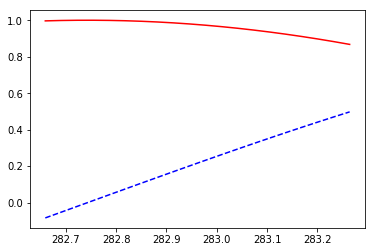

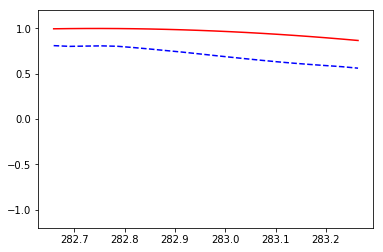

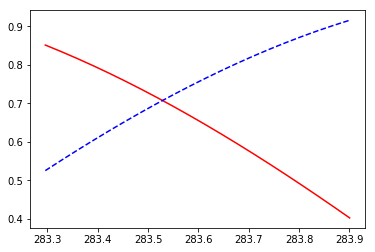

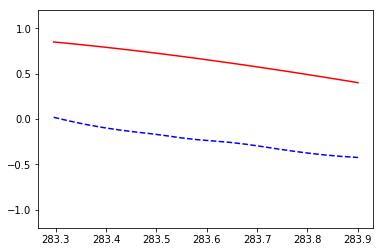

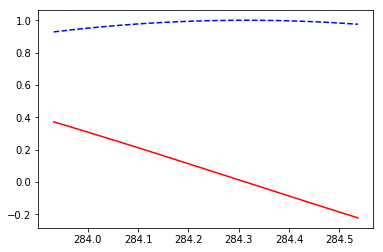

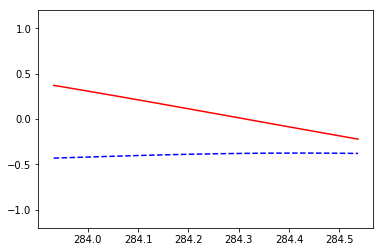

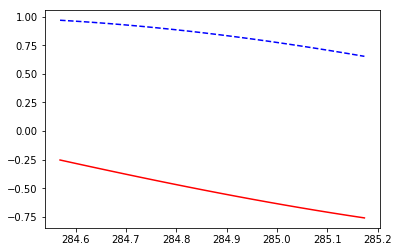

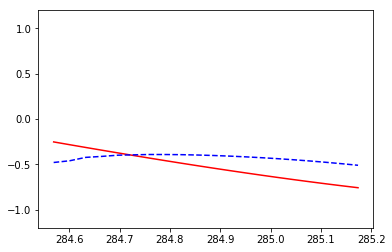

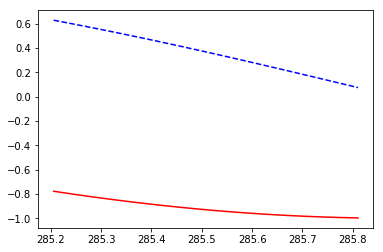

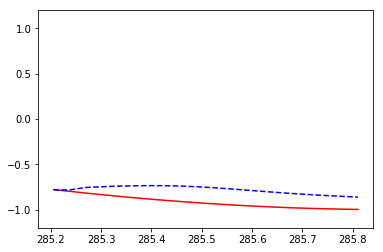

train cost:  0.07141793


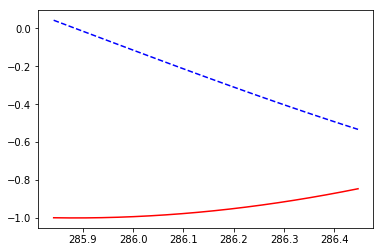

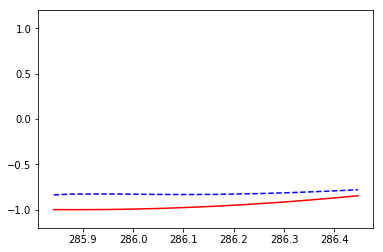

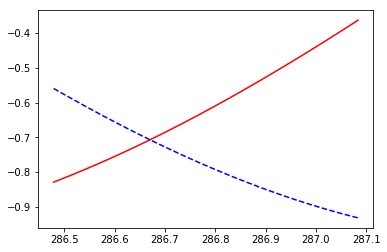

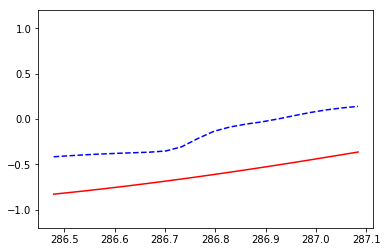

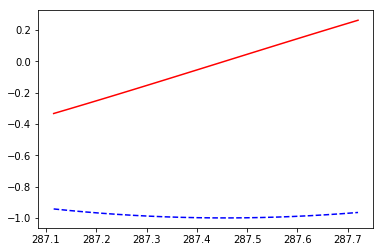

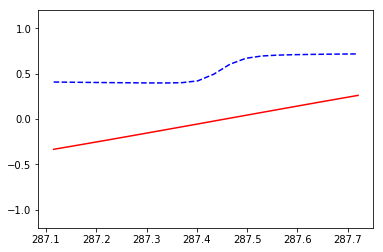

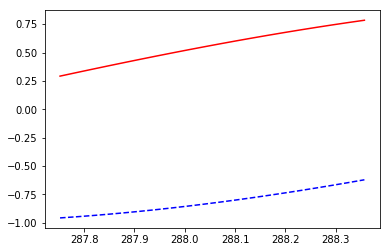

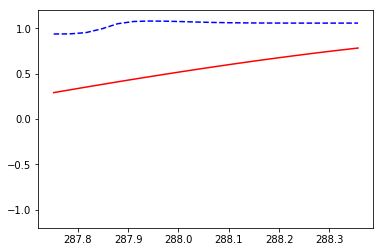

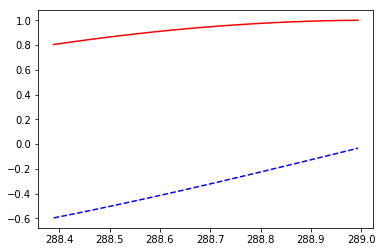

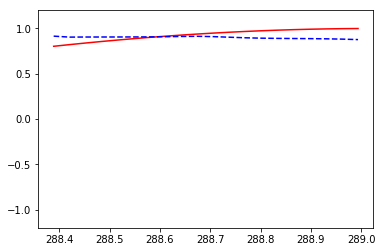

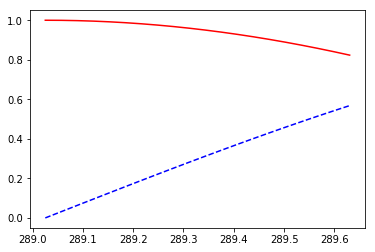

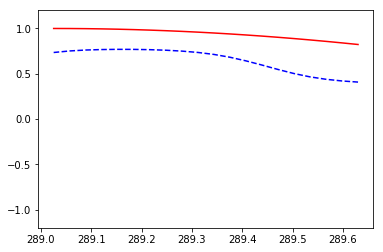

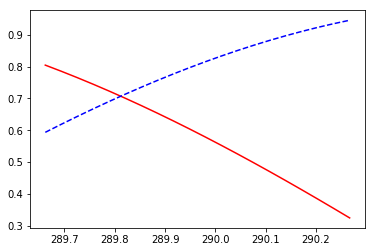

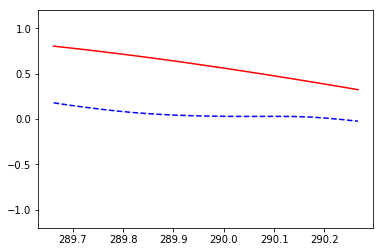

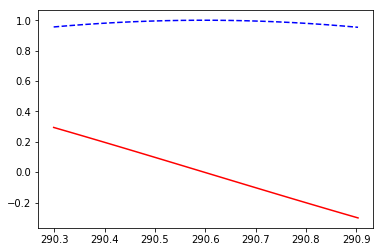

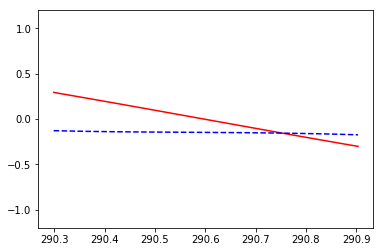

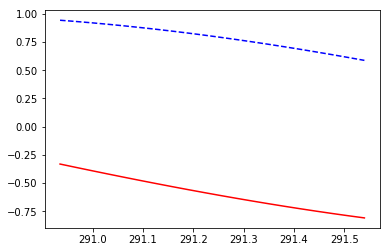

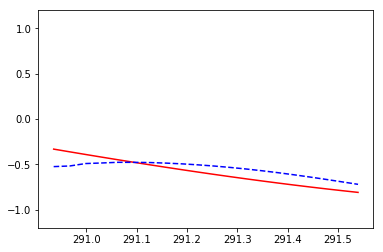

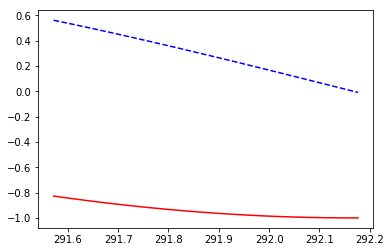

In [0]:
print('Training ------------')
for step in range(501):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch, Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch, Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.plot(xs[0, :], Y_batch[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
    plt.ylim((-1.2, 1.2))
    plt.draw()
    plt.pause(0.1)
    if step % 10 == 0:
        print('train cost: ', cost)
  